# Assignment RL 
Structure:
1. [Environment explaination](#Environment-Explaination)
***
2. [Agent Choice](#Agent-Choice)
***
3. [Dependencies](#Dependencies)
***
4. [Implementations](#Implementations)
   <div class="alert alert-block alert-danger">
       
    1. <b>[Deep-Q-Network](#Deep-Q-Network)</b>
        1. <b>[Deep-Q-Network](#Deep-Q-Network-Implementation)</b>
            1. <b>[RAM Observations](#Deep-Q-Network-RAM-Observations)</b>
            2. <b>[Image Observations](#Deep-Q-Network-Image-Observations)</b>
            3. <b>[Hyper parameter sweep(RAM)](#Hyperparameter-Sweep-Deep-Q-Network-(RAM))</b>
        2. <b>[Dueling Double DQN Impementation](#Dueling-Double-DQN-Impementation)</b>
            1. <b>[RAM Observations](#Dueling-Double-DQN-RAM-Observations)</b>
            2. <b>[Image Observations](#Dueling-Double-DQN-Image-Observations)</b>
            3. <b>[Hyper parameter sweep(RAM)](#Hyperparameter-Sweep-Dueling-Double-DQN-(RAM))</b>
   </div>
   
   <div class="alert alert-block alert-warning">
        
    2. <b>[Soft-Actor-Critic-(SAC).](#Soft-Actor-Critic-(SAC))</b>
        1. <b>[Actor-Critic Impementation](#Actor-Critic-Impementation)</b>
            1. <b>[Image Observations](#Actor-Critic-Image-Observations)</b>
        2. <b>[Soft Actor-Critic (SAC) Impementation](#Soft-Actor-Critic-(SAC)-Impementation)</b>
            1. <b>[RAM Observations](#Soft-Actor-Critic-(SAC)-RAM-Observations)</b>
            2. <b>[Image Observations](#Soft-Actor-Critic-(SAC)-Image-Observations)</b>
            3. <b>[Hyper parameter sweep(RAM)](#Hyperparameter-Sweep-Soft-Actor-Critic-(SAC)(RAM))</b>
    </div>
    
    <div class="alert alert-block alert-success">
        
    3. <b>[Proximal Policy Optimization (PPO)](#Proximal-Policy-Optimization-(PPO))</b>
        1. <b>[Proximal Policy Optimization (PPO) Impementation](#Proximal-Policy-Optimization-(PPO)-Impementation)</b>
           1. <b>[RAM Observations](#Proximal-Policy-Optimization-(PPO)-RAM-Observations)</b>
           2. <b>[Image Observations](#Proximal-Policy-Optimization-(PPO)-Image-Observations)</b>
           3. <b>[Hyper parameter sweep(RAM)](#Hyperparameter-Sweep-PPO-(RAM))</b>
    </div>


# Environment Explaination

- Overview <br>
In the Boxing environment, the agent's task is to engage in a boxing match in a ring, where it must land punches on the opponent to score points. A knockout occurs when the agent scores 100 points, ending the match in victory. The environment provides a relatively simple yet challenging reinforcement learning problem, where strategic planning and control must be executed to maximize the score.


| Attribute           | Value                                             |
|---------------------|---------------------------------------------------|
| Action Space        | Discrete(18) - 18 possible actions                |
| Observation Space   | Box(0, 255, (210, 160, 3), uint8)                 |
| RGB Shape           | (210, 160, 3)                                     |
| Grayscale Shape     | (210, 160)                                        |
| RAM Shape           | (128,)                                            |
| Reward              | Points for landing punches (100 points = Knockout)|
| Frameskip           | (2, 5) or 4 (depending on variant)                |
| Repeat Action Probability | 0.25 (default) or 0.0 (some variants)       |
| Difficulty          | [0, 1, 2, 3] (default: 0)                         |
| Mode                | [0] (default: 0)                                  |
 strategies, and gene




- Action Space<br>
The environment offers an action space of Discrete(18), meaning there are 18 possible actions that the agent can take. These actions cover various directions (e.g., moving up, down, left, or right) and combinations of actions with punching (e.g., UPFIRE, LEFTFIRE). The table below explains. Each action corresponds to a movement or punch combination, providing the agent with diverse strategies to interact with the environment.<br>
<br>

| Value | Meaning         | Description                                                |
|-------|-----------------|------------------------------------------------------------|
| 0     | NOOP            | No operation, do nothing                                   |
| 1     | FIRE            | Press the fire button without updating the joystick position|
| 2     | UP              | Apply a Δ-movement upwards on the joystick                  |
| 3     | RIGHT           | Apply a Δ-movement rightward on the joystick                |
| 4     | LEFT            | Apply a Δ-movement leftward on the joystick                 |
| 5     | DOWN            | Apply a Δ-movement downward on the joystick                |
| 6     | UPRIGHT         | Execute UP and RIGHT                                       |
| 7     | UPLEFT          | Execute UP and LEFT                                        |
| 8     | DOWNRIGHT       | Execute DOWN and RIGHT                                     |
| 9     | DOWNLEFT        | Execute DOWN and LEFT                                      |
| 10    | UPFIRE          | Execute UP and FIRE                                        |
| 11    | RIGHTFIRE       | Execute RIGHT and FIRE                                     |
| 12    | LEFTFIRE        | Execute LEFT and FIRE                                      |
| 13    | DOWNFIRE        | Execute DOWN and FIRE                                      |
| 14    | UPRIGHTFIRE     | Execute UP and RIGHT and FIRE                              |
| 15    | UPLEFTFIRE      | Execute UP and LEFT and FIRE                               |
| 16    | DOWNRIGHTFIRE   | Execute DOWN and RIGHT and FIRE                            |
| 17    | DOWNLEFTFIRE    | Execute DOWN and LEFT and FIRE            
          


- Observation Space
  <br>The observation space for the Boxing environment varies based on the configuration chosen (e.g., RGB, grayscale or RAM-based observations):
        
  - RGB observations:
    <br>A color image of the boxing ring is provided with a dimension of 210 (height) x 160 (width) and 3 color channels, which is typical for Atari games. This provides rich visual information that the agent must interpret to learn meaningful behavior. <br>
              ```obs_type="rgb" -> observation_space=Box(0, 255, (210, 160, 3), np.uint8)```
  
  - Grayscale Obsercations:
    <br>A grayscal image of the boxing ring is provided of dimenasion 210 height, 160 width and 1 channel rather than 3. This was used for all image experimaents as it provideds the required information withoughout the greater over head of 3 colour channels. <br>
              ```obs_type="grayscale" -> Box(0, 255, (210, 160), np.uint8)```
  - RAM observations:
    <br>An alternative hich contrary to the other spaces that reliy on the game screen for data, the ram observation space uses the console's memory. Atari 2600 has 1024 bits of random access memory that stores the internal state of the gane, including posisitons of game entities, timers and health conditions or score for boxing.  This RAM observation space os Marlovian capturing the full state at any given time without the need for prior context. We us the npint8 adition as well and thus 1024 bits becomes 128 ints (1024/8). There is also some other processing such as applying linear function approximations to capture the values of the the multibit groups. Aswell as adding the logical-AND of every possible bit pair to the feature vector (Bellemare et al., 2013). Allowing the function to capture combinations of values, as the profuct of two multibit groupings can be represented as the sum of their bitwise product   (Bellemare et al., 2013). <br>
         ```obs_type="ram" -> observation_space=Box(0, 255, (128,), np.uint8)```



- Rewards <br>
The reward system in the Boxing environment is simple the agent receives points for each punch that successfully hits the opponent. A reward of 100 points triggers a knockout, and scoring higher overall leads to better performance. This aligns with the goal of maximizing cumulative rewards in reinforcement learning. If the Agent has scored a positive reward at the end of the run the agent has won.


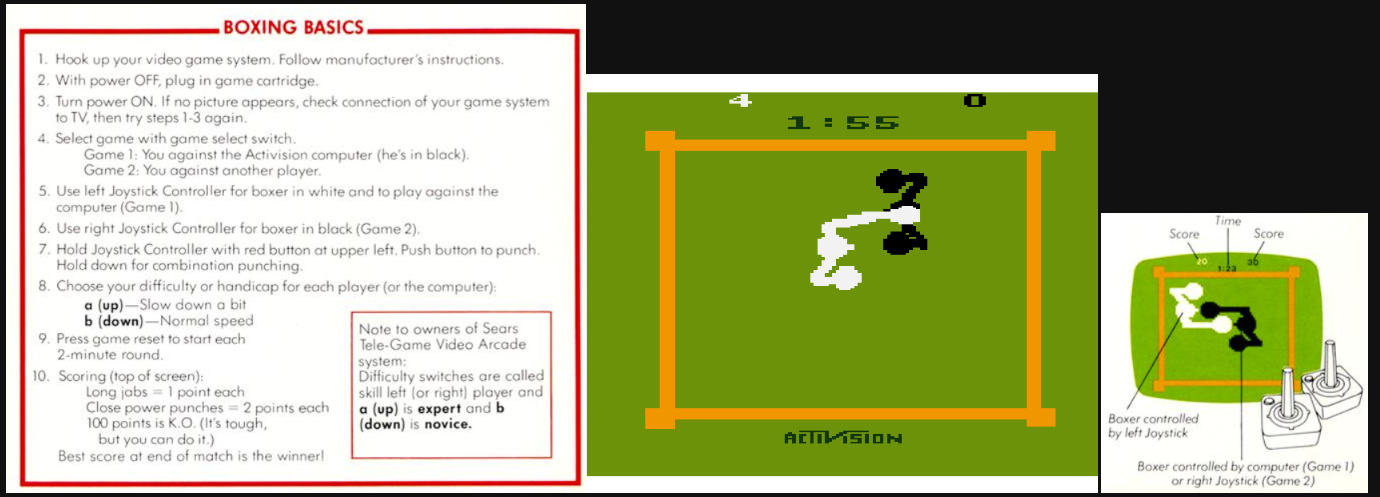![image info](RLassignment.png)

<cite id="gqmj4"><a href="#zotero%7C18759246%2FFUI8Z6RK">(Machado et al., 2018)</a></cite>
<cite id="zc629"><a href="#zotero%7C18759246%2FKRBTYLUS">(Bellemare et al., 2013)</a></cite>

- Environment Variants <br>
    Several variants of the Boxing environment exist, offering differences in terms of observation type, frame-skipping, and repeataction probability: <br>
    - Boxing-v0: Uses "RGB" observations with frame-skipping values between 2 and 5 and a 0.25 action repeat probability.
    - Boxing-ram-v0: Uses RAM observations under the same conditions as Boxing-v0.
    - BoxingDeterministic-v0: A deterministic version using RGB observations with no randomness in frame-skipping and action selection.
    - BoxingNoFrameskip-v0: A variant where no frame-skipping is applied, making each action selection critical for performance.
 <br>
 
***

 <br>

- Difficulty and Modes <br>
    Boxing includes adjustable difficulty settings and game modes to customize the agent's experience. The default difficulty is 0, and possible values for difficulty range from 0 to 3. Adjusting difficulty impacts the responsiveness and behavior of the opponent, making the environment more or less challenging depending on the choice.<br>
    
 <br>
 
***

 <br>

- Research and Reinforcement Learning <br>
        As explored in the Arcade Learning Environment by Bellemare et al., Boxing is one of the many Atari games used to benchmark AI agents, particularly those employing reinforcement learning techniques like SARSA(λ), Q-learning, or deep reinforcement learning models. The simplicity of the environment, combined with its discrete action space and challenging dynamics, makes it an excellent testbed for evaluating the general competency of agents. Researchers often use Boxing to analyze how well agents can learn to exploit the opponent's weaknesses and optimize long-term reward accumulation​(Bellemare et al., 2013).

In conclusion, the Boxing environment presents a straightforward, yet non-trivial task for RL agents, with its rich action space and varying observation types. It offers a useful benchmark for researeneral game-playing AI.on reinforcement learning, action selection strategies, and gene

# Agent Choice

SAC

In [ ]:
PPO

In [ ]:
DQN

# Dependencies

In [ ]:
!pip install pyvirtualdisplay
!pip install opencv-python imageio[ffmpeg]
!pip install wandb
!pip install docutils==0.17.1
!pip install jupyterlab-citation-manager
!wandb login
display = Display(visible=0, size=(1024, 768))
display.start()
import io
from IPython.display import display, Latex

In [2]:
# import necessary libraries
import os
os.environ['XDG_RUNTIME_DIR'] = '/tmp/runtime-tristan'
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
from collections import deque
import moviepy.editor as mpy
import ast
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import deque
import moviepy.editor as mpy
import torch.optim as optim
import wandb
import random
import ast
import math
import imageio
import cv2
import math
from gymnasium.wrappers import ResizeObservation
from gymnasium.wrappers import NormalizeObservation
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
from collections import deque
import moviepy.editor as mpy
import torch.optim as optim
import wandb
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import deque
import moviepy.editor as mpy
import torch.optim as optim
import wandb
import random
import ast  # For safely evaluating tuple strings

# create random number generator
rng = np.random.default_rng()


In [ ]:
Functions

In [55]:
class VideoRecorderRAM:
    def __init__(self, dir_name, fps=30):
        self.dir_name = dir_name
        self.fps = fps
        self.frames = []

    def reset(self):
        self.frames = []

    def record(self, frame):
        self.frames.append(frame)

    def save(self, file_name):
        path = os.path.join(self.dir_name, file_name)
        imageio.mimsave(path, self.frames, fps=self.fps, macro_block_size = None)

#v= VideoRecorderRAM('DQN')
#v.frames=frames
#v.save("prac_DQN.mp4")

In [ ]:
class VideoRecorder:
    def __init__(self, dir_name, fps=30):
        self.dir_name = dir_name
        self.fps = fps
        self.frames = []

    def reset(self):
        self.frames = []

    def record(self, frame):
        self.frames.append(frame)

    def save(self, file_name):
        path = os.path.join(self.dir_name, file_name)
        frames_np = [np.array(frame) for frame in self.frames]
        imageio.mimsave(path, frames_np, fps=self.fps, macro_block_size = None)


In [3]:
rng = np.random.default_rng()

# Implementations

## Deep-Q-Network

### Deep-Q-Network Implementation

#### Practical DQN

Setup weights and bias to compare the original implementation seen in the practical and other implementations.

QNetwork

In [11]:
class PracQNetwork(nn.Module): #changed name to PracQNetwork for logging 
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        super().__init__()
        # create network layers
        layers = nn.ModuleList()

        # input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # hidden layers
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())

        # output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # combine layers into feed-forward network
        self.net = nn.Sequential(*layers)

        # select loss function and optimizer
        # note: original paper uses modified MSE loss and RMSprop
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)

    def forward(self, x):
        # return output of Q-network for the input x
        return self.net(x)

    def update(self, inputs, targets):
        # update network weights for a minibatch of inputs and targets:
        self.optimizer.zero_grad()
        outputs = self.net(inputs)
        loss = self.criterion(outputs, targets)
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def copy_from(self, qnetwork):
        # copy weights from another Q-network
        self.net.load_state_dict(qnetwork.net.state_dict())

In [52]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
print(len(env.observation_space.high))
print(env.observation_space.low)

gamma = 0.99
hidden_sizes = (128, 128)
learning_rate = 0.001
epsilon = 0.2
replay_size = 10000
minibatch_size = 64
target_update = 20
max_episodes = 100
max_steps = 1000
criterion_episodes = 5

#settings=wandb.Settings(start_method="fork")

wandb.init(project='DQN-Original-comparison-Final', config={
    'gamma': gamma,
    'learning_rate': learning_rate,
    'epsilon': epsilon,
    'replay_size': replay_size,
    'minibatch_size': minibatch_size,
    'target_update_freq': target_update,
    'num_episodes': max_episodes,
    'max_steps_per_episode': max_steps,
    'criterion_episodes':criterion_episodes
})

'''DD=wandb.init(project='DQN-Original-comparison-Final', config={
    'gamma': gamma,
    'learning_rate': learning_rate,
    'epsilon': epsilon,
    'replay_size': replay_size,
    'minibatch_size': minibatch_size,
    'target_update_freq': target_update,
    'num_episodes': max_episodes,
    'max_steps_per_episode': max_steps,
    'criterion_episodes':criterion_episodes
})'''


128
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


episode,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
episode_num,▁▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
episode_reward,▅█▃▇▇▇▇▁▇▃▆▂▇▇▇▃█▂▅▅▇█▇▅▂▅▅▇▅▇▃▇▂█▇▆▇▇▆▇
epsilon,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
local reward,████████████████▁▁██████████████████████
loss,▄█▅▃▅▅▅▆▇▄▄▂▄▃▄▂▂▆▅▂▄▄▃▄▆▅▅▃▁▅▂▂▁▃▁▇▃▅▂▂
steps,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇█
total steps,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
episode,57
episode_num,58
episode_reward,-4


"DD=wandb.init(project='DQN-Original-comparison-Final', config={\n    'gamma': gamma,\n    'learning_rate': learning_rate,\n    'epsilon': epsilon,\n    'replay_size': replay_size,\n    'minibatch_size': minibatch_size,\n    'target_update_freq': target_update,\n    'num_episodes': max_episodes,\n    'max_steps_per_episode': max_steps,\n    'criterion_episodes':criterion_episodes\n})"

AgentClass

In [54]:
%%wandb #displays wand b plotting
class AgentDQN():
    def __init__(self, env, gamma,
                 hidden_sizes=(32, 32),
                 learning_rate=0.001,
                 epsilon=0.1,
                 replay_size=10000,
                 minibatch_size=32,
                 target_update=20
                 ):
        # check if the state space has correct type
        continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]

        # check if the action space has correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n

        # create Q-networks for action-value function
        self.qnet = PracQNetwork(self.state_dims, hidden_sizes, self.num_actions, learning_rate)
        self.target_qnet = PracQNetwork(self.state_dims, hidden_sizes, self.num_actions, learning_rate)

        # copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)

        # initialise replay buffer
        self.replay_buffer = deque(maxlen=replay_size)

        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.minibatch_size = minibatch_size
        self.target_update = target_update
        self.target_update_idx = 0

    def behaviour(self, state):
        # exploratory behaviour policy
        if rng.uniform() >= self.epsilon:
            # convert state to torch format
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float)

            # exploitation with probability 1-epsilon; break ties randomly
            q = self.qnet(state).detach()
            j = rng.permutation(self.num_actions)
            return j[q[j].argmax().item()]
        else:
            # exploration with probability epsilon
            return self.env.action_space.sample()

    def policy(self, state):
        # convert state to torch format
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float)

        # greedy policy
        q = self.qnet(state).detach()
        return q.argmax().item()

    def update(self):
        # update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # select mini-batch of experiences uniformly at random without replacement                                
            batch = rng.choice(len(self.replay_buffer), size=self.minibatch_size, replace=False)

            # calculate inputs and targets for the transitions in the mini-batch
            inputs = torch.zeros((self.minibatch_size, self.state_dims))
            targets = torch.zeros((self.minibatch_size, self.num_actions))

            for n, index in enumerate(batch):
                state, action, reward, next_state, terminated = self.replay_buffer[index]
                # inputs are states
                inputs[n, :] = state

                # targets are TD targets
                targets[n, :] = self.target_qnet(state).detach()

                if terminated:
                    targets[n, action] = reward
                else:
                    targets[n, action] = reward + self.gamma*self.target_qnet(next_state).detach().max()
            
            # train Q-network on the mini-batch
            logging_loss=self.qnet.update(inputs, targets)
            #print(logging_loss)
            return logging_loss
        # periodically copy weights from Q-network to target Q-network
        self.target_update_idx += 1
        if self.target_update_idx % self.target_update == 0:
            self.target_qnet.copy_from(self.qnet)
        return None
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # train the agent for a number of episodes
        rewards = []
        num_steps = 0
        
        for episode in range(max_episodes):
            steps=0
            state, _ = env.reset()
            # convert state to torch format
            state = torch.tensor(state, dtype=torch.float)
            terminated = False
            truncated = False
            rewards.append(0)
            while not (terminated or truncated):
                # select action by following behaviour policy
                action = self.behaviour(state)

                # send the action to the environment
                next_state, reward, terminated, truncated, _ = env.step(action)

                # convert next state to torch format and add experience to replay buffer
                next_state = torch.tensor(next_state, dtype=torch.float)
                self.replay_buffer.append((state, action, reward, next_state, terminated))

                # update Q-network
                logging_loss=self.update() #and log loss
                if logging_loss is not None:
                    wandb.log({
                    'episode_num': episode,
                    'loss':logging_loss,
                    'steps': steps,
                    'local reward':reward,

                })

                state = next_state
                rewards[-1] += reward
                num_steps += 1
                steps += 1
                

            print(f'\rEpisode {episode+1} done: steps = {num_steps}, rewards = {rewards[episode]}     ', end='')
            # Log metrics to W&B
            wandb.log({
                    'episode': episode,
                    'total steps':num_steps,
                    'episode_reward': rewards[episode],
                    'epsilon': self.epsilon,
                })

            if episode >= criterion_episodes-1 and stop_criterion(rewards[-criterion_episodes:]):
                print(f'\nStopping criterion satisfied after {episode} episodes')
                break

        
        # plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(rewards)+1), rewards, label=f'Rewards')

        plt.xlabel('Episodes')
        plt.ylabel('Rewards per episode')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    # changed evaluationto a function just to help break it up, also added logging and changed video script as mpy doesnt work for me for some reason
    def evaluate(self, Run):
        state, _ = self.env.reset()
        state = state.flatten()
        terminated = False
        truncated = False
        total_reward = 0
        steps=0
        frames = []

        while not (terminated or truncated): #removed max steps, boxing is timed so it will end after 2 minutes of the game we want to see how the agent goes over the full game

            action = self.policy(state)
            state, reward, terminated, truncated, _ = self.env.step(action)
            total_reward += reward
            steps +=1 
        frame = self.env.render() # Render environment frame and store for video
        v= VideoRecorderRAM('DQN')
        v.frames=frame
        vfilename = f'DQN_Prac_RAM_run_{Run}.mp4'
        v.save(vfilename)
        video_path="DQN/" + vfilename
        # Save video of the evaluation episode
        #video = np.stack(frames)
        #video_path = f"evaluation_episode_{episode_num}.mp4"
        #mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
        #mpy_clip.write_videofile(video_path, codec="libx264")

        # Log evaluation results and video to W&B
        wandb.log({
            'Evaluation Run': Run,
            'Evaluation Reward': total_reward,
            'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
        })

        # Logging evaluation result
        print(f"Evaluation run: {Run} Total Reward = {total_reward}")
        env.close()

    def save(self, path):
        # save network weights to a file
        torch.save(self.qnet.state_dict(), path)

    def load(self, path):
        # load network weights from a file
        self.qnet.load_state_dict(torch.load(path))
        self.target_qnet.copy_from(self.qnet)


agent = AgentDQN(env,gamma=gamma, hidden_sizes=hidden_sizes,learning_rate=learning_rate,epsilon=epsilon,replay_size=replay_size,minibatch_size=minibatch_size,)

#agent.load('acrobot.128x128.DQN.pt')
agent.train(max_episodes, lambda x : min(x) >= 100, criterion_episodes)
for x in range(5):
    agent.evaluate(Run=x)
wandb.finish()

Episode 99 done: steps = 176814, rewards = -21.0     

  plt.show()



Episode 100 done: steps = 178600, rewards = -26.0     

NameError: name 'VideoRecorderRAM' is not defined

In [56]:
for x in range(5):
    agent.evaluate(Run=x)
wandb.finish()

Evaluation run: 0 Total Reward = -49.0
Evaluation run: 1 Total Reward = -54.0
Evaluation run: 2 Total Reward = -54.0
Evaluation run: 3 Total Reward = -54.0
Evaluation run: 4 Total Reward = -47.0


Evaluation Reward,▆▁▁▁█
Evaluation Run,▁▃▅▆█
episode,▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
episode_num,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██
episode_reward,▅▂▆▂▅▆▃▄▄▅▅█▄▅▆█▇█▂▂▁▄▆▅▃▆▃▄▅▇▇█▄▃▅▄▇▇▅▄
epsilon,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
local reward,▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅█▁▅▅▅▅▅▅▅▅▅▅▅▅
loss,▆▅▃▅▃▁▅▂▅▅▃▁▇▂▃▄▂▄▄▃▃▁▄▄▄▁▇▁▃▆▆▇▅▄▂▁▃▅▃█
steps,▂▇▃▃▂▇▂▂▄▅▁▃▆▂██▂▆▃▃▄▃▄▂▆▅▁▃▁▃▅▄▄▆▁▇▅█▄▂
total steps,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
Evaluation Reward,-47


In [57]:
wandb.finish

<function wandb.sdk.wandb_run.finish(exit_code: Optional[int] = None, quiet: Optional[bool] = None) -> None>

Make environment and set up logging

In [14]:
agent.save('Boxing.DQN.prac.agent1.pt')

In [6]:
import numpy as np
from collections import namedtuple, deque
import random
import imageio
import os
#%%writefile SAC_spedup_and_vectorised.py
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque
import moviepy.editor as mpy
from torch.cuda.amp import autocast, GradScaler
import wandb

In [7]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

#### Deep-Q-Network RAM Observations

The original implementation didn seen to be improving throughout the training run. After a lot of testing it believ it was due to the loss function logging resulting in gradients not being updated correctly. Thus the loss logging was removed for V2. The hidden size was also increased and the learning rate was reduced. 2

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # training on GPU
print(f"Using device: {device}")

class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        super().__init__()
        # create network layers
        layers = nn.ModuleList()

        # input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # hidden layers
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())

        # output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # combine layers into feed-forward network
        self.net = nn.Sequential(*layers)

        # select loss function and optimizer
        # note: original paper uses modified MSE loss and RMSprop
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)

    def forward(self, x):
        # return output of Q-network for the input x
        return self.net(x)

    def update(self, inputs, targets):
        # update network weights for a minibatch of inputs and targets:
        self.optimizer.zero_grad()
        outputs = self.net(inputs)
        loss = self.criterion(outputs, targets)
        loss.backward()
        self.optimizer.step()
        #return loss Removed returning the loss function for logging 

    def copy_from(self, qnetwork):
        # copy weights from another Q-network
        self.net.load_state_dict(qnetwork.net.state_dict())

Using device: cuda


In [64]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
print(len(env.observation_space.high))
print(env.observation_space.low)

gamma = 0.99
hidden_sizes = (128, 128, 128)
learning_rate = 0.0001
epsilon = 0.2
replay_size = 10000
minibatch_size = 64
target_update = 20
max_episodes = 100
max_steps = 1000
criterion_episodes = 5

wandb.init(project='DQN-Original-comparison-Final', name='DQN_V2_2', config={
    'gamma': gamma,
    'learning_rate': learning_rate,
    'epsilon': epsilon,
    'replay_size': replay_size,
    'minibatch_size': minibatch_size,
    'target_update_freq': target_update,
    'num_episodes': max_episodes,
    'max_steps_per_episode': max_steps,
    'criterion_episodes':criterion_episodes
})



128
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [65]:
%%wandb
###########################################################################################################################################################################################################
class V2AgentDQN():
    def __init__(self, env, gamma,
                 hidden_sizes=(128, 128,128), #Increased Depth and size
                 learning_rate=0.0001, #decrease learning rate
                 epsilon=0.2, #increased epsilon
                 replay_size=10000,
                 minibatch_size=64, #increase batch size
                 target_update=20):
        # check if the state space has correct type
        continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]

        # check if the action space has correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n

        # create Q-networks for action-value function
        self.qnet = QNetwork(self.state_dims, hidden_sizes, self.num_actions, learning_rate)
        self.target_qnet = QNetwork(self.state_dims, hidden_sizes, self.num_actions, learning_rate)

        # copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)

        # initialise replay buffer
        self.replay_buffer = deque(maxlen=replay_size)

        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.minibatch_size = minibatch_size
        self.target_update = target_update
        self.target_update_idx = 0
###########################################################################################################################################################################################################
    def behaviour(self, state):
        # exploratory behaviour policy
        if rng.uniform() >= self.epsilon:
            # convert state to torch format
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float)

            # exploitation with probability 1-epsilon; break ties randomly
            q = self.qnet(state).detach()
            j = rng.permutation(self.num_actions)
            return j[q[j].argmax().item()]
        else:
            # exploration with probability epsilon
            return self.env.action_space.sample()
###########################################################################################################################################################################################################
    def policy(self, state):
        # convert state to torch format
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float)

        # greedy policy
        q = self.qnet(state).detach()
        return q.argmax().item()
###########################################################################################################################################################################################################
    def update(self):
        # update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # select mini-batch of experiences uniformly at random without replacement                                
            batch = rng.choice(len(self.replay_buffer), size=self.minibatch_size, replace=False)

            # calculate inputs and targets for the transitions in the mini-batch
            inputs = torch.zeros((self.minibatch_size, self.state_dims))
            targets = torch.zeros((self.minibatch_size, self.num_actions))

            for n, index in enumerate(batch):
                state, action, reward, next_state, terminated = self.replay_buffer[index]
                # inputs are states
                inputs[n, :] = state

                # targets are TD targets
                targets[n, :] = self.target_qnet(state).detach()

                if terminated:
                    targets[n, action] = reward
                else:
                    targets[n, action] = reward + self.gamma*self.target_qnet(next_state).detach().max()
            
                        # train Q-network on the mini-batch
            self.qnet.update(inputs, targets)
            #logging_loss=
            #print(logging_loss)
            #return logging_loss

        # periodically copy weights from Q-network to target Q-network
        self.target_update_idx += 1
        if self.target_update_idx % self.target_update == 0:
            self.target_qnet.copy_from(self.qnet)
        #return None
###########################################################################################################################################################################################################    
    def train(self, max_episodes, stop_criterion, criterion_episodes):
                # train the agent for a number of episodes
        rewards = []
        num_steps = 0
        
        for episode in range(max_episodes):
            steps=0
            state, _ = env.reset()
            # convert state to torch format
            state = torch.tensor(state, dtype=torch.float)
            terminated = False
            truncated = False
            rewards.append(0)
            while not (terminated or truncated):
                # select action by following behaviour policy
                action = self.behaviour(state)

                # send the action to the environment
                next_state, reward, terminated, truncated, _ = env.step(action)

                # convert next state to torch format and add experience to replay buffer
                next_state = torch.tensor(next_state, dtype=torch.float)
                self.replay_buffer.append((state, action, reward, next_state, terminated))
                self.update() 
                # update Q-network
                #logging_loss=#and log loss
                '''if logging_loss is not None:
                    wandb.log({
                    'episode_num': episode,
                    'loss':logging_loss,
                    'steps': steps,
                    'local reward':reward,
                })'''
                state = next_state
                rewards[-1] += reward
                num_steps += 1
                steps += 1

            print(f'\rEpisode {episode+1} done: steps = {num_steps}, rewards = {rewards[episode]}     ', end='')
            # Log metrics to W&B
            wandb.log({
                    'episode': episode,
                    'total steps':num_steps,
                    'episode_reward': rewards[episode],
                    'epsilon': self.epsilon,
                })

            if episode >= criterion_episodes-1 and stop_criterion(rewards[-criterion_episodes:]):
                print(f'\nStopping criterion satisfied after {episode} episodes')
                break
###############################################################################################################################################################################################################
     # changed evaluationto a function just to help break it up, also added logging and changed video script as mpy doesnt work for me for some reason
    def evaluate(self, Run):
        state, _ = self.env.reset()
        state = state.flatten()
        terminated = False
        truncated = False
        total_reward = 0
        steps=0
        frames = []

        while not (terminated or truncated): #removed max steps, boxing is timed so it will end after 2 minutes of the game we want to see how the agent goes over the full game

            action = self.policy(state)
            state, reward, terminated, truncated, _ = self.env.step(action)
            total_reward += reward
            steps +=1 
        frame = self.env.render() # Render environment frame and store for video
        v= VideoRecorderRAM('DQN')
        v.frames=frame
        vfilename = f'DQN_Prac_RAMV2_run_{Run}.mp4'
        v.save(vfilename)
        video_path="DQN/" + vfilename
        # Save video of the evaluation episode
        #video = np.stack(frames)
        #video_path = f"evaluation_episode_{episode_num}.mp4"
        #mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
        #mpy_clip.write_videofile(video_path, codec="libx264")

        # Log evaluation results and video to W&B
        wandb.log({
            'Evaluation Run': Run,
            'Evaluation Reward': total_reward,
            'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
        })

        # Logging evaluation result
        print(f"Evaluation run: {Run} Total Reward = {total_reward}")
        env.close()
###########################################################################################################################################################################################################
    def save(self, path):
        # save network weights to a file
        torch.save(self.qnet.state_dict(), path)
###########################################################################################################################################################################################################
    def load(self, path):
        # load network weights from a file
        self.qnet.load_state_dict(torch.load(path))
        self.target_qnet.copy_from(self.qnet)
###########################################################################################################################################################################################################




#Initialize, train and evaluate


agent = V2AgentDQN(env,
                 gamma=gamma,
                 hidden_sizes=hidden_sizes,
                 learning_rate=learning_rate,
                 epsilon=epsilon,
                 replay_size=replay_size,
                 minibatch_size=minibatch_size,
                 target_update=target_update)



#agent.load('acrobot.128x128.DQN.pt')

agent.train(max_episodes, lambda x : min(x) >= 100, criterion_episodes)
for x in range(5):
    agent.evaluate(Run=x)
wandb.finish()
# create and play video clip using the frames and given fps
#clip = mpy.ImageSequenceClip(frames, fps=15)
#clip.ipython_display(rd_kwargs=dict(logger=None))

Episode 100 done: steps = 178600, rewards = -21.0     Evaluation run: 0 Total Reward = 2.0
Evaluation run: 1 Total Reward = 14.0
Evaluation run: 2 Total Reward = 3.0
Evaluation run: 3 Total Reward = 2.0
Evaluation run: 4 Total Reward = 4.0


Evaluation Reward,▁█▂▁▂
Evaluation Run,▁▃▅▆█
episode,▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇█████
episode_reward,▁▃▅▅▃▇▅▄▅▇▆▃▅▃▅▁▅▅▄▄▄▃▄▅▅▃▄▄▅▅▅▄▅▅▄▆▄▅▅█
epsilon,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total steps,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█
Evaluation Reward,4
Evaluation Run,4
episode,99
episode_reward,-21
epsilon,0.2


In [30]:
agent.save('Boxing.DQN.prac.agent2.pt')

Successful runs in evaluation !! When comparing DQN_V2 and DQN_V2_2 the only difference is the logging of the loss. Thus, it removing it allowed the agent to learn effectively. The comparison can be seen below. 

In [69]:
%wandb tristancarlisle/DQN-Original-comparison-Final/reports/Loss-logging-impact--Vmlldzo5NzQzMjEy

#### Deep-Q-Network Image Observations

First iteration of improvements:
instead of ram implementation going to try grayscale then reduce image size 
add warm up steps
add epsilon decay
change Q Network to utilise images 
Frame stack to try and learn temporal information
Skip frames 
Normalise frame values for 

##### Q Network
- Adapted to images and frame staking, hence the use of 2D convolutions. greyscale is a 2D array stack them and you have a 3D array.
```python
nn.Conv2d
```
- Also added in warm up steps
```python
def warmup(self):
```
- epsilon decay 
```python
epsilon_threshold = self.epsilon_end[0] + (self.epsilon_start[0] - self.epsilon_end[0]) * math.exp(-1. * num_steps / self.epsilon_decay[0])
```

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # training on GPU
print(f"Using device: {device}")


class QNetworkImage(nn.Module):
    def __init__(self, input_size, output_size, learning_rate):
        super().__init__()
        # create network layers
        layers = nn.ModuleList()

        # input layer
        layers.append(nn.Conv2d(4, 32, kernel_size=8, stride=4))
        layers.append(nn.ReLU())

        #Layer2
        layers.append(nn.Conv2d(32, 64, kernel_size=4, stride=2))
        layers.append(nn.ReLU())

        #Layer3
        layers.append(nn.Conv2d(64,64, kernel_size=3, stride=1))
        layers.append(nn.ReLU())

        #flatten for linear layes
        layers.append(nn.Flatten(start_dim=1))
    
        # output layer
        layers.append(nn.Linear(3136, 512)) #input size =64*7*7 =            
        layers.append(nn.ReLU())
        layers.append(nn.Linear(512, output_size))

        # combine layers into feed-forward network
        self.net = nn.Sequential(*layers)

        # select loss function and optimizer
        # note: original paper uses modified MSE loss and RMSprop
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)

    def forward(self, x):
        # return output of Q-network for the input x
        return self.net(x)

    def update(self, inputs, targets):
        # update network weights for a minibatch of inputs and targets:
        self.optimizer.zero_grad()
        outputs = self.net(inputs)
        loss = self.criterion(outputs, targets)
        loss.backward()
        self.optimizer.step()

    def copy_from(self, qnetwork):
        # copy weights from another Q-network
        self.net.load_state_dict(qnetwork.net.state_dict())



Using device: cuda


In [72]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array",obs_type="grayscale") # use grayscale images
env = gym.wrappers.ResizeObservation(env, shape=(84, 84))    # Resize to 84x84 Gym inbuilt wrappers
env = gym.wrappers.NormalizeObservation(env) #Normalize 

gamma = 0.99
learning_rate = 0.0001
max_episodes = 100
max_steps = 1000
criterion_episodes = 5
epsilon_start=1, #added epsilon start point
epsilon_end=0.05, #added epsilon endpoint
epsilon_decay=50000, #added epsilon decay
warmupsteps=1000 #added warmupsteps
replay_size=10000
minibatch_size=32
target_update=20

wandb.init(project='DQN_Image', name='DQN_Image', config={
    'gamma': gamma,
    'learning_rate': learning_rate,
    'epsilon start': epsilon_start,
    'epsilon end': epsilon_end,
    'epsilon decay': epsilon_decay,
    'replay_size': replay_size,
    'minibatch_size': minibatch_size,
    'target_update_freq': target_update,
    'num_episodes': max_episodes,
    'max_steps_per_episode': max_steps,
    'criterion_episodes':criterion_episodes
})


In [ ]:
Agent class set up initialise and run train and evaluation

In [95]:
%%wandb
class AgentDQNImage():
    def __init__(self, env, gamma,
                 #hidden_sizes=(128, 128,128), #Increased Depth and size
                 learning_rate=0.0001, #decrease learning rate
                 epsilon_start=1, #added epsilon start point
                 epsilon_end=0.05, #added epsilon endpoint
                 epsilon_decay=50000, #added epsilon decay
                 warmupsteps=1000, #added warmupsteps
                 replay_size=10000,
                 minibatch_size=32,
                 target_update=20):
        # check if the state space has correct type
        #continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1  removed as using an image now 
        #assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]

        # check if the action space has correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n

        # create Q-networks for action-value function
        self.qnet = QNetworkImage(self.state_dims,self.num_actions, learning_rate).to(device) #moved to GPU
        self.target_qnet = QNetworkImage(self.state_dims,self.num_actions, learning_rate).to(device)#moved to GPU

        # copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)

        # initialise replay buffer
        self.replay_buffer = deque(maxlen=replay_size)

        self.env = env
        self.gamma = gamma
        self.epsilon_start = epsilon_start
        self.epsilon_end= epsilon_end
        self.epsilon_decay = epsilon_decay
        self.minibatch_size = minibatch_size
        self.target_update = target_update
        self.target_update_idx = 0
        self.warmupsteps=warmupsteps
###############################################################################################################################################################################################################
    def behaviour(self, state, num_steps): 
        #set  epsilon threshold to global variable to keep track
        global epsilon_threshold
        # exploratory behaviour policy
        epsilon_threshold = self.epsilon_end[0] + (self.epsilon_start[0] - self.epsilon_end[0]) * math.exp(-1. * num_steps / self.epsilon_decay[0]) #epsilon value calculation for incorporation of decay

        if rng.uniform() >= epsilon_threshold:
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float).to(device)

            # exploitation with probability 1-epsilon; break ties randomly
            q = self.qnet(state).detach()
            action = q.argmax().item() #changed to take the highest q value 
            return torch.tensor([[action]], dtype=torch.long).to(device) #changed for usage on GPU
        else:
            # exploration with probability epsilon
            return torch.tensor([[self.env.action_space.sample()]], dtype=torch.long).to(device) #changed to usage on GPU
###############################################################################################################################################################################################################
    def policy(self, state):
        # convert state to torch format
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float)

        # greedy policy
        q = self.qnet(state).detach()
        return q.argmax().item()
###############################################################################################################################################################################################################
    def update(self):
        # update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # select mini-batch of experiences uniformly at random without replacement                                
            batch = rng.choice(len(self.replay_buffer), size=self.minibatch_size, replace=False)

            # calculate inputs and targets for the transitions in the mini-batch
            inputs = torch.zeros((self.minibatch_size, 4, 84, 84), device=device)
            targets = torch.zeros((self.minibatch_size, self.num_actions), device=device)

            for n, index in enumerate(batch):
                state, action, reward, next_state, terminated = self.replay_buffer[index]
                inputs[n] = state.squeeze(0) # had to change to account for frame stacking removes batch dimension

                # targets are TD targets
                targets[n, :] = self.target_qnet(state).detach()

                if terminated:
                    targets[n, action] = reward
                else:
                    targets[n, action] = reward + self.gamma*self.target_qnet(next_state).detach().max()
            
            # train Q-network on the mini-batch
            self.qnet.update(inputs, targets)

        # periodically copy weights from Q-network to target Q-network
        self.target_update_idx += 1
        if self.target_update_idx % self.target_update == 0:
            self.target_qnet.copy_from(self.qnet)
###############################################################################################################################################################################################################
    def warmup(self):
            print('Warming up')
            warmupstep = 0
            # Warmup loop
            while warmupstep < self.warmupsteps:
                state, _ = self.env.reset()
                state = torch.tensor(state, dtype=torch.float32).to(device)
                state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
                terminated = False
                truncated = False
                while not (terminated or truncated):
                    action = torch.tensor([[self.env.action_space.sample()]]).to(device)# Random action selection during warm-up
                    # Step in environment
                    next_state, reward, terminated, truncated, _ = self.env.step(action.item())
                    next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
                    next_state = torch.stack((next_state,state[0][0],state[0][1],state[0][2])).unsqueeze(0)
                    reward = torch.tensor([reward], device=device)
                    term = torch.tensor([terminated or truncated], device=device)
                    self.replay_buffer.append((state, action, reward, next_state, term))# Store the transition in memory
                    state = next_state
                    warmupstep += 1
                    if warmupstep >= self.warmupsteps:
                        break
    
            print(f'Warm-up finito: {self.warmupsteps} steps stored.')
###############################################################################################################################################################################################################    
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # train the agent for a number of episodes
        rewards = []
        num_steps = 0
        for episode in range(max_episodes):
            state, _ = env.reset()
            # convert state to torch format
            state = torch.tensor(state, dtype=torch.float32).to(device)
            state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
            terminated = False
            truncated = False
            rewards.append(0)
            while not (terminated or truncated):
                # select action by following behaviour policy
                action = self.behaviour(state , num_steps).to(device)

                # send the action to the environment
                next_state, reward, terminated, truncated, _ = env.step(action)

                # convert next state to torch format and add experience to replay buffer
                next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
                next_state = torch.stack((next_state,state[0][0],state[0][1],state[0][2])).unsqueeze(0)
                reward=torch.tensor(reward, dtype=torch.float).to(device)
                term = torch.tensor([terminated or  truncated], device=device)
                self.replay_buffer.append((state, action, reward, next_state, term))
                
                # update Q-network
                self.update()

                state = next_state
                rewards[-1] += reward
                num_steps += 1

                #all to tensors
                
                
            print(f'\rEpisode {episode+1} done: steps = {num_steps}, rewards = {rewards[episode]}     ', end='')

            if episode >= criterion_episodes-1 and stop_criterion(rewards[-criterion_episodes:]):
                print(f'\nStopping criterion satisfied after {episode} episodes')
                break

        # Log metrics to W&B
            wandb.log({
                    'episode': episode,
                    'episode_reward': rewards[episode],
                    'epsilon threshold': epsilon_threshold,
                    'steps': num_steps,
                })

        # plot rewards received during training
        #plt.figure(dpi=100)
        #plt.plot(range(1, len(rewards)+1), rewards, label=f'Rewards')

        #plt.xlabel('Episodes')
        #plt.ylabel('Rewards per episode')
        #plt.legend(loc='lower right')
        #plt.grid()
        #plt.show()
###############################################################################################################################################################################################################
    def evaluate(self, Run):
        state, _ = self.env.reset()
        terminated = False
        truncated = False
        total_reward = 0
        steps=0
        frames=[]
        while not (terminated or truncated or steps > max_steps*2):
            # take action based on policy
            
            state = torch.tensor(state, dtype=torch.float32).to(device)
            state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
            action = agent.policy(state)
        
            # environment receives the action and returns:
            # next observation, reward, terminated, truncated, and additional information (if applicable)
            state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            steps += 1
            frame = env.render()
            frames.append(frame)
        print(f'Reward: {total_reward}')
        v= VideoRecorder('DQN') # None ram version of videorecorder
        for frame in frames:
            v.record(frame)
        vfilename = f'DQN__Image_run_{Run}.mp4'
        v.save(vfilename)
        video_path="DQN/" + vfilename
        # Save video of the evaluation episode
        #video = np.stack(frames)
        #video_path = f"evaluation_episode_{episode_num}.mp4"
        #mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
        #mpy_clip.write_videofile(video_path, codec="libx264")

        # Log evaluation results and video to W&B
        wandb.log({
            'Evaluation Run': Run,
            'Evaluation Reward': total_reward,
            'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
        })

        # Logging evaluation result
        print(f"Evaluation run: {Run} Total Reward = {total_reward}")
        env.close()
###############################################################################################################################################################################################################       
    def save(self, path):
        # save network weights to a file
        torch.save(self.qnet.state_dict(), path)
###############################################################################################################################################################################################################
    def load(self, path):
        # load network weights from a file
        self.qnet.load_state_dict(torch.load(path))
        self.target_qnet.copy_from(self.qnet)

###############################################################################################################################################################################################################

#initialise Agent
agent = AgentDQNImage(env,
                 gamma=gamma,
                 learning_rate=learning_rate,
                 replay_size=replay_size,
                 epsilon_start=epsilon_start,
                 epsilon_end=epsilon_end,
                 epsilon_decay=epsilon_decay,
                 minibatch_size=minibatch_size,
                 target_update=target_update)


#train 
#agent.train(max_episodes, lambda x : min(x) >= 100, criterion_episodes)

#evaluate
for x in range(5):
    agent.evaluate(Run=x)
wandb.finish()

#agent.load('acrobot.128x128.DQN.pt')

  logger.warn(



Reward: -3.0
Evaluation run: 0 Total Reward = -3.0
Reward: 3.0
Evaluation run: 1 Total Reward = 3.0
Reward: 1.0
Evaluation run: 2 Total Reward = 1.0
Reward: -3.0
Evaluation run: 3 Total Reward = -3.0
Reward: 2.0
Evaluation run: 4 Total Reward = 2.0


Evaluation Reward,▁█▆▁▇
Evaluation Run,▁▃▅▆█
episode,▁▁▂▂▂▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
episode_reward,▄▇▆▆▅▆▆▆▇▆▆▆█▄▅▇▃▅▆▆▆▅▁▃▃▅▇▃▃▁▆▅▅▆▇▅▆▄▅▄
epsilon threshold,▇▆▆▆█▇▇▆▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
steps,▁▁▁▁▁▂▂▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇█
Evaluation Reward,2
Evaluation Run,4
episode,99
episode_reward,-12
epsilon threshold,0.0767


In [78]:
agent.save('Boxing.DQN.Image.pt')

#### Hyperparameter Sweep Deep-Q-Network (RAM) 

In [ ]:
Param sweep on it

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# Define the Q-Network
class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        super().__init__()
        # Create network layers
        layers = nn.ModuleList()

        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Hidden layers
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())

        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine layers into a feed-forward network
        self.net = nn.Sequential(*layers)

        # Select loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)

    def forward(self, x):
        # Return output of Q-network for the input x
        return self.net(x)

    def update(self, inputs, targets):
        # Update network weights for a minibatch of inputs and targets
        self.optimizer.zero_grad()
        outputs = self.net(inputs)
        loss = self.criterion(outputs, targets)
        loss.backward()
        self.optimizer.step()

    def copy_from(self, qnetwork):
        # Copy weights from another Q-network
        self.net.load_state_dict(qnetwork.net.state_dict())

In [ ]:
# Deep Q-Network (DQN) Agent
class AgentDQN():
    def __init__(self, env, config):
        # Check if the state space has the correct type
        continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]

        # Check if the action space has the correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n

        # Parse hidden_sizes from string to tuple
        if isinstance(config.hidden_sizes, str):
            hidden_sizes = ast.literal_eval(config.hidden_sizes)
        else:
            hidden_sizes = config.hidden_sizes

        # Create Q-networks for action-value function
        self.qnet = QNetwork(self.state_dims, hidden_sizes, self.num_actions, config.learning_rate).to(device)
        self.target_qnet = QNetwork(self.state_dims, hidden_sizes, self.num_actions, config.learning_rate).to(device)

        # Copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)

        # Initialize replay buffer
        self.replay_buffer = deque(maxlen=config.replay_size)

        # Initialize hyperparameters
        self.env = env
        self.gamma = config.gamma
        self.epsilon = config.epsilon
        self.minibatch_size = config.minibatch_size
        self.target_update = config.target_update
        self.target_update_idx = 0
###############################################################################################################################################################################################################
    def behaviour(self, state):
        # Exploratory behaviour policy
        if random.uniform(0, 1) >= self.epsilon:
            # Convert state to torch format
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float32).to(device)

            # Exploitation: select the action with highest Q-value
            with torch.no_grad():
                q_values = self.qnet(state)
                action = torch.argmax(q_values).item()
        else:
            # Exploration: select a random action
            action = self.env.action_space.sample()
        return action
###############################################################################################################################################################################################################
    def policy(self, state):
        # Greedy policy: select the action with highest Q-value
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float32).to(device)
        with torch.no_grad():
            q_values = self.qnet(state)
            action = torch.argmax(q_values).item()
        return action
###############################################################################################################################################################################################################
    def update(self):
        # Update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # Sample a minibatch of experiences uniformly at random
            batch = random.sample(self.replay_buffer, self.minibatch_size)

            # Extract components of the batch
            states, actions, rewards, next_states, terminateds = zip(*batch)

            # Convert to tensors
            states = torch.stack(states).to(device)  # Shape: (batch_size, state_dims)
            actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1).to(device)  # Shape: (batch_size, 1)
            rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: (batch_size, 1)
            next_states = torch.stack(next_states).to(device)  # Shape: (batch_size, state_dims)
            terminateds = torch.tensor(terminateds, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: (batch_size, 1)

            # Compute current Q-values
            current_q = self.qnet(states).gather(1, actions)  # Shape: (batch_size, 1)

            # Compute target Q-values
            with torch.no_grad():
                max_next_q = self.target_qnet(next_states).max(1)[0].unsqueeze(1)  # Shape: (batch_size, 1)
                target_q = rewards + (1 - terminateds) * self.gamma * max_next_q  # Shape: (batch_size, 1)

            # Update Q-network
            self.qnet.update(states, target_q)

        # Periodically copy weights from Q-network to target Q-network
        self.target_update_idx += 1
        if self.target_update_idx % self.target_update == 0:
            self.target_qnet.copy_from(self.qnet)
###############################################################################################################################################################################################################
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # Train the agent for a number of episodes
        rewards = []
        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            episode_reward = 0

            while not (terminated or truncated):
                # Select action by following behaviour policy
                action = self.behaviour(state)

                # Send the action to the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)

                # Convert states to torch tensors
                state_tensor = torch.tensor(state, dtype=torch.float32).to(device)
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32).to(device)

                # Add experience to replay buffer
                self.replay_buffer.append((state_tensor, action, reward, next_state_tensor, terminated))

                # Update Q-network
                self.update()

                # Update state and cumulative reward
                state = next_state
                episode_reward += reward

            # Append the reward for this episode
            rewards.append(episode_reward)

            # Log metrics to W&B
            wandb.log({
                'episode': episode,
                'episode_reward': episode_reward,
                'epsilon': self.epsilon,
                'steps': episode  # Alternatively, track actual steps if desired
            })

            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Total Steps = {episode}")

            # Check stopping criterion
            if episode >= criterion_episodes and stop_criterion(rewards[-criterion_episodes:]):
                print(f"\nStopping criterion satisfied after {episode} episodes")
                break

        # Plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(rewards)+1), rewards, label='Rewards per Episode')
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')
        plt.title('Training Rewards over Episodes')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
###############################################################################################################################################################################################################
    def save(self, path):
        # Save network weights to a file
        torch.save(self.qnet.state_dict(), path)
        print(f"Model saved to {path}")
###############################################################################################################################################################################################################
    def load(self, path):
        # Load network weights from a file
        self.qnet.load_state_dict(torch.load(path, map_location=device))
        self.target_qnet.copy_from(self.qnet)
        print(f"Model loaded from {path}")

##### Sweep setup

In [ ]:
# Define the Sweep Agent Function
def sweep_agent():
    try:
        # Initialize a new wandb run
        with wandb.init() as run:
            config = wandb.config

            # Create the environment with RAM observation type
            env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
            print("Observation Space Shape:", env.observation_space.shape)

            # Ensure the observation is a 128-length vector
            assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."

            # Instantiate AgentDQN with current wandb config
            agent = AgentDQN(env=env, config=config)

            # Define stopping criterion (optional)
            def stopping_criterion(rewards):
                # Example: stop if average reward over last 5 episodes >= 100
                return np.mean(rewards) >= 100

            # Start training
            agent.train(
                max_episodes=config.num_episodes,
                stop_criterion=stopping_criterion,
                criterion_episodes=config.criterion_episodes
            )

            # Close the environment after training
            env.close()

    except Exception as e:
        # Log the error to wandb
        wandb.log({"error": str(e)})
        print(f"An error occurred: {e}")
    finally:
        # Ensure the environment is closed in case of an error
        env.close()

# Define the Sweep Configuration
# Random Sweep Configuration with Limited Runs
sweep_configuration = {
    "method": "random",  # Options: "grid", "random", "bayes"
    "metric": {
        "name": "episode_reward",  # The metric to optimize
        "goal": "maximize"         # Whether to "minimize" or "maximize"
    },
    "parameters": {
        "learning_rate": {  # Learning rate for the Q-network
            "distribution": "log_uniform",
            "min": 1e-5,
            "max": 1e-3
        },
        "epsilon": {  # Exploration rate
            "distribution": "uniform",
            "min": 0.1,
            "max": 0.3
        },
        "gamma": {  # Discount factor for future rewards
            "distribution": "uniform",
            "min": 0.95,
            "max": 0.99
        },
        "replay_size": {  # Replay buffer size
            "values": [5000, 10000, 20000]  # Three discrete values
        },
        "minibatch_size": {  # Mini-batch size for updates
            "values": [32, 64, 128]  # Three discrete values
        },
        # Fixed Hyperparameters
        "hidden_sizes": {  # Architecture of hidden layers
            "values": ["(64,64)","(128,128)","(64,64,64)","(128,128,128)"]  
        },
        "target_update": {  # Frequency of target network updates
            "values": [20]  # Fixed to 20
        },
        "num_episodes": {  # Total number of training episodes
            "values": [500]  # Fixed to 500
        },
        "criterion_episodes": {  # Number of episodes for stopping criterion
            "values": [5]  # Fixed to 5
        }
    }
}

     

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project='DQN')

# Launch the Sweep with Limited Runs

wandb.agent(sweep_id, function=sweep_agent)

In [4]:
%wandb tristancarlisle/DQN/sweeps/vk9fl1fi

### Dueling Double DQN Implementation

#### Dueling Double DQN RAM Observations

#### Dueling Double DQN Image Observations

##### Network for dueling 
big point is the presence of the advantage and value streams

In [96]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # training on GPU
print(f"Using device: {device}")
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

class DDQNetwork(nn.Module):
    def __init__(self, input_size, output_size, learning_rate):
        super().__init__()
        # create network layers (gave up trying to get the format in the practicals to work this is just how I always do it)
        self.net = nn.Sequential(
            nn.Conv2d(input_size, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Advantage stream
        self.netAx = nn.Sequential(
            nn.Linear(3136, 128),
            nn.LeakyReLU(),
            nn.Linear(128, output_size)
        )
        
        # Value stream
        self.netVx = nn.Sequential(
            nn.Linear(3136, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 1)
        )
        
        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(
            list(self.net.parameters()) + list(self.netAx.parameters()) + list(self.netVx.parameters()),
            lr=learning_rate
        )

    def forward(self, x):
        x = self.net(x)
        Ax = self.netAx(x) #key difference wiith network is the calculations here
        Vx = self.netVx(x)
        return Vx + (Ax - Ax.mean(dim=1, keepdim=True))

    def update(self, inputs, targets):
        self.optimizer.zero_grad()
        outputs = self.forward(inputs)
        loss = self.criterion(outputs, targets)
        loss.backward()
        self.optimizer.step()

    def copy_from(self, qnetwork):
        # Correctly copy the entire state_dict
        self.load_state_dict(qnetwork.state_dict())


Using device: cuda


###### Env set up for image

In [97]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array",obs_type="grayscale")
env = gym.wrappers.ResizeObservation(env, shape=(84, 84))    # Resize to 84x84
env = gym.wrappers.NormalizeObservation(env)


gamma = 0.99
learning_rate = 0.0001
max_episodes = 100
max_steps = 1000
criterion_episodes = 5
epsilon_start=1 #added epsilon start point
epsilon_end=0.05 #added epsilon endpoint
epsilon_decay=50000 #added epsilon decay
warmupsteps=1000 #added warmupsteps
replay_size=10000
minibatch_size=32
target_update=20
rep_omega=0.2

wandb.init(project='DDQN dueling_Image', name='DDQN_dueling_image_1', config={
    'gamma': gamma,
    'learning_rate': learning_rate,
    'epsilon_start': epsilon_start,
    'epsilon_end': epsilon_end,
    'epsilon_decay': epsilon_decay,
    'replay_size': replay_size,
    'minibatch_size': minibatch_size,
    'target_update_freq': target_update,
    'num_episodes': max_episodes,
    'max_steps_per_episode': max_steps,
    'rep_omega':rep_omega,
    'criterion_episodes':criterion_episodes
})


##### Agent class set up initialisation and evaluation

In [ ]:
# Deep Q-network (DQN)
class AgentDuelingDDQNImage():
    def __init__(self, env, gamma,
                 #hidden_sizes=(128, 128,128), #Increased Depth and size
                 learning_rate=0.0001, #decrease learning rate
                 epsilon_start=1, #added epsilon start point
                 epsilon_end=0.05, #added epsilon endpoint
                 epsilon_decay=50000, #added epsilon decay
                 warmupsteps=1000, #added warmupsteps
                 replay_size=10000,
                 minibatch_size=32,
                 rep_omega=0.2,
                 target_update=20):
        # check if the state space has correct type
        #continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1  removed as using an image now 
        #assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]

        # check if the action space has correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n

        self.qnet = DDQNetwork(input_size=4, output_size=self.num_actions, learning_rate=learning_rate).to(device) #moved to GPU
        self.target_qnet = DDQNetwork(input_size=4, output_size=self.num_actions, learning_rate=learning_rate).to(device)#moved to GPU


        # copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)

        # initialise replay buffer
        self.replay_buffer = deque(maxlen=replay_size)

        self.env = env
        self.gamma = gamma
        self.epsilon_start = epsilon_start
        self.epsilon_end= epsilon_end
        self.epsilon_decay = epsilon_decay
        self.minibatch_size = minibatch_size
        self.target_update = target_update
        self.rep_omega=rep_omega
        self.target_update_idx = 0
        self.warmupsteps=warmupsteps
##########################################################################################################################################################################################################
    def behaviour(self, state, num_steps): 
        #set  epsilon threshold to global variable to keep track
        global epsilon_threshold
        # exploratory behaviour policy
        epsilon_threshold = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * math.exp(-1. * num_steps / self.epsilon_decay)#epsilon value calculation for incorporation of decay

        if rng.uniform() >= epsilon_threshold:
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float32).to(device)

            # exploitation with probability 1-epsilon; break ties randomly
            q = self.qnet(state).detach()
            j = rng.permutation(self.num_actions)
            #print(f"Q-values shape: {q.shape}, J: {j.shape}")
            action = j[q[0][j].argmax().item()]
            return torch.tensor([[action]], dtype=torch.long).to(device) #changed for usage on GPU
        else:
            # exploration with probability epsilon
            return torch.tensor([[self.env.action_space.sample()]], dtype=torch.long).to(device) #changed to usage on GPU
##########################################################################################################################################################################################################
    def policy(self, state):
        # convert state to torch format
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float32)

        # greedy policy
        q = self.qnet(state).detach()
        return q.argmax().item()
##########################################################################################################################################################################################################
    def td_error(self, state, action, reward, next_state, terminated):
        # calculate td error for prioritised experience replay
        q = self.qnet(state).detach()
        action_index = action.item()#added cause I kept getting an indexing error and for some reason I cannot count 
        if action_index < 0 or action_index >= self.num_actions:
            raise ValueError(f"Action index {action_index} is out of bounds for the action space of size {self.num_actions}.")
        if terminated:
            #have to convert back to CPU for numpy :(
            return np.abs(reward.cpu().item() - q[0][action_index].cpu().item()) ** self.rep_omega
        else:
            next_action = self.qnet(next_state).detach().argmax().cpu()
            next_q = self.target_qnet(next_state).detach()
            #print(f"Q-values shape: {q[0].shape}, Action: {action.item()}")
            #print(f"Next Q-values shape: {next_q[0].shape}, Next Action: {next_action}")
            #also needs to be converted back to CPU for numpy
            return np.abs(reward.cpu().item() + self.gamma * next_q[0][next_action].cpu().item() - q[0][action_index].cpu().item()) ** self.rep_omega
            
##########################################################################################################################################################################################################
    def update(self):
        # update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # select mini-batch of experiences uniformly at random without replacement                                
            p_rep = np.array([self.replay_buffer[i][-1].cpu() for i in range(len(self.replay_buffer))])
            p_rep = p_rep/p_rep.sum()
            batch = rng.choice(len(self.replay_buffer), size=self.minibatch_size, p=p_rep, replace=False)

            # calculate inputs and targets for the transitions in the mini-batch
            inputs = torch.zeros((self.minibatch_size, 4, 84, 84), device=device)
            targets = torch.zeros((self.minibatch_size, self.num_actions), device=device)

            for n, index in enumerate(batch):
                state, action, reward, next_state, terminated, per = self.replay_buffer[index]
                inputs[n] = state.squeeze(0) # had to change to account for frame stacking removes batch dimension

                # targets are TD targets
                target_q = self.target_qnet(state).detach()
                targets[n, :] = target_q

                if terminated:
                    targets[n, action] = reward
                else:
                    next_action = self.qnet(next_state).detach().argmax().item() #primary network for action selection 
                    next_q = self.target_qnet(next_state).detach()#target network for action evaluation
                    targets[n, action.item()] = reward + self.gamma*next_q[0][next_action]
            
            # train Q-network on the mini-batch
            self.qnet.update(inputs, targets)

        # periodically copy weights from Q-network to target Q-network
        self.target_update_idx += 1
        if self.target_update_idx % self.target_update == 0:
            self.target_qnet.copy_from(self.qnet)
##########################################################################################################################################################################################################
    def warmup(self):
            print('Warming up')
            warmupstep = 0
            # Warmup loop
            while warmupstep < self.warmupsteps:
                state, _ = self.env.reset()
                state = torch.tensor(state, dtype=torch.float32).to(device)
                state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
                terminated = False
                truncated = False
                while not (terminated or truncated):
                    action = torch.tensor([[self.env.action_space.sample()]]).to(device)# Random action selection during warm-up
                    # Step in environment
                    next_state, reward, terminated, truncated, _ = self.env.step(action.item())
                    next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
                    next_state = torch.stack((next_state,state[0][0],state[0][1],state[0][2])).unsqueeze(0)
                    reward = torch.tensor([reward], device=device)
                    term = torch.tensor([terminated or truncated], device=device)
                    per = self.td_error(state, action, reward, next_state, term)
                    self.replay_buffer.append((state, action, reward, next_state, term,per))# Store the transition in memory
                    state = next_state
                    warmupstep += 1
                    if warmupstep >= self.warmupsteps:
                        break
    
            print(f'Warm-up finito: {self.warmupsteps} steps stored.')


##########################################################################################################################################################################################################
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # train the agent for a number of episodes
        rewards = []
        num_steps = 0
        for episode in range(max_episodes):
            state, _ = env.reset()
            # convert state to torch format
            state = torch.tensor(state, dtype=torch.float32).to(device)
            state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
            terminated = False
            truncated = False
            rewards.append(0)
            while not (terminated or truncated):
                # select action by following behaviour policy
                action = self.behaviour(state , num_steps).to(device)

                # send the action to the environment
                next_state, reward, terminated, truncated, _ = env.step(action)

                # convert next state to torch format and add experience to replay buffer
                next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
                next_state = torch.stack((next_state,state[0][0],state[0][1],state[0][2])).unsqueeze(0)
                reward=torch.tensor(reward, dtype=torch.float32).to(device)
                term = torch.tensor([terminated or  truncated], device=device)
                per = torch.tensor(self.td_error(state, action, reward, next_state, term), dtype=torch.float32).to(device)
                
                self.replay_buffer.append((state, action, reward, next_state, term,per))
                
                # update Q-network
                self.update()

                state = next_state
                rewards[-1] += reward
                num_steps += 1

                #all to tensors
            wandb.log({
                    'episode': episode,
                    'episode_reward': rewards[episode],
                    'epsilon threshold': epsilon_threshold,
                    'steps': num_steps,
                })     
                
            print(f'\rEpisode {episode+1} done: steps = {num_steps}, rewards = {rewards[episode]}     ', end='')

            if episode >= criterion_episodes-1 and stop_criterion(rewards[-criterion_episodes:]):
                print(f'\nStopping criterion satisfied after {episode} episodes')
                break

        # Log metrics to W&B
           

        # plot rewards received during training
        #plt.figure(dpi=100)
        #plt.plot(range(1, len(rewards)+1), rewards, label=f'Rewards')

        #plt.xlabel('Episodes')
        #plt.ylabel('Rewards per episode')
        #plt.legend(loc='lower right')
        #plt.grid()
        #plt.show()

##########################################################################################################################################################################################################
        def evaluate(self, Run):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            total_reward = 0
            steps=0
            frames=[]
            state = torch.tensor(state, dtype=torch.float32).to(device)
            state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
            while not (terminated or truncated):
                # take action based on policy

                state = torch.stack((state,state,state,state)).unsqueeze(0) #(1,4,84,84)
                action = AgentDuelingDDQNImage.policy(state)
            
                # environment receives the action and returns:
                # next observation, reward, terminated, truncated, and additional information (if applicable)
                state, reward, terminated, truncated, info = env.step(action)
                total_reward += reward
                steps += 1
                frame = env.render()
                frames.append(frame)
            print(f'Reward: {total_reward}')
            v= VideoRecorder('DQN') # None ram version of videorecorder
            for frame in frames:
                v.record(frame)
            vfilename = f'DDDQN__Image_run_{Run}.mp4'
            v.save(vfilename)
            video_path="DDDQN/" + vfilename
            # Save video of the evaluation episode
            #video = np.stack(frames)
            #video_path = f"evaluation_episode_{episode_num}.mp4"
            #mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
            #mpy_clip.write_videofile(video_path, codec="libx264")
    
            # Log evaluation results and video to W&B
            wandb.log({
                'Evaluation Run': Run,
                'Evaluation Reward': total_reward,
                'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
            })
    
            # Logging evaluation result
            print(f"Evaluation run: {Run} Total Reward = {total_reward}")
            env.close()
##########################################################################################################################################################################################################            
    def save(self, path):
        # save network weights to a file
        torch.save(self.qnet.state_dict(), path)
##########################################################################################################################################################################################################
    def load(self, path):
        # load network weights from a file
        self.qnet.load_state_dict(torch.load(path))
        self.target_qnet.copy_from(self.qnet)




#initiaise
AgentDuelingDDQNImage = AgentDuelingDDQNImage(env,
                 gamma=gamma,
                 learning_rate=learning_rate,
                 replay_size=replay_size,
                 epsilon_start=epsilon_start,
                 epsilon_end=epsilon_end,
                 rep_omega=rep_omega,
                 epsilon_decay=epsilon_decay,
                 minibatch_size=minibatch_size,
                 target_update=target_update)

#agent.load('acrobot.128x128.DQN.pt')
AgentDuelingDDQNImage.train(max_episodes, lambda x : min(x) >= 100, criterion_episodes)


##########################################################################################################################################################################################################
#Evaluate
for x in range(5):
    AgentDuelingDDQNImage.evaluate(Run=x)
wandb.finish()

# create and play video clip using the frames and given fps
#clip = mpy.ImageSequenceClip(frames, fps=15)
#clip.ipython_display(rd_kwargs=dict(logger=None))

Episode 20 done: steps = 35720, rewards = -4.0     

In [ ]:
AgentDQN.save('Boxing.DuelingDQN.greyscale.agent1.pt')

In [ ]:
%wandb tristancarlisle/DDQN dueling_Image/DDQN_dueling_image_1

#### Hyperparameter Sweep Dueling Double DQN (RAM) 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# Define the Dueling Q-Network
class DuelingQNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        super(DuelingQNetwork, self).__init__()
        # Shared network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        self.shared_net = nn.Sequential(*layers)
        
        # Advantage stream
        self.advantage_net = nn.Sequential(
            nn.Linear(last_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )
        
        # Value stream
        self.value_net = nn.Sequential(
            nn.Linear(last_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        
        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def forward(self, x):
        shared = self.shared_net(x)  # Shape: [batch_size, last_hidden_size]
        advantage = self.advantage_net(shared)  # Shape: [batch_size, output_size]
        value = self.value_net(shared)  # Shape: [batch_size, 1]
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        return q_values  # Shape: [batch_size, output_size]
    
    def update_network(self, loss):
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def copy_from(self, source_network):
        self.load_state_dict(source_network.state_dict())


In [ ]:

# Dueling Double DQN Agent
class AgentDuelingDoubleDQN:
    def __init__(self, env, config, device):
        # Validate observation space
        continuous = isinstance(env.observation_space, gym.spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]
    
        # Validate action space
        assert isinstance(env.action_space, gym.spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n
    
        # Parse hidden_sizes from string to tuple if necessary
        if isinstance(config.hidden_sizes, str):
            hidden_sizes = ast.literal_eval(config.hidden_sizes)
        elif isinstance(config.hidden_sizes, list):
            hidden_sizes = tuple(config.hidden_sizes)
        else:
            hidden_sizes = config.hidden_sizes
    
       # print(f"Using hidden_sizes: {hidden_sizes}")
    
        # Initialize Q-networks
        self.qnet = DuelingQNetwork(
            input_size=self.state_dims, 
            hidden_sizes=hidden_sizes, 
            output_size=self.num_actions, 
            learning_rate=config.learning_rate
        ).to(device)
    
        self.target_qnet = DuelingQNetwork(
            input_size=self.state_dims, 
            hidden_sizes=hidden_sizes, 
            output_size=self.num_actions, 
            learning_rate=config.learning_rate
        ).to(device)
    
        # Copy weights from Q-network to target Q-network
        self.target_qnet.copy_from(self.qnet)
    
        # Initialize replay buffer
        self.replay_buffer = deque(maxlen=config.replay_size)
    
        # Initialize hyperparameters
        self.env = env
        self.gamma = config.gamma
        self.epsilon = config.epsilon
        self.minibatch_size = config.minibatch_size
        self.target_update = config.target_update
        self.target_update_idx = 0
    
    def behaviour(self, state):
        # Exploratory behaviour policy
        if random.uniform(0, 1) >= self.epsilon:
            # Convert state to torch tensor
            if not torch.is_tensor(state):
                state = torch.tensor(state, dtype=torch.float32).to(device)
            state = state.unsqueeze(0)  # Shape: [1, state_dims]
    
            # Exploitation: select the action with highest Q-value
            with torch.no_grad():
                q_values = self.qnet(state)  # Shape: [1, num_actions]
                action = torch.argmax(q_values, dim=1).item()
        else:
            # Exploration: select a random action
            action = self.env.action_space.sample()
        return action
    
    def policy(self, state):
        # Greedy policy: select the action with highest Q-value
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float32).to(device)
        state = state.unsqueeze(0)  # Shape: [1, state_dims]
        with torch.no_grad():
            q_values = self.qnet(state)  # Shape: [1, num_actions]
            action = torch.argmax(q_values, dim=1).item()
        return action
    
    def update(self):
        # Update Q-network if there is enough experience
        if len(self.replay_buffer) >= self.minibatch_size:
            # Sample a minibatch of experiences uniformly at random
            batch = random.sample(self.replay_buffer, self.minibatch_size)
    
            # Extract components of the batch
            states, actions, rewards, next_states, terminateds = zip(*batch)
    
            # Convert to tensors
            states = torch.stack(states).to(device)  # Shape: [batch_size, state_dims]
            actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1).to(device)  # Shape: [batch_size, 1]
            rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1]
            next_states = torch.stack(next_states).to(device)  # Shape: [batch_size, state_dims]
            terminateds = torch.tensor(terminateds, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, 1]
    
            # Debugging: Print tensor shapes
            #print(f"Update - states shape: {states.shape}")  # [batch_size, state_dims]
            #print(f"Update - actions shape: {actions.shape}")  # [batch_size, 1]
            #print(f"Update - rewards shape: {rewards.shape}")  # [batch_size, 1]
            #print(f"Update - next_states shape: {next_states.shape}")  # [batch_size, state_dims]
            #print(f"Update - terminateds shape: {terminateds.shape}")  # [batch_size, 1]
    
            # Validate actions
            if (actions < 0).any() or (actions >= self.num_actions).any():
                invalid_actions = actions[(actions < 0) | (actions >= self.num_actions)]
                print(f"Invalid actions in batch: {invalid_actions}")
                raise ValueError("Found invalid action indices in batch.")
    
            # Compute current Q-values for the actions taken
            current_q = self.qnet(states).gather(1, actions)  # Shape: [batch_size, 1]
            #print(f"Update - current_q shape: {current_q.shape}")  # [batch_size, 1]
    
            # Double DQN: Use the main network to select the best action, and the target network to evaluate it
            with torch.no_grad():
                # Select the best action using the main Q-network
                next_q_main = self.qnet(next_states)  # Shape: [batch_size, num_actions]
                best_next_actions = torch.argmax(next_q_main, dim=1).unsqueeze(1)  # Shape: [batch_size, 1]
                #print(f"Update - best_next_actions shape: {best_next_actions.shape}")  # [batch_size, 1]
    
                # Evaluate the best actions using the target Q-network
                next_q_target = self.target_qnet(next_states).gather(1, best_next_actions).squeeze(1)  # Shape: [batch_size]
               # print(f"Update - next_q_target shape: {next_q_target.shape}")  # [batch_size]
    
                # Compute target Q-values
                target_q = rewards.squeeze(1) + (1 - terminateds.squeeze(1)) * self.gamma * next_q_target  # Shape: [batch_size]
               # print(f"Update - target_q shape: {target_q.shape}")  # [batch_size]
    
            # Compute loss
            loss = self.qnet.criterion(current_q.squeeze(1), target_q)
            #print(f"Update - loss: {loss.item()}")
    
            # Update Q-network
            self.qnet.update_network(loss)
    
            # Periodically copy weights from Q-network to target Q-network
            self.target_update_idx += 1
            if self.target_update_idx % self.target_update == 0:
                self.target_qnet.copy_from(self.qnet)
                #print("Target network updated.")
    
    def train_agent(self, max_episodes, stop_criterion, criterion_episodes):
        # Train the agent for a number of episodes
        rewards = []
        num_steps = 0
        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            episode_reward = 0
    
            while not (terminated or truncated):
                # Select action by following behaviour policy
                action = self.behaviour(state)
    
                # Send the action to the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)
    
                # Convert states to torch tensors
                state_tensor = torch.tensor(state, dtype=torch.float32).to(device)  # Shape: [state_dims]
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32).to(device)  # Shape: [state_dims]
    
                # Add experience to replay buffer
                self.replay_buffer.append((state_tensor, action, reward, next_state_tensor, terminated))
    
                # Update Q-network
                try:
                    self.update()
                except ValueError as ve:
                    print(f"ValueError during update: {ve}")
                    raise ve
                except RuntimeError as re:
                    print(f"RuntimeError during update: {re}")
                    print("Consider running on CPU for detailed error messages.")
                    raise re
    
                # Update state and cumulative reward
                state = next_state
                episode_reward += reward
                num_steps += 1
    
            # Append the reward for this episode
            rewards.append(episode_reward)
    
            # Log metrics to W&B
            wandb.log({
                'episode': episode,
                'episode_reward': episode_reward,
                'epsilon': self.epsilon,
                'steps': num_steps
            })
    
            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Total Steps = {num_steps}")
    
            # Check stopping criterion
            if episode >= criterion_episodes and stop_criterion(rewards[-criterion_episodes:]):
                print(f"\nStopping criterion satisfied after {episode} episodes")
                break
    
        # Plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(rewards)+1), rewards, label='Rewards per Episode')
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')
        plt.title('Training Rewards over Episodes')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    
    def save_model(self, path):
        # Save network weights to a file
        torch.save(self.qnet.state_dict(), path)
        print(f"Model saved to {path}")
    
    def load_model(self, path):
        # Load network weights from a file
        self.qnet.load_state_dict(torch.load(path, map_location=device))
        self.target_qnet.copy_from(self.qnet)
        print(f"Model loaded from {path}")

In [ ]:
# Define the Sweep Agent Function
def sweep_agent():
    try:
        # Initialize a new wandb run
        with wandb.init() as run:
            config = wandb.config
    
            # Create the environment with RAM observation type
            env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
            print("Observation Space Shape:", env.observation_space.shape)
    
            # Ensure the observation is a 128-length vector
            assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."
    
            # Instantiate AgentDuelingDoubleDQN with current wandb config
            agent = AgentDuelingDoubleDQN(env=env, config=config, device=device)
    
            # Define stopping criterion (optional)
            def stopping_criterion(rewards):
                # Example: stop if average reward over last 5 episodes >= 100
                return np.mean(rewards) >= 100
    
            # Start training
            agent.train_agent(
                max_episodes=config.num_episodes,
                stop_criterion=stopping_criterion,
                criterion_episodes=config.criterion_episodes
            )
    
            # Close the environment after training
            env.close()
    
    except Exception as e:
        # Log the error to wandb
        wandb.log({"error": str(e)})
        print(f"An error occurred: {e}")
    finally:
        # Ensure the environment is closed in case of an error
        env.close()

In [ ]:
# Define the Sweep Configuration
# Random Sweep Configuration with Limited Runs
sweep_configuration = {
    "method": "random",  # Options: "grid", "random", "bayes"
    "metric": {
        "name": "episode_reward",  # The metric to optimize
        "goal": "maximize"         # Whether to "minimize" or "maximize"
    },
    "parameters": {
        "learning_rate": {  # Learning rate for the Q-network
            "distribution": "uniform",
            "min": 1e-7,
            "max": 1e-3
        },
        "epsilon": {  # Exploration rate
            "distribution": "uniform",
            "min": 0.1,
            "max": 0.3
        },
        "gamma": {  # Discount factor for future rewards
            "distribution": "uniform",
            "min": 0.95,
            "max": 0.99
        },
        "replay_size": {  # Replay buffer size
            "values": [5000, 10000, 20000]  # Three discrete values
        },
        "minibatch_size": {  # Mini-batch size for updates
            "values": [32, 64, 128]  # Three discrete values
        },
        # Fixed Hyperparameters
        "hidden_sizes": {  # Architecture of hidden layers
            "values": ["(64,64)", "(128,128)", "(64,64,64)", "(128,128,128)"]  
        },
        "target_update": {  # Frequency of target network updates
            "values": [20]  # Fixed to 20
        },
        "num_episodes": {  # Total number of training episodes
            "values": [500]  # Fixed to 500
        },
        "criterion_episodes": {  # Number of episodes for stopping criterion
            "values": [5]  # Fixed to 5
        }
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project='DuelingDoubleDQN_RAM')

# Launch the Sweep with Limited Runs
wandb.agent(sweep_id, function=sweep_agent, count=100)


In [90]:
%wandb tristancarlisle/DuelingDoubleDQN_RAM/sweeps/14vtcl50

## Soft Actor Critic (SAC)

### Actor Critic Implementation

#### Actor Critic Image Observations

Explanation of the Current Implementation
The code below implements a basic Actor-Critic algorithm for the Atari Boxing environment using PyTorch.

Overview of Actor-Critic Algorithm
The Actor-Critic (AC) method is a type of policy gradient algorithm that combines both value-based and policy-based methods. It consists of two main components:
    Actor (Policy Network): Learns the policy function 𝜋(𝑎∣𝑠), which tells the agent which action to take in a given state.
    Critic (Value Network): Learns the value function 𝑉(𝑠), which estimates the expected return from a state.
    The actor updates the policy in the direction suggested by the critic, using the estimated advantage (how good an action is compared to the average).

On-Policy Learning: The agent learns from the data collected by its current policy.
Single-Step Updates: Uses one-step TD targets for updates.
No Entropy Regularization: The policy updates do not include an entropy term to encourage exploration.

#### Policy network - deep neural network approximation of policy function

Policy Network (PolicyNetwork)
Architecture:
    Convolutional Layers: Extract features from the image input (Atari frames).
    Fully Connected Layers: Process the flattened features to produce logits for each possible action.
Functionality:
    Forward Pass: Processes input states and outputs action logits.
    Update Method: Computes the loss using the negative log probability of the taken action multiplied by the advantage (delta), and updates the network       weights accordingly.

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# Policy network for approximating policy function
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        super().__init__()
        #2D CNN layers for boxing atari image 
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),  # Input channels = 3 (RGB), Output channels = 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        #Input size post CNN for fully connected layers
        self.flattened_size = self._get_flattened_size(input_size)
        # create network layers
        layers = nn.ModuleList()

        # input layer
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # hidden layers
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())

        # output layer (preferences/logits/unnormalised log-probabilities)
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # combine layers into feed-forward network
        self.net = nn.Sequential(*layers)

        # select optimizer
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)
##########################################################################################################################################################################################################        
    def _get_flattened_size(self, input_size):
        #just a function to help me with dynamically changing the CNN structure
       with torch.no_grad():
            dummy_input = torch.zeros(1, 3, input_size[0], input_size[1])  # Batch size 1, C, H, W
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
##########################################################################################################################################################################################################
    def forward(self, x):
        #permuting input from(H,W,C) to (C,H,W) for CNN: (210, 160, 3) to (3, 210, 160)
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        # return output of policy network
        return self.net(x)
##########################################################################################################################################################################################################
    def update(self, state, action, advantage):
        # update network weights for given input(s) and target(s)
        self.optimizer.zero_grad()
        if state.dim() == 3:
            state = state.unsqueeze(0)
        # State is (batch_size, H, W, C)
        state = state.permute(0, 3, 1, 2)  # (batch_size, C, H, W)
        logits = self.forward(state)
        dist = torch.distributions.Categorical(logits=logits)
        log_prob = dist.log_prob(action)
        loss = -log_prob * advantage
        loss = loss.mean()
        loss.backward()
        self.optimizer.step()

#### Value Network

Value Network (ValueNetwork)
Architecture:
Similar to the policy network but outputs a single scalar value representing the state value 𝑉(𝑠).
Functionality:
    Forward Pass: Processes input states and outputs the estimated value.
    Update Method: Uses mean squared error (MSE) loss between the predicted value and the TD target, and updates the network weights.

In [101]:
class ValueNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, learning_rate):
        super().__init__()
        #2D CNN layers for boxing atari image 
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),  # Input channels = 3 (RGB), Output channels = 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        #Input size post CNN for fully connected layers
        self.flattened_size = self._get_flattened_size(input_size)
        
        # create network layers
        layers = nn.ModuleList()

        # input layer
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # hidden layers
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())

        # output layer (there is only one unit representing state value)
        layers.append(nn.Linear(hidden_sizes[-1], 1))

        # combine layers into feed-forward network
        self.net = nn.Sequential(*layers)

        # select loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)
##########################################################################################################################################################################################################
    def _get_flattened_size(self, input_size):
        #just a function to help me with dynamically changing the CNN structure
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, input_size[0], input_size[1])  # Batch size 1, C, H, W
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
##########################################################################################################################################################################################################
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        # return output of value network for the input x
        return self.net(x)
##########################################################################################################################################################################################################
    def update(self, state, target):
        # update network weights 
        self.optimizer.zero_grad()
        if state.dim() == 3:
            state = state.unsqueeze(0)
        # State is (batch_size, H, W, C)
        state = state.permute(0, 3, 1, 2)  # (batch_size, C, H, W)
        value = self.forward(state)
        loss = self.criterion(value, target)
        loss.backward()
        self.optimizer.step()

#### Actor-critic class

Training Loop (ActorCritic Class)
Initialization:
    Creates instances of the policy and value networks.
    Sets up the environment and hyperparameters.
Policy Method:
    Chooses an action based on the current policy, either stochastically (sampling) or deterministically (argmax).
Update Method:
    Computes the TD target and advantage.
    Updates both the policy and value networks using the computed loss functions.
Training Method:
    Runs episodes where the agent interacts with the environment.
    After each step, updates the networks.
    Tracks and plots the rewards over episodes.

In [102]:
# Actor-Critic algorithm with one-step TD target
class ActorCritic():
    def __init__(self, env, gamma, hidden_sizes=(32, 32), lr_policy=0.001, lr_value=0.001):
        # check if the state space has correct type
        #continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1
        #assert continuous, 'Observation space must be continuous with shape (n,)'
        #Variation to accept 2D image using CNN as opposed to 1D continous statespace

        self.state_dims = env.observation_space.shape

        # check if the action space has correct type
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n
        
        # create policy network
        self.policynet = PolicyNetwork(self.state_dims, hidden_sizes, self.num_actions, lr_policy)

        # create value network
        self.valuenet = ValueNetwork(self.state_dims, hidden_sizes, lr_value)

        self.env = env
        self.gamma = gamma
##########################################################################################################################################################################################################
    def prepare_state(self, state):
        #New introduced function to practical code it converts state to tensor with batch dimension and proper shape, just to assist policy function
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float)
        if state.dim() == 3:
            state = state.unsqueeze(0)  # (1, H, W, C)
        return state
##########################################################################################################################################################################################################
    def policy(self, state, stochastic=True):
        state = self.prepare_state(state)
        state = state.permute(0, 3, 1, 2)  # (batch_size, C, H, W)
        logits = self.policynet(state).detach()
        dist = torch.distributions.Categorical(logits=logits)
        if stochastic:
            # sample action using action probabilities
            return dist.sample().item()
        else:
            # select action with the highest probability
            # note: we ignore breaking ties randomly (low chance of happening)
            return dist.probs.argmax().item()
##########################################################################################################################################################################################################
    def update(self, state, action, reward, next_state, terminated):
        state = self.prepare_state(state)
        next_state = self.prepare_state(next_state)
        state_perm = state.permute(0, 3, 1, 2)
        next_state_perm = next_state.permute(0, 3, 1, 2)
        # calculate TD target for value network update
        with torch.no_grad():
            if terminated:
                target = torch.tensor([[reward]], dtype=torch.float) #updated hasd issues doing it below for some reason but works here (convert target to torch format)
            else:
                next_state_value = self.valuenet(next_state_perm) # changed as well (convert target to torch format(
                target = torch.tensor([[reward]], dtype=torch.float) + self.gamma * next_state_value
                #target = reward + self.gamma*self.valuenet(next_state).detach()

        # calculate TD error for policy network update (equal to the action advantage)
        value = self.valuenet(state_perm) #broke it up to help make it easier to follow for myself and anyone reading
        delta = target - value


        # update networks
        action = torch.tensor([action]) # batch dimension so slightly different to in practical
        self.policynet.update(state, action, delta.detach()) #also detached here instead was having issues just doing it in the delta function
        self.valuenet.update(state, target)
##########################################################################################################################################################################################################
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # train the agent for a number of episodes
        num_steps = 0
        episode_rewards = []
        for episode in range(max_episodes):
            state, _ = env.reset()


            terminated = False
            truncated = False
            episode_rewards.append(0)
            while not (terminated or truncated):
                # select action by following policy
                action = self.policy(state)

                # send the action to the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                episode_rewards[-1] += reward

                # update policy and value networks
                self.update(state, action, reward, next_state, terminated)

                state = next_state
                num_steps += 1

            print(f'\rEpisode {episode+1} done: steps = {num_steps}, '
                  f'rewards = {episode_rewards[episode]}     ', end='')

            if episode >= criterion_episodes-1 and stop_criterion(episode_rewards[-criterion_episodes:]):
                print(f'\nStopping criterion satisfied after {episode} episodes')
                break

        # plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(episode_rewards)+1), episode_rewards, label=f'Rewards')

        plt.xlabel('Episodes')
        plt.ylabel('Rewards per episode')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
##########################################################################################################################################################################################################
    def save(self, path):
        # save network weights to a file
        torch.save({'policy': self.policynet.state_dict(),
                    'value': self.valuenet.state_dict()}, path)
##########################################################################################################################################################################################################
    def load(self, path):
        # load network weights from a file
        networks = torch.load(path)
        self.policynet.load_state_dict(networks['policy'])
        self.valuenet.load_state_dict(networks['value'])

#### Boxing ENV

In [ ]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list")

gamma = 0.99
hidden_sizes = (64, 64)
lr_policy = 0.001
lr_value = 0.005
max_episodes = 20000
max_steps = 2000
criterion_episodes = 100

agent = ActorCritic(env, gamma=gamma, hidden_sizes=hidden_sizes, lr_policy=lr_policy, lr_value=lr_value)

#agent.load('cartpole.64x64.AC.pt')
agent.train(max_episodes, lambda x : min(x) >= 400, criterion_episodes)

# visualise one episode
state, _ = env.reset()
terminated = False
truncated = False
steps = 0
total_reward = 0
while not (terminated or truncated or steps > max_steps):
    # take action based on policy
    action = agent.policy(state, stochastic=False)

    # environment receives the action and returns:
    # next observation, reward, terminated, truncated, and additional information (if applicable)
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    steps += 1

print(f'Reward: {total_reward}')

# store RGB frames for the entire episode
frames = env.render()

# close the environment
env.close()

# create and play video clip using the frames and given fps
clip = mpy.ImageSequenceClip(frames, fps=50)
clip.ipython_display(rd_kwargs=dict(logger=None))

Episode 3452 done: steps = 6165272, rewards = -25.0     

### Soft Actor-Critic (SAC) Implementation

Soft Actor-Critic (SAC) is an off-policy actor-critic algorithm that aims to maximize a trade-off between expected return and entropy. It encourages exploration by adding an entropy term to the objective function, making the policy stochastic even in deterministic environments.

Off-Policy Learning: Uses a replay buffer to store experiences and sample from it.
Entropy Regularization: Encourages the policy to explore more by maximizing the expected entropy of the policy.
Twin Q-Networks: Uses two Q-value networks to mitigate overestimation bias.
Target Networks: Uses target networks to stabilize training.

Atari boxing is a discrete action spcae thus, need to make alterations for SAC which is designed for continuous action spaces.
Alterations:
Implement rwo Q-networks: mitigate overestimation bias.
Modify the policy network: tooutput a categorical distribution and include entropy in the loss function.
Use a replay buffer: for off-policy learning.
Add target networks: Ffor both Q-networks.
Include entropy coefficient (𝛼): fixed or learned.

#### Soft Actor-Critic (SAC) RAM Observations

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

Using device: cuda


In [87]:
class PolicyNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, alpha):
        super().__init__()
        self.alpha = alpha
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for logits
        layers.append(nn.Linear(last_size, output_size))
        self.net = nn.Sequential(*layers)
        
        # Optimizer
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output logits for Categorical distribution
        return self.net(x)
    
    def update_policy(self, states, actions, q_values):
        self.optimizer.zero_grad()
        logits = self.forward(states)  # [batch_size, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions.squeeze(1))  # [batch_size]
        entropy = dist.entropy()  # [batch_size]
        
        # Ensure q_values require gradients
        q_values = q_values.detach()
        
        # Policy loss with entropy regularization
        policy_loss = (self.alpha * log_probs - q_values).mean()
        policy_loss.backward()
        
        nn.utils.clip_grad_norm_(self.net.parameters(), max_norm=1.0)
        
        self.optimizer.step()
        
        # Calculate gradient norms for logging
        total_norm = 0
        for p in self.net.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = math.sqrt(total_norm)
        
        return policy_loss.item(), total_norm

In [88]:
class QNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_actions, learning_rate):
        super().__init__()
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for Q-values
        layers.append(nn.Linear(last_size, num_actions))
        self.net = nn.Sequential(*layers)
        
        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output Q-values for each action
        return self.net(x)  # [batch_size, num_actions]
    
    def update_q_network(self, parameters, loss):
        self.optimizer.zero_grad()
        loss.backward()
        # Gradient clipping
        nn.utils.clip_grad_norm_(parameters, max_norm=1.0)
        self.optimizer.step()


Added replay buffer

In [84]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, terminated):
        self.buffer.append((state, action, reward, next_state, terminated))
    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = zip(*samples)
        
        # Convert lists to single numpy arrays for efficiency
        state_batch = np.array(state_batch)
        action_batch = np.array(action_batch)
        reward_batch = np.array(reward_batch)
        next_state_batch = np.array(next_state_batch)
        terminated_batch = np.array(terminated_batch)
        
        # Convert to tensors and move to device
        state_batch = torch.FloatTensor(state_batch).to(device)  # [batch_size, state_dims]
        action_batch = torch.LongTensor(action_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        next_state_batch = torch.FloatTensor(next_state_batch).to(device)  # [batch_size, state_dims]
        terminated_batch = torch.FloatTensor(terminated_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        
        return state_batch, action_batch, reward_batch, next_state_batch, terminated_batch
    
    def __len__(self):
        return len(self.buffer)


In [91]:
class SACAgentRAM:
    def __init__(self, env, gamma=0.99, alpha=0.2, hidden_sizes=(256, 256),
                 lr_policy=1e-4, lr_q=1e-3, replay_size=100000, batch_size=64,
                 target_update_interval=1, tau=0.005, automatic_alpha=True):
        # Validate observation space
        continuous = isinstance(env.observation_space, spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]
        #print(f"State dimensions: {self.state_dims}")
    
        # Validate action space
        assert isinstance(env.action_space, spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n
        #print(f"Number of actions: {self.num_actions}")
        
        # Initialize Replay Buffer
        self.replay_buffer = ReplayBuffer(replay_size)
        
        # Initialize Policy Network
        self.policy_net = PolicyNetworkRAM(self.state_dims, hidden_sizes, self.num_actions, lr_policy, alpha).to(device)
        
        # Initialize Q-Networks
        self.q_net1 = QNetworkRAM(self.state_dims, hidden_sizes, self.num_actions, lr_q).to(device)
        self.q_net2 = QNetworkRAM(self.state_dims, hidden_sizes, self.num_actions, lr_q).to(device)
        
        # Initialize Target Q-Networks
        self.target_q_net1 = QNetworkRAM(self.state_dims, hidden_sizes, self.num_actions, lr_q).to(device)
        self.target_q_net2 = QNetworkRAM(self.state_dims, hidden_sizes, self.num_actions, lr_q).to(device)
        
        # Synchronize target networks with main Q-networks
        self.target_q_net1.load_state_dict(self.q_net1.state_dict())
        self.target_q_net2.load_state_dict(self.q_net2.state_dict())
        
        # Hyperparameters
        self.env = env
        self.gamma = gamma
        self.alpha = alpha  # Entropy temperature
        self.batch_size = batch_size
        self.tau = tau  # Target smoothing coefficient
        self.target_update_interval = target_update_interval
        self.automatic_alpha = automatic_alpha
        self.warm_up(initial_steps=1000)
        if self.automatic_alpha:
            # target entropy
            self.target_entropy = -math.log(1.0 / self.num_actions) * 0.98  # Slightly lower than maximum
            self.log_alpha = torch.zeros(1, requires_grad=True, device=device)
    
            self.alpha_optimizer = torch.optim.Adam([self.log_alpha], lr=lr_policy)
            #print("Automatic alpha tuning enabled.")
##########################################################################################################################################################################################################    
    def warm_up(self, initial_steps=1000):
        state, _ = self.env.reset()
        for _ in range(initial_steps):
            action = self.env.action_space.sample()  # Take random action
            next_state, reward, terminated, truncated, _ = self.env.step(action)
            reward = np.clip(reward, -1, 1)  # Clip rewards
            self.replay_buffer.push(state, action, reward, next_state, terminated)
            state = next_state
            if terminated or truncated:
                state, _ = self.env.reset()
                
  ##########################################################################################################################################################################################################  
    def policy(self, state, evaluate=False):
        #state = self.normalize_state(state)
        logits = self.policy_net(state)  # [1, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        if evaluate:
            action = dist.probs.argmax(dim=1).item()
        else:
            action = dist.sample().item()
        # Validate action
        if not (0 <= action < self.num_actions):
            raise ValueError(f"Sampled action {action} is out of bounds.")
        
        # Log action probabilities for debugging
        action_probs = dist.probs.detach().cpu().numpy()[0]
        wandb.log({
            'action_probabilities': wandb.Histogram(action_probs),
            'selected_action': action
        })
        
        return action
 ##########################################################################################################################################################################################################   
    def update(self, updates):
        if len(self.replay_buffer) < self.batch_size:
            return None, None, None, None  #  none for all values when not updating
    
        # samples a minibatch from replay buffer
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = self.replay_buffer.sample(self.batch_size)
    
    
        # Compute target Q-values
        with torch.no_grad():
            # Get logits and probabilities from the policy network for next states
            next_logits = self.policy_net(next_state_batch)
            next_probs = F.softmax(next_logits, dim=1)  # [batch_size, num_actions]
            next_log_probs = F.log_softmax(next_logits, dim=1)  # [batch_size, num_actions]
    
            # Get target q-values from target networks
            target_q1_values = self.target_q_net1(next_state_batch)  # [batch_size, num_actions]
            target_q2_values = self.target_q_net2(next_state_batch)  # [batch_size, num_actions]
            target_q_values = torch.min(target_q1_values, target_q2_values)  # [batch_size, num_actions]
    
            # Compute expected q-values for next states
            expected_q = (next_probs * (target_q_values - self.alpha * next_log_probs)).sum(dim=1, keepdim=True)  # [batch_size, 1]
    
            # Compute target q
            q_target = reward_batch + (1 - terminated_batch) * self.gamma * expected_q  # [batch_size, 1]
    
        # Compute current Q-values from both Q-networks
        current_q1 = self.q_net1(state_batch).gather(1, action_batch)  # [batch_size, 1]
        current_q2 = self.q_net2(state_batch).gather(1, action_batch)  # [batch_size, 1]


        current_q1 = torch.clamp(current_q1, min=-100, max=100)
        current_q2 = torch.clamp(current_q2, min=-100, max=100)
    
        # Compute q-network losses
        q1_loss = self.q_net1.criterion(current_q1, q_target)
        q2_loss = self.q_net2.criterion(current_q2, q_target)
    
        # Update q-networks
        q1_loss_value = self.q_net1.update_q_network(self.q_net1.parameters(), q1_loss)
        q2_loss_value = self.q_net2.update_q_network(self.q_net2.parameters(), q2_loss)
        policy_loss_value, grad_norm = self.policy_net.update_policy(state_batch, action_batch, torch.min(self.q_net1(state_batch), self.q_net2(state_batch)).gather(1, action_batch).squeeze(1))
        # Compute policy loss
        with torch.no_grad():
            entropy = F.softmax(self.policy_net(state_batch), dim=1) * F.log_softmax(self.policy_net(state_batch), dim=1)
            entropy = -entropy.sum(dim=1).mean().item()

        #  Update alpha for entropy temperature added because my first implementation sucked
        if self.automatic_alpha:
            #log_probs for entropy adjustment
            logits = self.policy_net(state_batch)  # [batch_size, num_actions]
            log_probs = F.log_softmax(logits, dim=1)  # [batch_size, num_actions]
            entropy = - (log_probs * F.softmax(logits, dim=1)).sum(dim=1).mean()

            alpha_loss = -(self.log_alpha * (entropy - self.target_entropy)).mean()

            self.alpha_optimizer.zero_grad()
            alpha_loss.backward()
            self.alpha_optimizer.step()

            # clamp alpha to prevent it from becoming too small
            self.alpha = torch.clamp(self.log_alpha.exp(), min=0.01).detach()
            print(f"Updated alpha: {self.alpha.item():.4f}, Alpha Loss: {alpha_loss.item():.4f}")

        # update target networks
        if updates % self.target_update_interval == 0:
            self.soft_update(self.q_net1, self.target_q_net1)
            self.soft_update(self.q_net2, self.target_q_net2)
            print("Target networks updated.")

        return q1_loss_value, q2_loss_value, policy_loss_value, entropy

##########################################################################################################################################################################################################
    def soft_update(self, net, target_net):
        for param, target_param in zip(net.parameters(), target_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1.0 - self.tau) * target_param.data)
##########################################################################################################################################################################################################    
    def train_agent(self, num_episodes, stop_criterion, criterion_episodes):
        total_rewards = []
        updates = 0
        best_avg_reward = -float('inf')

        for episode in range(1, num_episodes + 1):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            episode_reward = 0
            steps = 0
            while not (terminated or truncated) and steps < 10000:  # infinite loops preventing
                action = self.policy(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                episode_reward += reward
                
                # Store transition in replay buffer
                self.replay_buffer.push(state, action, reward, next_state, terminated)
                
                # Update state
                state = next_state
                steps += 1
                
                # Update networks
                update_results = self.update(updates)
                if update_results[0] is not None:
                    q1_loss, q2_loss, policy_loss, entropy = update_results
                    updates += 1
                else:
                    q1_loss, q2_loss, policy_loss, entropy = (None, None, None, None)

                
            # Append reward for this episode
            total_rewards.append(episode_reward)
            print(f"Episode {episode}: Total Reward = {episode_reward}, Steps = {steps}")
            q1_loss, q2_loss, policy_loss, entropy = self.update(updates)
            # Log metrics to W&B
            log_dict = {
                'episode': episode,
                'episode_reward': episode_reward,
                'steps': steps,
                'updates': updates,
                'alpha': self.alpha.item() if self.automatic_alpha else self.alpha,
            }
            if q1_loss is not None:
                log_dict.update({
                    'q1_loss': q1_loss,
                    'q2_loss': q2_loss,
                    'policy_loss': policy_loss,
                    'entropy': entropy,
                })

            # Log metrics to W&B
            wandb.log(log_dict)
            
            # Check stopping criterion
            if episode >= criterion_episodes:
                recent_rewards = total_rewards[-criterion_episodes:]
                if stop_criterion(recent_rewards):
                    print(f"\nStopping criterion satisfied after {episode} episodes")
                    break
        
        # Plot rewards
        plt.figure(dpi=100)
        plt.plot(range(1, len(total_rewards)+1), total_rewards, label='Total Rewards')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Training Rewards over Episodes')
        plt.legend()
        plt.grid()
        plt.show()

    
    def save_model(self, path):
        """
        Save the model parameters.
        Args:
            path (str): File path to save the model.
        """
        torch.save({
            'policy_net': self.policy_net.state_dict(),
            'q_net1': self.q_net1.state_dict(),
            'q_net2': self.q_net2.state_dict(),
            'target_q_net1': self.target_q_net1.state_dict(),
            'target_q_net2': self.target_q_net2.state_dict(),
        }, path)
        print(f"Model saved to {path}")
    
    def load_model(self, path):
        """
        Load the model parameters.
        Args:
            path (str): File path to load the model from.
        """
        checkpoint = torch.load(path, map_location=device)
        self.policy_net.load_state_dict(checkpoint['policy_net'])
        self.q_net1.load_state_dict(checkpoint['q_net1'])
        self.q_net2.load_state_dict(checkpoint['q_net2'])
        self.target_q_net1.load_state_dict(checkpoint['target_q_net1'])
        self.target_q_net2.load_state_dict(checkpoint['target_q_net2'])
        print(f"Model loaded from {path}")

In [ ]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
print("Observation Space Shape:", env.observation_space.shape)
print("Action Space:", env.action_space)
env = NormalizeObservation(env)
# Hyperparameters
gamma = 0.99
alpha = 0.2
hidden_sizes = (256, 256)
lr_policy = 1e-4
lr_q = 1e-4
replay_size = 100000
batch_size = 64
target_update_interval = 1
tau = 0.005
num_episodes = 100
criterion_episodes = 5

# Initialize W&B
wandb.init(project='SAC_Discrete_RAM', name='SAC_Discrete_RAM_Run', config={
    'gamma': gamma,
    'lr_q': lr_q,
    'lr_policy': lr_policy,
    'alpha': alpha,
    'tau': tau,
    'replay_size': replay_size,
    'batch_size': batch_size,
    'target_update_interval': target_update_interval,
    'num_episodes': num_episodes,
    'hidden_sizes': hidden_sizes,
    'criterion_episodes': criterion_episodes
})

# Initialize the SAC agent
agent = SACAgentRAM(env, gamma, alpha, hidden_sizes, lr_policy, lr_q, replay_size, batch_size,
                   target_update_interval, tau, automatic_alpha=True)

# Start training
agent.train_agent(
    num_episodes=num_episodes,
    stop_criterion=lambda rewards: np.mean(rewards) >= 100,
    criterion_episodes=criterion_episodes
)

# Save the trained model
agent.save_model('sac_discrete_boxing_ram.pth')

# Visualization: Run one episode and record frames
state, _ = env.reset()
terminated = False
truncated = False
steps = 0
total_reward = 0
frames = []

while not (terminated or truncated) and steps < 10000:
    # Select action based on policy
    action = agent.policy(state, evaluate=True)
    
    # Take action in the environment
    next_state, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    total_reward += reward
    steps += 1
    state = next_state

print(f'Reward: {total_reward}, Steps: {steps}')


# store RGB frames for the entire episode
#frames = env.render()

# close the environment
env.close()

In [7]:
%wandb tristancarlisle/SAC_Discrete_RAM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import wandb
import math
import imageio
import ast

# Enable anomaly detection for debugging
torch.autograd.set_detect_anomaly(True)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# Define the Policy Network for Discrete Actions
class PolicyNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, alpha):
        super().__init__()
        self.alpha = alpha
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for logits
        layers.append(nn.Linear(last_size, output_size))
        self.net = nn.Sequential(*layers)
        
        # Optimizer
        self.optimizer = optim.Adam(self.net.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output logits for Categorical distribution
        return self.net(x)
    
    def update_policy(self, states, actions, q_values):
        """
        Update the policy network.
        Args:
            states (Tensor): Current states [batch_size, state_dims]
            actions (Tensor): Actions taken [batch_size, 1]
            q_values (Tensor): Q-values corresponding to actions [batch_size]
        Returns:
            float: Policy loss value
        """
        self.optimizer.zero_grad()
        logits = self.forward(states)  # [batch_size, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions.squeeze(1))  # [batch_size]
        entropy = dist.entropy()  # [batch_size]
        
        # Ensure q_values are detached to prevent gradients flowing back to Q-networks
        q_values = q_values.detach()
        
        # Policy loss with entropy regularization
        policy_loss = (self.alpha * log_probs - q_values).mean()
        policy_loss.backward()
        
        # Gradient clipping (optional)
        nn.utils.clip_grad_norm_(self.net.parameters(), max_norm=1.0)
        
        self.optimizer.step()
        
        # Calculate gradient norms for logging
        total_norm = 0
        for p in self.net.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = math.sqrt(total_norm)
        
        return policy_loss.item(), total_norm

# Define the Q-Network
class QNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_actions, learning_rate):
        super().__init__()
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for Q-values
        layers.append(nn.Linear(last_size, num_actions))
        self.net = nn.Sequential(*layers)
        
        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output Q-values for each action
        return self.net(x)  # [batch_size, num_actions]
    
    def update_q_network(self, parameters, loss):
        """
        Update Q-network parameters.
        Args:
            parameters (iterable): Network parameters to update.
            loss (Tensor): Computed loss.
        Returns:
            float: Q-network loss value
        """
        self.optimizer.zero_grad()
        loss.backward()
        # Gradient clipping
        nn.utils.clip_grad_norm_(parameters, max_norm=1.0)
        self.optimizer.step()
        return loss.item()

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, terminated):
        self.buffer.append((state, action, reward, next_state, terminated))
    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = zip(*samples)
        
        # Convert lists to single NumPy arrays for efficiency
        state_batch = np.array(state_batch)
        action_batch = np.array(action_batch)
        reward_batch = np.array(reward_batch)
        next_state_batch = np.array(next_state_batch)
        terminated_batch = np.array(terminated_batch)
        
        # Convert to tensors and move to device
        state_batch = torch.FloatTensor(state_batch).to(device)  # [batch_size, state_dims]
        action_batch = torch.LongTensor(action_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        next_state_batch = torch.FloatTensor(next_state_batch).to(device)  # [batch_size, state_dims]
        terminated_batch = torch.FloatTensor(terminated_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        
        return state_batch, action_batch, reward_batch, next_state_batch, terminated_batch
    
    def __len__(self):
        return len(self.buffer)

# Define the SAC Agent for Discrete Actions
class SACAgentRAM:
    def __init__(self, env, config):
        # Parse hyperparameters from config
        self.gamma = config.gamma
        self.alpha = config.alpha  # Entropy temperature
        self.batch_size = config.batch_size
        self.tau = config.tau  # Target smoothing coefficient
        self.target_update_interval = config.target_update_interval
        self.automatic_alpha = config.automatic_alpha
        
        # Validate observation space
        continuous = isinstance(env.observation_space, gym.spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]
        print(f"State dimensions: {self.state_dims}")
    
        # Validate action space
        assert isinstance(env.action_space, gym.spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n
        print(f"Number of actions: {self.num_actions}")
        
        # Parse hidden_sizes from string to tuple if necessary
        if isinstance(config.hidden_sizes, str):
            hidden_sizes = ast.literal_eval(config.hidden_sizes)
        else:
            hidden_sizes = config.hidden_sizes
        
        # Initialize Replay Buffer
        self.replay_buffer = ReplayBuffer(config.replay_size)
        
        # Initialize Policy Network
        self.policy_net = PolicyNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            output_size=self.num_actions,
            learning_rate=config.lr_policy,
            alpha=self.alpha
        ).to(device)
        
        # Initialize Q-Networks
        self.q_net1 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        self.q_net2 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        
        # Initialize Target Q-Networks
        self.target_q_net1 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        self.target_q_net2 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        
        # Synchronize target networks with main Q-networks
        self.target_q_net1.load_state_dict(self.q_net1.state_dict())
        self.target_q_net2.load_state_dict(self.q_net2.state_dict())
        
        # Automatic entropy tuning
        if self.automatic_alpha:
            self.target_entropy = -math.log(1.0 / self.num_actions) * 0.98  # Slightly lower than maximum
            self.log_alpha = torch.zeros(1, requires_grad=True, device=device)
            self.alpha_optimizer = optim.Adam([self.log_alpha], lr=config.lr_policy)
            print("Automatic alpha tuning enabled.")
        
        # Store environment
        self.env = env
        
        # Warm up the replay buffer
        self.warm_up(initial_steps=1000)
        
    def normalize_state(self, state):
        """
        Normalize the state observations.
        Args:
            state (array-like or Tensor): Raw state.
        Returns:
            Tensor: Normalized state tensor.
        """
        if isinstance(state, np.ndarray):
            # Convert NumPy array to PyTorch tensor
            state = torch.from_numpy(state).float().to(device)
        elif isinstance(state, torch.Tensor):
            # Ensure the tensor is on the correct device and of type float
            state = state.float().to(device)
        else:
            raise TypeError(f"Unsupported state type: {type(state)}")
        
        # Normalize the state
        return state / 255.0

    
    def warm_up(self, initial_steps=1000):
        """
        Populate the replay buffer with initial random experiences.
        Args:
            initial_steps (int): Number of initial random steps to perform.
        """
        state, _ = self.env.reset()
        for _ in range(initial_steps):
            action = self.env.action_space.sample()  # Take random action
            next_state, reward, terminated, truncated, _ = self.env.step(action)
            reward = np.clip(reward, -1, 1)  # Clip rewards
            self.replay_buffer.push(state, action, reward, next_state, terminated)
            state = next_state
            if terminated or truncated:
                state, _ = self.env.reset()
    
    def policy(self, state, evaluate=False):
        """
        Select action based on current policy.
        Args:
            state (array-like): Current state.
            evaluate (bool): If True, select the best action deterministically.
        Returns:
            int: Selected action.
        """
        state = self.normalize_state(state)
        logits = self.policy_net(state)  # [1, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        if evaluate:
            action = dist.probs.argmax(dim=1).item()
        else:
            action = dist.sample().item()
        # Validate action
        if not (0 <= action < self.num_actions):
            raise ValueError(f"Sampled action {action} is out of bounds.")
        
        # Log action probabilities for debugging
        action_probs = dist.probs.detach().cpu().numpy()[0]
        wandb.log({
            'action_probabilities': wandb.Histogram(action_probs),
            'selected_action': action
        })
        
        return action
    
    def update(self, updates):
        """
        Update the SAC agent's networks.
        Args:
            updates (int): Current update step count.
        Returns:
            tuple: (q1_loss, q2_loss, policy_loss, entropy) or (None, None, None, None) if no update.
        """
        if len(self.replay_buffer) < self.batch_size:
            return None, None, None, None  # Return None for all values when not updating

        # Sample a minibatch from replay buffer
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = self.replay_buffer.sample(self.batch_size)

        # Normalize states
        state_batch = self.normalize_state(state_batch)
        next_state_batch = self.normalize_state(next_state_batch)

        # Compute target Q-values
        with torch.no_grad():
            # Get logits and probabilities from the policy network for next states
            next_logits = self.policy_net(next_state_batch)
            next_probs = F.softmax(next_logits, dim=1)  # [batch_size, num_actions]
            next_log_probs = F.log_softmax(next_logits, dim=1)  # [batch_size, num_actions]

            # Get target Q-values from target networks
            target_q1_values = self.target_q_net1(next_state_batch)  # [batch_size, num_actions]
            target_q2_values = self.target_q_net2(next_state_batch)  # [batch_size, num_actions]
            target_q_values = torch.min(target_q1_values, target_q2_values)  # [batch_size, num_actions]

            # Compute expected Q-values for next states
            expected_q = (next_probs * (target_q_values - self.alpha * next_log_probs)).sum(dim=1, keepdim=True)  # [batch_size, 1]

            # Compute target Q
            q_target = reward_batch + (1 - terminated_batch) * self.gamma * expected_q  # [batch_size, 1]

        # Compute current Q-values from both Q-networks
        current_q1 = self.q_net1(state_batch).gather(1, action_batch)  # [batch_size, 1]
        current_q2 = self.q_net2(state_batch).gather(1, action_batch)  # [batch_size, 1]
        
        # Clip Q-values to prevent them from growing too large
        current_q1 = torch.clamp(current_q1, min=-100, max=100)
        current_q2 = torch.clamp(current_q2, min=-100, max=100)

        # Compute Q-network losses
        q1_loss = self.q_net1.criterion(current_q1, q_target)
        q2_loss = self.q_net2.criterion(current_q2, q_target)

        # Update Q-networks
        q1_loss_value = self.q_net1.update_q_network(self.q_net1.parameters(), q1_loss)
        q2_loss_value = self.q_net2.update_q_network(self.q_net2.parameters(), q2_loss)

        # Compute policy loss and gradient norm
        policy_loss_value, grad_norm = self.policy_net.update_policy(state_batch, action_batch, torch.min(self.q_net1(state_batch), self.q_net2(state_batch)).gather(1, action_batch).squeeze(1))
        
        # Compute entropy for logging
        with torch.no_grad():
            entropy = F.softmax(self.policy_net(state_batch), dim=1) * F.log_softmax(self.policy_net(state_batch), dim=1)
            entropy = -entropy.sum(dim=1).mean().item()

        # Optional: Update alpha for entropy temperature
        if self.automatic_alpha:
            # Recompute log_probs for entropy adjustment
            logits = self.policy_net(state_batch)  # [batch_size, num_actions]
            log_probs = F.log_softmax(logits, dim=1)  # [batch_size, num_actions]
            entropy = - (log_probs * F.softmax(logits, dim=1)).sum(dim=1).mean()

            alpha_loss = -(self.log_alpha * (entropy - self.target_entropy)).mean()

            self.alpha_optimizer.zero_grad()
            alpha_loss.backward()
            self.alpha_optimizer.step()

            # Clamp alpha to prevent it from becoming too small
            self.alpha = torch.clamp(self.log_alpha.exp(), min=0.01).detach()
            #print(f"Updated alpha: {self.alpha.item():.4f}, Alpha Loss: {alpha_loss.item():.4f}")

        # Update target networks
        if updates % self.target_update_interval == 0:
            self.soft_update(self.q_net1, self.target_q_net1)
            self.soft_update(self.q_net2, self.target_q_net2)
            #print("Target networks updated.")

        return q1_loss_value, q2_loss_value, policy_loss_value, entropy
    
    def soft_update(self, net, target_net):
        """
        Perform soft update of target network parameters.
        Args:
            net (nn.Module): Main network.
            target_net (nn.Module): Target network.
        """
        for param, target_param in zip(net.parameters(), target_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1.0 - self.tau) * target_param.data)
    
    def train_agent(self, max_episodes, stop_criterion, criterion_episodes):
        """
        Train the SAC agent.
        Args:
            max_episodes (int): Maximum number of episodes for training.
            stop_criterion (function): Function to determine stopping condition.
            criterion_episodes (int): Number of episodes to evaluate the stopping criterion.
        """
        total_rewards = []
        updates = 0
        best_avg_reward = -float('inf')

        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            episode_reward = 0
            steps = 0
            while not (terminated or truncated) and steps < 10000:  # Prevent infinite loops
                # Select action by following policy
                action = self.policy(state)

                # Send the action to the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)

                # Clip reward
                reward = np.clip(reward, -1, 1)

                # Add experience to replay buffer
                self.replay_buffer.push(state, action, reward, next_state, terminated)

                # Update state
                state = next_state
                episode_reward += reward
                steps += 1

                # Update Q-network and policy
                update_results = self.update(updates)
                if update_results[0] is not None:
                    q1_loss, q2_loss, policy_loss, entropy = update_results
                    updates += 1
                else:
                    q1_loss, q2_loss, policy_loss, entropy = (None, None, None, None)

            # Append the reward for this episode
            total_rewards.append(episode_reward)

            # Prepare logging dictionary
            log_dict = {
                'episode': episode,
                'episode_reward': episode_reward,
                'steps': steps,
                'updates': updates,
                'alpha': self.alpha.item() if self.automatic_alpha else self.alpha,
            }
            if q1_loss is not None:
                log_dict.update({
                    'q1_loss': q1_loss,
                    'q2_loss': q2_loss,
                    'policy_loss': policy_loss,
                    'entropy': entropy,
                })

            # Log metrics to W&B
            wandb.log(log_dict)

            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Steps = {steps}")

            # Check stopping criterion
            if episode >= criterion_episodes:
                recent_rewards = total_rewards[-criterion_episodes:]
                if stop_criterion(recent_rewards):
                    print(f"\nStopping criterion satisfied after {episode} episodes")
                    break

            # Check and save the best model
            if len(total_rewards) >= criterion_episodes:
                avg_reward = np.mean(total_rewards[-criterion_episodes:])
                if avg_reward > best_avg_reward:
                    best_avg_reward = avg_reward
                    self.save_model(f'sac_discrete_boxing_ram_best_episode_{episode}.pth')
                    print(f"New best average reward: {best_avg_reward:.2f}. Model saved.")

        # Plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(total_rewards)+1), total_rewards, label='Rewards per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Rewards')
        plt.title('Training Rewards over Episodes')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    
    def save_model(self, path):
        """
        Save the model parameters.
        Args:
            path (str): File path to save the model.
        """
        torch.save({
            'policy_net': self.policy_net.state_dict(),
            'q_net1': self.q_net1.state_dict(),
            'q_net2': self.q_net2.state_dict(),
            'target_q_net1': self.target_q_net1.state_dict(),
            'target_q_net2': self.target_q_net2.state_dict(),
            'alpha': self.alpha,
            'log_alpha': self.log_alpha if self.automatic_alpha else None
        }, path)
        print(f"Model saved to {path}")

    def load_model(self, path):
        """
        Load the model parameters.
        Args:
            path (str): File path to load the model from.
        """
        checkpoint = torch.load(path, map_location=device)
        self.policy_net.load_state_dict(checkpoint['policy_net'])
        self.q_net1.load_state_dict(checkpoint['q_net1'])
        self.q_net2.load_state_dict(checkpoint['q_net2'])
        self.target_q_net1.load_state_dict(checkpoint['target_q_net1'])
        self.target_q_net2.load_state_dict(checkpoint['target_q_net2'])
        if self.automatic_alpha and 'log_alpha' in checkpoint and checkpoint['log_alpha'] is not None:
            self.log_alpha.data.copy_(checkpoint['log_alpha'])
            self.alpha = torch.clamp(self.log_alpha.exp(), min=0.01).detach()
        else:
            self.alpha = checkpoint['alpha']
        print(f"Model loaded from {path}")

# Define the Sweep Agent Wrapper
class AgentSAC:
    def __init__(self, env, config):
        # Instantiate SACAgentRAM with environment and config
        self.agent = SACAgentRAM(env, config)
    
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # Delegate training to SACAgentRAM
        self.agent.train_agent(max_episodes, stop_criterion, criterion_episodes)
    
    def save(self, path):
        # Delegate model saving to SACAgentRAM
        self.agent.save_model(path)
    
    def load(self, path):
        # Delegate model loading to SACAgentRAM
        self.agent.load_model(path)

# Define the Sweep Agent Function
def sweep_agent():
    try:
        # Initialize a new wandb run
        with wandb.init() as run:
            config = wandb.config

            # Create the environment with RAM observation type
            env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
            print("Observation Space Shape:", env.observation_space.shape)
            print("Action Space:", env.action_space)

            # Ensure the observation is a 128-length vector
            assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."

            # Instantiate AgentSAC with current wandb config
            agent = AgentSAC(env=env, config=config)

            # Define stopping criterion (optional)
            def stopping_criterion(rewards):
                # Example: stop if average reward over last 5 episodes >= 100
                return np.mean(rewards) >= 100

            # Start training
            agent.train(
                max_episodes=config.num_episodes,
                stop_criterion=stopping_criterion,
                criterion_episodes=config.criterion_episodes
            )

            # Save the trained model
            agent.save_model('sac_discrete_boxing_ram.pth')

            # Close the environment after training
            env.close()

    except Exception as e:
        # Log the error to wandb
        wandb.log({"error": str(e)})
        print(f"An error occurred: {e}")
    finally:
        # Ensure the environment is closed in case of an error
        try:
            env.close()
        except:
            pass

# Define the Sweep Configuration for SAC
sweep_configuration_sac = {
    "method": "random",  # Options: "grid", "random", "bayes"
    "metric": {
        "name": "episode_reward",  # The metric to optimize
        "goal": "maximize"         # Whether to "minimize" or "maximize"
    },
    "parameters": {
        "lr_policy": {  # Learning rate for the policy network
            "distribution": "uniform",
            "min": 1e-7,
            "max": 3e-4
        },
        "lr_q": {  # Learning rate for the Q-networks
            "distribution": "uniform",
            "min": 1e-7,
            "max": 3e-4
        },
        "gamma": {  # Discount factor for future rewards
            "distribution": "uniform",
            "min": 0.95,
            "max": 0.99
        },
        "alpha": {  # Entropy temperature (only if automatic_alpha is False)
            "distribution": "uniform",
            "min": 0.1,
            "max": 0.5
        },
        "tau": {  # Soft update coefficient for target networks
            "distribution": "uniform",
            "min": 0.001,
            "max": 0.01
        },
        "batch_size": {  # Mini-batch size for updates
            "values": [64, 128]  # Two discrete values
        },
        "replay_size": {  # Replay buffer size
            "values": [50000, 100000]  # Two discrete values
        },
        "hidden_sizes": {  # Architecture of hidden layers
            "values": ["(256,256)", "(512,512)", "(256,256,256)"]  
        },
        "target_update_interval": {  # Frequency of target network updates
            "values": [1]  # Fixed to 1 for SAC
        },
        "num_episodes": {  # Total number of training episodes
            "values": [500]  # Fixed to 500
        },
        "criterion_episodes": {  # Number of episodes for stopping criterion
            "values": [5]  # Fixed to 5
        },
        "automatic_alpha": {  # Whether to use automatic entropy tuning
            "values": [True, False]  # Toggle between automatic and manual
        }
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration_sac, project='SAC_Discrete_RAM')

# Launch the Sweep with Limited Runs
# Adjust 'count' based on your computational resources
wandb.agent(sweep_id, function=sweep_agent, count=50)  # Example: 20 runs


In [6]:
%wandb tristancarlisle/SAC_Discrete_RAM/sweeps/tc9vx463

#### Soft Actor-Critic (SAC) Image Observations

##### Replay buffer

Added class replay buffer which stores transitions (state, action, reward, next_state, terminated) for off-policy learning. Itsa deque with a fixed capacity, supporting sampling of random batches for training.

In [3]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, terminated):
        self.buffer.append((state, action, reward, next_state, terminated))
    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = zip(*samples)
        return (np.array(state_batch), np.array(action_batch), np.array(reward_batch),
                np.array(next_state_batch), np.array(terminated_batch))
    
    def __len__(self):
        return len(self.buffer)

##### Updated Policy Network

Outputs logits for a categorical distribution over actions and uses the categorical distribution to sample actions and compute log probabilities. Also includes entropy regularization in the policy loss to encourage exploration

In [8]:
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, alpha):
        super().__init__()
        self.alpha = alpha  # Entropy temperature coefficient
        
        # CNN layers
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),  # Input channels = 3 (RGB)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Compute the size after CNN layers
        self.flattened_size = self._get_flattened_size(input_size)
        
        # Fully connected layers
        layers = []
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())
        
        # Output layer for action probabilities
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        self.net = nn.Sequential(*layers)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
    
    def _get_flattened_size(self, input_size):
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, input_size[0], input_size[1])  # Batch size 1
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
    
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        logits = self.net(x)
        return logits  # Logits for categorical distribution
    
    def sample(self, state):
        logits = self.forward(state)
        dist = torch.distributions.Categorical(logits=logits)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action, log_prob, dist.probs

##### QNetwork

Two Q-Networks (q_net1 and q_net2): Mitigate overestimation bias by taking the minimum of the two estimates.
Target Networks: target_q_net1 and target_q_net2 are used to compute target Q-values for stability.

In [9]:
class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_actions, learning_rate):
        super().__init__()
        
        # CNN layers
        self.conv_net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),  # Input channels = 3 (RGB)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Compute the size after CNN layers
        self.flattened_size = self._get_flattened_size(input_size)
        
        # Fully connected layers
        layers = []
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())
        
        # Output layer for Q-values for each action
        layers.append(nn.Linear(hidden_sizes[-1], num_actions))
        
        self.net = nn.Sequential(*layers)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
    
    def _get_flattened_size(self, input_size):
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, input_size[0], input_size[1])  # Batch size 1
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
    
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        q_values = self.net(x)
        return q_values

##### Updated Agent SAC

Lots of modifications
Parameters:
gamma: Discount factor.
alpha: Entropy temperature coefficient. Balances exploration and exploitation.
tau: Soft update coefficient for the target networks.
Methods:
select_action: Chooses an action based on the policy network, either for training (sampling) or evaluation (greedy).
update_parameters: Updates the Q-networks and policy network using samples from the replay buffer.
soft_update: Performs a soft update of the target networks' parameters.
train: Runs the training loop, collecting experiences and updating the networks.
save and load: Save and load model parameters.
Training Loop
Episodes: Runs for a specified number of episodes.
Interaction: In each step, the agent selects an action, observes the next state and reward, and stores the transition in the replay buffer.
Parameter Updates: After each step, the agent updates the networks using samples from the replay buffer.
Logging: Prints the total reward for each episode and plots the rewards over time.
Entropy Regularization
Policy Loss: Incorporates the entropy term 𝛼𝐸𝑎𝑡∼𝜋[−log𝜋(𝑎𝑡∣𝑠𝑡)] to encourage exploration.
Adjustable 𝛼: The entropy temperature can be fixed or learned during training for adaptive exploration.

In [10]:
class SACAgent:
    def __init__(self, env, gamma=0.99, alpha=0.2, hidden_sizes=(256, 256),
                 lr_policy=1e-4, lr_q=1e-3, replay_size=100000, batch_size=64,
                 target_update_interval=1, tau=0.005):
        
        self.env = env
        self.gamma = gamma
        self.alpha = alpha  # Entropy temperature
        self.batch_size = batch_size
        self.tau = tau  # Target smoothing coefficient
        self.target_update_interval = target_update_interval
        
        self.num_actions = env.action_space.n
        self.observation_shape = env.observation_space.shape
        
        # Replay buffer
        self.replay_buffer = ReplayBuffer(replay_size)
        
        # Policy network
        self.policy_net = PolicyNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_policy, alpha)
        
        # Q-networks
        self.q_net1 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q)
        self.q_net2 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q)
        
        # Target Q-networks
        self.target_q_net1 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q)
        self.target_q_net2 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q)
        
        # Copy parameters from Q-networks to target networks
        self.target_q_net1.load_state_dict(self.q_net1.state_dict())
        self.target_q_net2.load_state_dict(self.q_net2.state_dict())
        
        # Loss function
        self.criterion = nn.MSELoss()
        
    def select_action(self, state, evaluate=False):
        state = torch.FloatTensor(state).unsqueeze(0).permute(0, 3, 1, 2)  # (1, C, H, W)
        if evaluate:
            with torch.no_grad():
                logits = self.policy_net(state)
                action = torch.argmax(logits, dim=-1).item()
        else:
            with torch.no_grad():
                action, _, _ = self.policy_net.sample(state)
                action = action.item()
        return action
    
    def update_parameters(self, updates):
        if len(self.replay_buffer) < self.batch_size:
            return
        
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = self.replay_buffer.sample(self.batch_size)
        
        # Convert batches to tensors
        state_batch = torch.FloatTensor(state_batch).permute(0, 3, 1, 2)  # (batch_size, C, H, W)
        next_state_batch = torch.FloatTensor(next_state_batch).permute(0, 3, 1, 2)
        action_batch = torch.LongTensor(action_batch)
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1)
        terminated_batch = torch.FloatTensor(terminated_batch).unsqueeze(1)
        
        with torch.no_grad():
            # Next action probabilities and log probabilities
            next_logits = self.policy_net(next_state_batch)
            next_probs = F.softmax(next_logits, dim=1)
            next_log_probs = F.log_softmax(next_logits, dim=1)
            
            # Compute target Q-values
            target_q1_values = self.target_q_net1(next_state_batch)
            target_q2_values = self.target_q_net2(next_state_batch)
            target_q_values = torch.min(target_q1_values, target_q2_values)
            next_q = (next_probs * (target_q_values - self.alpha * next_log_probs)).sum(dim=1, keepdim=True)
            
            # Compute target values
            q_target = reward_batch + (1 - terminated_batch) * self.gamma * next_q
        
        # Compute current Q-values
        current_q1 = self.q_net1(state_batch).gather(1, action_batch.unsqueeze(1))
        current_q2 = self.q_net2(state_batch).gather(1, action_batch.unsqueeze(1))
        
        # Compute Q-network losses
        q1_loss = self.criterion(current_q1, q_target)
        q2_loss = self.criterion(current_q2, q_target)
        
        # Update Q-networks
        self.q_net1.optimizer.zero_grad()
        q1_loss.backward()
        self.q_net1.optimizer.step()
        
        self.q_net2.optimizer.zero_grad()
        q2_loss.backward()
        self.q_net2.optimizer.step()
        
        # Update policy network
        logits = self.policy_net(state_batch)
        probs = F.softmax(logits, dim=1)
        log_probs = F.log_softmax(logits, dim=1)
        
        q1_values = self.q_net1(state_batch)
        q2_values = self.q_net2(state_batch)
        min_q_values = torch.min(q1_values, q2_values)
        
        policy_loss = (probs * (self.alpha * log_probs - min_q_values)).sum(dim=1).mean()
        
        self.policy_net.optimizer.zero_grad()
        policy_loss.backward()
        self.policy_net.optimizer.step()
        
        # Update target networks
        if updates % self.target_update_interval == 0:
            self.soft_update(self.q_net1, self.target_q_net1)
            self.soft_update(self.q_net2, self.target_q_net2)
    
    def soft_update(self, net, target_net):
        for param, target_param in zip(net.parameters(), target_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
    
    def train(self, num_episodes, max_steps_per_episode, updates_per_step):
        total_rewards = []
        updates = 0
        
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            episode_reward = 0
            for step in range(max_steps_per_episode):
                action = self.select_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                episode_reward += reward
                
                self.replay_buffer.push(state, action, reward, next_state, terminated)
                state = next_state
                
                # Update parameters
                self.update_parameters(updates)
                updates += 1
                
                if terminated or truncated:
                    break
            total_rewards.append(episode_reward)
            print(f"Episode {episode + 1}: Total Reward = {episode_reward}")
        
        # Plotting rewards
        plt.figure(dpi=100)
        plt.plot(total_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Training Rewards over Episodes')
        plt.grid()
        plt.show()
    
    def save(self, path):
        torch.save({
            'policy_net': self.policy_net.state_dict(),
            'q_net1': self.q_net1.state_dict(),
            'q_net2': self.q_net2.state_dict(),
            'target_q_net1': self.target_q_net1.state_dict(),
            'target_q_net2': self.target_q_net2.state_dict(),
        }, path)
    
    def load(self, path):
        checkpoint = torch.load(path)
        self.policy_net.load_state_dict(checkpoint['policy_net'])
        self.q_net1.load_state_dict(checkpoint['q_net1'])
        self.q_net2.load_state_dict(checkpoint['q_net2'])
        self.target_q_net1.load_state_dict(checkpoint['target_q_net1'])
        self.target_q_net2.load_state_dict(checkpoint['target_q_net2'])

In [13]:
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list")

# Hyperparameters
gamma = 0.99
alpha = 0.2
hidden_sizes = (256, 256)
lr_policy = 1e-4
lr_q = 1e-3
replay_size = 100000
batch_size = 64
target_update_interval = 1
tau = 0.005
num_episodes = 1000
max_steps_per_episode = 1000
updates_per_step = 1

# Initialize the SAC agent
agent = SACAgent(env, gamma, alpha, hidden_sizes, lr_policy, lr_q, replay_size, batch_size,
                 target_update_interval, tau)

# Train the agent
agent.train(num_episodes, max_steps_per_episode, updates_per_step)

# Visualize one episode
state, _ = env.reset()
terminated = False
truncated = False
total_reward = 0
frames = []

while not (terminated or truncated):
    frames.append(env.render())
    action = agent.select_action(state, evaluate=True)
    state, reward, terminated, truncated, _ = env.step(action)
    total_reward += reward

print(f"Total Reward: {total_reward}")

# Close the environment
env.close()

# Create and play video clip using the frames and given fps
clip = mpy.ImageSequenceClip(frames, fps=30)
clip.ipython_display(rd_kwargs=dict(logger=None))

Episode 1: Total Reward = -2.0
Episode 2: Total Reward = -2.0
Episode 3: Total Reward = 2.0
Episode 4: Total Reward = 6.0
Episode 5: Total Reward = -1.0
Episode 6: Total Reward = -3.0
Episode 7: Total Reward = 0.0
Episode 8: Total Reward = 7.0
Episode 9: Total Reward = -2.0
Episode 10: Total Reward = 0.0
Episode 11: Total Reward = -12.0
Episode 12: Total Reward = -9.0
Episode 13: Total Reward = -1.0
Episode 14: Total Reward = 0.0
Episode 15: Total Reward = 0.0
Episode 16: Total Reward = 6.0
Episode 17: Total Reward = 1.0
Episode 18: Total Reward = -1.0
Episode 19: Total Reward = 0.0
Episode 20: Total Reward = 1.0
Episode 21: Total Reward = -1.0
Episode 22: Total Reward = -7.0
Episode 23: Total Reward = -8.0
Episode 24: Total Reward = 4.0
Episode 25: Total Reward = 8.0
Episode 26: Total Reward = 5.0
Episode 27: Total Reward = -5.0
Episode 28: Total Reward = 1.0
Episode 29: Total Reward = -5.0
Episode 30: Total Reward = -3.0
Episode 31: Total Reward = -17.0
Episode 32: Total Reward = -3.

  plt.show()



Episode 1000: Total Reward = 0.0
Total Reward: -100.0


AttributeError: 'list' object has no attribute 'shape'

Potential Improvements:
Frame Stacking: Stack multiple consecutive frames to give the agent a sense of motion.
Reward Clipping: Clip rewards to a certain range to stabilize training.
Normalization: Normalize input images and rewards.
Resize and grayscale images: To reduce training time and compute 

In [15]:
agent.save("SAC_initial")

#### Hyperparameter Sweep Soft-Actor-Critic (SAC)(RAM)

In [ ]:
# Enable anomaly detection for debugging
torch.autograd.set_detect_anomaly(True)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# Define the Policy Network for Discrete Actions
class PolicyNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate, alpha):
        super().__init__()
        self.alpha = alpha
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for logits
        layers.append(nn.Linear(last_size, output_size))
        self.net = nn.Sequential(*layers)
        
        # Optimizer
        self.optimizer = optim.Adam(self.net.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output logits for Categorical distribution
        return self.net(x)
    
    def update_policy(self, states, actions, q_values):
        """
        Update the policy network.
        Args:
            states (Tensor): Current states [batch_size, state_dims]
            actions (Tensor): Actions taken [batch_size, 1]
            q_values (Tensor): Q-values corresponding to actions [batch_size]
        Returns:
            float: Policy loss value
        """
        self.optimizer.zero_grad()
        logits = self.forward(states)  # [batch_size, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions.squeeze(1))  # [batch_size]
        entropy = dist.entropy()  # [batch_size]
        # Policy loss with entropy regularization
        policy_loss = (self.alpha * log_probs - q_values).mean()
        policy_loss.backward()
        self.optimizer.step()
        return policy_loss.item()

# Define the Q-Network
class QNetworkRAM(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_actions, learning_rate):
        super().__init__()
        # Define network layers
        layers = []
        last_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())
            last_size = hidden_size
        # Output layer for Q-values
        layers.append(nn.Linear(last_size, num_actions))
        self.net = nn.Sequential(*layers)
        
        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def forward(self, x):
        # Output Q-values for each action
        return self.net(x)  # [batch_size, num_actions]
    
    def update_q_network(self, parameters, loss):
        """
        Update Q-network parameters.
        Args:
            parameters (iterable): Network parameters to update.
            loss (Tensor): Computed loss.
        Returns:
            float: Q-network loss value
        """
        self.optimizer.zero_grad()
        loss.backward()
        # Gradient clipping
        nn.utils.clip_grad_norm_(parameters, max_norm=1.0)
        self.optimizer.step()
        return loss.item()

# Define the Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, terminated):
        self.buffer.append((state, action, reward, next_state, terminated))
    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = zip(*samples)
        
        # Convert lists to single NumPy arrays for efficiency
        state_batch = np.array(state_batch)
        action_batch = np.array(action_batch)
        reward_batch = np.array(reward_batch)
        next_state_batch = np.array(next_state_batch)
        terminated_batch = np.array(terminated_batch)
        
        # Convert to tensors and move to device
        state_batch = torch.FloatTensor(state_batch).to(device)  # [batch_size, state_dims]
        action_batch = torch.LongTensor(action_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        next_state_batch = torch.FloatTensor(next_state_batch).to(device)  # [batch_size, state_dims]
        terminated_batch = torch.FloatTensor(terminated_batch).unsqueeze(1).to(device)  # [batch_size, 1]
        
        return state_batch, action_batch, reward_batch, next_state_batch, terminated_batch
    
    def __len__(self):
        return len(self.buffer)

# Define the SAC Agent for Discrete Actions
class SACAgentRAM:
    def __init__(self, env, config):
        # Parse hyperparameters from config
        self.gamma = config.gamma
        self.alpha = config.alpha  # Entropy temperature
        self.batch_size = config.batch_size
        self.tau = config.tau  # Target smoothing coefficient
        self.target_update_interval = config.target_update_interval
        self.automatic_alpha = config.automatic_alpha
        
        # Validate observation space
        continuous = isinstance(env.observation_space, gym.spaces.Box) and len(env.observation_space.shape) == 1
        assert continuous, 'Observation space must be continuous with shape (n,)'
        self.state_dims = env.observation_space.shape[0]
        print(f"State dimensions: {self.state_dims}")
    
        # Validate action space
        assert isinstance(env.action_space, gym.spaces.Discrete), 'Action space must be discrete'
        self.num_actions = env.action_space.n
        print(f"Number of actions: {self.num_actions}")
        
        # Parse hidden_sizes from string to tuple if necessary
        if isinstance(config.hidden_sizes, str):
            hidden_sizes = ast.literal_eval(config.hidden_sizes)
        else:
            hidden_sizes = config.hidden_sizes
        
        # Initialize Replay Buffer
        self.replay_buffer = ReplayBuffer(config.replay_size)
        
        # Initialize Policy Network
        self.policy_net = PolicyNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            output_size=self.num_actions,
            learning_rate=config.lr_policy,
            alpha=self.alpha
        ).to(device)
        
        # Initialize Q-Networks
        self.q_net1 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        self.q_net2 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        
        # Initialize Target Q-Networks
        self.target_q_net1 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        self.target_q_net2 = QNetworkRAM(
            input_size=self.state_dims,
            hidden_sizes=hidden_sizes,
            num_actions=self.num_actions,
            learning_rate=config.lr_q
        ).to(device)
        
        # Synchronize target networks with main Q-networks
        self.target_q_net1.load_state_dict(self.q_net1.state_dict())
        self.target_q_net2.load_state_dict(self.q_net2.state_dict())
        
        # Automatic entropy tuning
        if self.automatic_alpha:
            self.target_entropy = -math.log(1.0 / self.num_actions) * 0.98  # Slightly lower than maximum
            self.log_alpha = torch.zeros(1, requires_grad=True, device=device)
            self.alpha_optimizer = optim.Adam([self.log_alpha], lr=config.lr_policy)
            print("Automatic alpha tuning enabled.")
        
        # Store environment
        self.env = env
    
    def policy(self, state, evaluate=False):
        """
        Select action based on current policy.
        Args:
            state (array-like): Current state.
            evaluate (bool): If True, select the best action deterministically.
        Returns:
            int: Selected action.
        """
        if not torch.is_tensor(state):
            state = torch.tensor(state, dtype=torch.float32).to(device)
        state = state.unsqueeze(0)  # [1, state_dims]
        logits = self.policy_net(state)  # [1, num_actions]
        dist = torch.distributions.Categorical(logits=logits)
        if evaluate:
            action = dist.probs.argmax(dim=1).item()
        else:
            action = dist.sample().item()
        # Validate action
        if not (0 <= action < self.num_actions):
            raise ValueError(f"Sampled action {action} is out of bounds.")
        return action
    
    def update(self, updates):
        """
        Update the SAC agent's networks.
        Args:
            updates (int): Current update step count.
        """
        if len(self.replay_buffer) < self.batch_size:
            return
        
        # Sample a minibatch from replay buffer
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = self.replay_buffer.sample(self.batch_size)
        
        # Compute target Q-values
        with torch.no_grad():
            # Get logits and probabilities from the policy network for next states
            next_logits = self.policy_net(next_state_batch)
            next_probs = F.softmax(next_logits, dim=1)  # [batch_size, num_actions]
            next_log_probs = F.log_softmax(next_logits, dim=1)  # [batch_size, num_actions]
            
            # Get target Q-values from target networks
            target_q1_values = self.target_q_net1(next_state_batch)  # [batch_size, num_actions]
            target_q2_values = self.target_q_net2(next_state_batch)  # [batch_size, num_actions]
            target_q_values = torch.min(target_q1_values, target_q2_values)  # [batch_size, num_actions]
            
            # Compute expected Q-values for next states
            expected_q = (next_probs * (target_q_values - self.alpha * next_log_probs)).sum(dim=1, keepdim=True)  # [batch_size, 1]
            
            # Compute target Q
            q_target = reward_batch + (1 - terminated_batch) * self.gamma * expected_q  # [batch_size, 1]
        
        # Compute current Q-values from both Q-networks
        current_q1 = self.q_net1(state_batch).gather(1, action_batch)  # [batch_size, 1]
        current_q2 = self.q_net2(state_batch).gather(1, action_batch)  # [batch_size, 1]
        
        # Compute Q-network losses
        q1_loss = self.q_net1.criterion(current_q1, q_target)
        q2_loss = self.q_net2.criterion(current_q2, q_target)
        
        # Update Q-networks
        q1_loss_value = self.q_net1.update_q_network(self.q_net1.parameters(), q1_loss)
        q2_loss_value = self.q_net2.update_q_network(self.q_net2.parameters(), q2_loss)
        
        # Compute policy loss
        with torch.no_grad():
            # Get Q-values from Q-networks
            q1 = self.q_net1(state_batch)  # [batch_size, num_actions]
            q2 = self.q_net2(state_batch)  # [batch_size, num_actions]
            min_q = torch.min(q1, q2)  # [batch_size, num_actions]
        
        # Update policy network
        policy_loss_value = self.policy_net.update_policy(state_batch, action_batch, min_q.gather(1, action_batch).squeeze(1))
        
        # Optional: Update alpha for entropy temperature
        if self.automatic_alpha:
            # Recompute log_probs for entropy adjustment
            logits = self.policy_net(state_batch)  # [batch_size, num_actions]
            log_probs = F.log_softmax(logits, dim=1)  # [batch_size, num_actions]
            entropy = - (log_probs * F.softmax(logits, dim=1)).sum(dim=1).mean()
            
            alpha_loss = -(self.log_alpha * (entropy - self.target_entropy)).mean()
            
            self.alpha_optimizer.zero_grad()
            alpha_loss.backward()
            self.alpha_optimizer.step()
            
            self.alpha = self.log_alpha.exp().detach()
            print(f"Updated alpha: {self.alpha.item():.4f}, Alpha Loss: {alpha_loss.item():.4f}")
        
        # Update target networks
        if updates % self.target_update_interval == 0:
            self.soft_update(self.q_net1, self.target_q_net1)
            self.soft_update(self.q_net2, self.target_q_net2)
            print("Target networks updated.")
        
        return q1_loss_value, q2_loss_value, policy_loss_value  # Optionally return loss values for logging
    
    def soft_update(self, net, target_net):
        """
        Perform soft update of target network parameters.
        Args:
            net (nn.Module): Main network.
            target_net (nn.Module): Target network.
        """
        for param, target_param in zip(net.parameters(), target_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1.0 - self.tau) * target_param.data)
    
    def train_agent(self, max_episodes, stop_criterion, criterion_episodes):
        """
        Train the SAC agent.
        Args:
            max_episodes (int): Maximum number of episodes for training.
            stop_criterion (function): Function to determine stopping condition.
            criterion_episodes (int): Number of episodes to evaluate the stopping criterion.
        """
        total_rewards = []
        updates = 0
        
        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset()
            terminated = False
            truncated = False
            episode_reward = 0
            steps = 0
            while not (terminated or truncated) and steps < 10000:  # Prevent infinite loops
                # Select action by following behaviour policy
                action = self.policy(state)

                # Send the action to the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)

                # Add experience to replay buffer
                self.replay_buffer.push(state, action, reward, next_state, terminated)

                # Update state
                state = next_state
                episode_reward += reward
                steps += 1

                # Update Q-network and policy
                self.update(updates)
                updates += 1

            # Append the reward for this episode
            total_rewards.append(episode_reward)

            # Log metrics to W&B
            wandb.log({
                'episode': episode,
                'episode_reward': episode_reward,
                'steps': steps,
                'updates': updates,
                'alpha': self.alpha.item() if self.automatic_alpha else self.alpha,
                # Optionally, log losses if returned
                # 'q1_loss': q1_loss_value,
                # 'q2_loss': q2_loss_value,
                # 'policy_loss': policy_loss_value,
            })

            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Steps = {steps}")

            # Check stopping criterion
            if episode >= criterion_episodes:
                recent_rewards = total_rewards[-criterion_episodes:]
                if stop_criterion(recent_rewards):
                    print(f"\nStopping criterion satisfied after {episode} episodes")
                    break

        # Plot rewards received during training
        plt.figure(dpi=100)
        plt.plot(range(1, len(total_rewards)+1), total_rewards, label='Rewards per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Rewards')
        plt.title('Training Rewards over Episodes')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

    def save_model(self, path):
        """
        Save the model parameters.
        Args:
            path (str): File path to save the model.
        """
        torch.save({
            'policy_net': self.policy_net.state_dict(),
            'q_net1': self.q_net1.state_dict(),
            'q_net2': self.q_net2.state_dict(),
            'target_q_net1': self.target_q_net1.state_dict(),
            'target_q_net2': self.target_q_net2.state_dict(),
        }, path)
        print(f"Model saved to {path}")

    def load_model(self, path):
        """
        Load the model parameters.
        Args:
            path (str): File path to load the model from.
        """
        checkpoint = torch.load(path, map_location=device)
        self.policy_net.load_state_dict(checkpoint['policy_net'])
        self.q_net1.load_state_dict(checkpoint['q_net1'])
        self.q_net2.load_state_dict(checkpoint['q_net2'])
        self.target_q_net1.load_state_dict(checkpoint['target_q_net1'])
        self.target_q_net2.load_state_dict(checkpoint['target_q_net2'])
        print(f"Model loaded from {path}")

# Define the Sweep Agent Wrapper
class AgentSAC:
    def __init__(self, env, config):
        # Instantiate SACAgentRAM with environment and config
        self.agent = SACAgentRAM(env, config)
    
    def train(self, max_episodes, stop_criterion, criterion_episodes):
        # Delegate training to SACAgentRAM
        self.agent.train_agent(max_episodes, stop_criterion, criterion_episodes)
    
    def save(self, path):
        # Delegate model saving to SACAgentRAM
        self.agent.save_model(path)
    
    def load(self, path):
        # Delegate model loading to SACAgentRAM
        self.agent.load_model(path)

# Define the Sweep Agent Function
def sweep_agent():
    try:
        # Initialize a new wandb run
        with wandb.init() as run:
            config = wandb.config

            # Create the environment with RAM observation type
            env = gym.make('ALE/Boxing-v5', render_mode="rgb_array_list", obs_type="ram")
            print("Observation Space Shape:", env.observation_space.shape)
            print("Action Space:", env.action_space)

            # Ensure the observation is a 128-length vector
            assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."

            # Instantiate AgentSAC with current wandb config
            agent = AgentSAC(env=env, config=config)

            # Define stopping criterion (optional)
            def stopping_criterion(rewards):
                # Example: stop if average reward over last 5 episodes >= 100
                return np.mean(rewards) >= 100

            # Start training
            agent.train(
                max_episodes=config.num_episodes,
                stop_criterion=stopping_criterion,
                criterion_episodes=config.criterion_episodes
            )

            # Save the trained model
            agent.save('sac_discrete_boxing_ram.pth')

            # Close the environment after training
            env.close()

    except Exception as e:
        # Log the error to wandb
        wandb.log({"error": str(e)})
        print(f"An error occurred: {e}")
    finally:
        # Ensure the environment is closed in case of an error
        try:
            env.close()
        except:
            pass

# Define the Sweep Configuration for SAC
sweep_configuration_sac = {
    "method": "random",  # Options: "grid", "random", "bayes"
    "metric": {
        "name": "episode_reward",  # The metric to optimize
        "goal": "maximize"         # Whether to "minimize" or "maximize"
    },
    "parameters": {
        "lr_policy": {  # Learning rate for the policy network
            "distribution": "log_uniform",
            "min": 1e-5,
            "max": 1e-3
        },
        "lr_q": {  # Learning rate for the Q-networks
            "distribution": "log_uniform",
            "min": 1e-5,
            "max": 1e-3
        },
        "gamma": {  # Discount factor for future rewards
            "distribution": "uniform",
            "min": 0.95,
            "max": 0.99
        },
        "alpha": {  # Entropy temperature (only if automatic_alpha is False)
            "distribution": "uniform",
            "min": 0.1,
            "max": 0.5
        },
        "tau": {  # Soft update coefficient for target networks
            "distribution": "uniform",
            "min": 0.001,
            "max": 0.01
        },
        "batch_size": {  # Mini-batch size for updates
            "values": [32, 64, 128]  # Three discrete values
        },
        "replay_size": {  # Replay buffer size
            "values": [5000, 10000, 20000]  # Three discrete values
        },
        "hidden_sizes": {  # Architecture of hidden layers
            "values": ["(64,64)", "(128,128)", "(64,64,64)", "(128,128,128)"]  
        },
        "target_update_interval": {  # Frequency of target network updates
            "values": [1]  # Fixed to 1 for SAC
        },
        "num_episodes": {  # Total number of training episodes
            "values": [500]  # Fixed to 500
        },
        "criterion_episodes": {  # Number of episodes for stopping criterion
            "values": [5]  # Fixed to 5
        },
        "automatic_alpha": {  # Whether to use automatic entropy tuning
            "values": [True, False]  # Toggle between automatic and manual
        }
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration_sac, project='SAC_Discrete_RAM')

# Launch the Sweep with Limited Runs
# Adjust 'count' based on your computational resources
wandb.agent(sweep_id, function=sweep_agent, count=20)

I am also going to add Weights and biases into the equation So I can monitor and log all experiments

In [4]:
%wandb tristancarlisle/SAC_Discrete_RAM/sweeps/tc9vx463

In [ ]:
be7dbdba13c56adea3d21db27fce4bc75f0271e2

In [4]:
import wandb

In [6]:
pip install swig


Note: you may need to restart the kernel to use updated packages.


In [18]:
#%%writefile SAC_spedup_and_vectorised.py
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque
import moviepy.editor as mpy
from torch.cuda.amp import autocast, GradScaler
import wandb


SAC Modified

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import deque
import moviepy.editor as mpy
from torch.cuda.amp import autocast, GradScaler
import wandb

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility (optional)
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

# Replay buffer for off-policy learning
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, terminated):
        self.buffer.append((state, action, reward, next_state, terminated))
    
    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = zip(*samples)
        return (np.array(state_batch), np.array(action_batch), np.array(reward_batch),
                np.array(next_state_batch), np.array(terminated_batch))
    
    def __len__(self):
        return len(self.buffer)

# Soft Actor-Critic agent for discrete action spaces with mixed precision
class SACAgent:
    def __init__(self, env, gamma=0.99, alpha=0.2, hidden_sizes=(128, 128),
                 lr_policy=1e-4, lr_q=1e-3, replay_size=100000, batch_size=128,
                 target_update_interval=1, tau=0.005, load_path=None):
        
        self.envs = gym.vector.AsyncVectorEnv(env_fns) # created async vectorised environment to increase speed
        self.num_envs = len(env_fns)
        self.gamma = gamma
        self.alpha = alpha  # Entropy temperature
        self.batch_size = batch_size
        self.tau = tau  # Target smoothing coefficient
        self.target_update_interval = target_update_interval
        
        self.num_actions = env.action_space.n
        self.observation_shape = self.envs.single_observation_space.shape
        
        # Replay buffer
        self.replay_buffer = ReplayBuffer(replay_size)
        
        # Policy network
        self.policy_net = PolicyNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_policy, alpha).to(device)
        
        # Q-networks
        self.q_net1 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q).to(device)
        self.q_net2 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q).to(device)
        
        # Target Q-networks
        self.target_q_net1 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q).to(device)
        self.target_q_net2 = QNetwork(self.observation_shape, hidden_sizes, self.num_actions, lr_q).to(device)
        
        # Copy parameters from Q-networks to target networks
        self.target_q_net1.load_state_dict(self.q_net1.state_dict())
        self.target_q_net2.load_state_dict(self.q_net2.state_dict())
        
        # Loss function
        self.criterion = nn.MSELoss()
        
        # Mixed precision scaler
        self.scaler = GradScaler()

        #model load 
        if load_path and os.path.isfile(load_path):
            self.load(load_path)
            print(f"Model loaded from {load_path}")
        
    def select_action(self, state, evaluate=False):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)  # (1, k, H, W)
        if evaluate:
            with torch.no_grad():
                logits = self.policy_net(state)
                action = torch.argmax(logits, dim=-1).item()
        else:
            with torch.no_grad():
                action, _, _ = self.policy_net.sample(state)
                action = action.item()
        return action
    
    def update_parameters(self, updates):
        if len(self.replay_buffer) < self.batch_size:
            return
        
        state_batch, action_batch, reward_batch, next_state_batch, terminated_batch = self.replay_buffer.sample(self.batch_size)
        
        # Convert batches to tensors
        state_batch = torch.FloatTensor(state_batch).to(device)  # (batch_size, k, H, W)
        next_state_batch = torch.FloatTensor(next_state_batch).to(device)
        action_batch = torch.LongTensor(action_batch).to(device)
        reward_batch = torch.FloatTensor(reward_batch).unsqueeze(1).to(device)
        terminated_batch = torch.FloatTensor(terminated_batch).unsqueeze(1).to(device)
        
        # Normalize rewards
        reward_batch = torch.clamp(reward_batch, -1, 1)  # Reward clipping
        
        with torch.no_grad():
            # Next action probabilities and log probabilities
            with autocast():
                next_logits = self.policy_net(next_state_batch)
                next_probs = F.softmax(next_logits, dim=1)
                next_log_probs = F.log_softmax(next_logits, dim=1)
                
                # Compute target Q-values
                target_q1_values = self.target_q_net1(next_state_batch)
                target_q2_values = self.target_q_net2(next_state_batch)
                target_q_values = torch.min(target_q1_values, target_q2_values)
                next_q = (next_probs * (target_q_values - self.alpha * next_log_probs)).sum(dim=1, keepdim=True)
                
                # Compute target values
                q_target = reward_batch + (1 - terminated_batch) * self.gamma * next_q
        
        # Compute current Q-values
        with autocast():
            current_q1 = self.q_net1(state_batch).gather(1, action_batch.unsqueeze(1))
            current_q2 = self.q_net2(state_batch).gather(1, action_batch.unsqueeze(1))
        
            # Compute Q-network losses
            q1_loss = self.criterion(current_q1, q_target)
            q2_loss = self.criterion(current_q2, q_target)
        
        # Update Q-networks
        self.q_net1.optimizer.zero_grad()
        self.scaler.scale(q1_loss).backward()
        self.scaler.step(self.q_net1.optimizer)
        
        self.q_net2.optimizer.zero_grad()
        self.scaler.scale(q2_loss).backward()
        self.scaler.step(self.q_net2.optimizer)
        
        # Update policy network
        with autocast():
            logits = self.policy_net(state_batch)
            probs = F.softmax(logits, dim=1)
            log_probs = F.log_softmax(logits, dim=1)
            
            q1_values = self.q_net1(state_batch)
            q2_values = self.q_net2(state_batch)
            min_q_values = torch.min(q1_values, q2_values)
            
            policy_loss = (probs * (self.alpha * log_probs - min_q_values)).sum(dim=1).mean()
        
        self.policy_net.optimizer.zero_grad()
        self.scaler.scale(policy_loss).backward()
        self.scaler.step(self.policy_net.optimizer)
        
        self.scaler.update()
        
        # Update target networks
        if updates % self.target_update_interval == 0:
            self.soft_update(self.q_net1, self.target_q_net1)
            self.soft_update(self.q_net2, self.target_q_net2)
            
        return q1_loss.item(), q2_loss.item(), policy_loss.item() #just for logging
    
    def soft_update(self, net, target_net):
        for param, target_param in zip(net.parameters(), target_net.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
    
    def train(self, num_episodes, max_steps_per_episode, updates_per_step, eval_interval=50):
        total_rewards = []
        updates = 0
        # Just adding this so If I run a keyboard interruption the model is still saved
        try:
            # have to alter pretty heavily so we can run multiple envs 
            #want to track average losses 
            q1_losses = []
            q2_losses = []
            policy_losses = []
            states, infos = self.envs.reset()
            episode_rewards = np.zeros(self.num_envs)
            episode_lengths = np.zeros(self.num_envs)
            episode_counts = np.zeros(self.num_envs)
            total_episodes = 0
            while total_episodes < num_episodes:
                actions = self.select_action(states)
                next_states, rewards, terminateds, truncateds, infos = self.envs.step(actions)
                episode_rewards += rewards
                episode_lengths += 1
                
                for idx in range(self.num_envs):
                    self.replay_buffer.push(states[idx], actions[idx], rewards[idx], next_states[idx], terminateds[idx])
                
                states = next_states
                
                q1_loss, q2_loss, policy_loss = self.update_parameters(updates)
                updates += 1

                if q1_loss is not None: #just make sure its not none before we add them to the log
                    q1_losses.append(q1_loss)
                    q2_losses.append(q2_loss)
                    policy_losses.append(policy_loss)
                
                for idx, done in enumerate(terminateds):
                    if done or episode_lengths[idx] >= max_steps_per_episode:
                        total_rewards.append(episode_rewards[idx])
                        #just add wandb logging 
                        wandb.log({
                        'episode': len(total_rewards),
                        'episode_reward': episode_rewards[idx],
                        'episode_length': episode_lengths[idx],
                        'average_q1_loss': np.mean(q1_losses) if q1_losses else 0,
                        'average_q2_loss': np.mean(q2_losses) if q2_losses else 0,
                        'average_policy_loss': np.mean(policy_losses) if policy_losses else 0,
                    })
                        print(f"Episode {len(total_rewards)}: Total Reward = {episode_rewards[idx]}")
                        episode_rewards[idx] = 0
                        episode_lengths[idx] = 0
                        episode_counts[idx] += 1
                        total_episodes += 1

                        # need to reset losses
                        q1_losses = []
                        q2_losses = []
                        policy_losses = []
                        
                        # I also wanted to add a evaluation step every n intervals so I dont train for 5 days and the lil agent is no good
                        if total_episodes % eval_interval == 0:
                            self.evaluate(total_episodes)
                        
                        if total_episodes >= num_episodes:
                            break
            self.plot_rewards(total_rewards)        
        except KeyboardInterrupt:
            print("Training interrupted. Saving model...")
            self.save('checkpoint.pth')
            print("Model saved.")
            # Optionally plot the rewards collected so far
            self.plot_rewards(total_rewards)

        
    #just made the plotting a function so I could call it instead
    def plot_rewards(self, total_rewards):
            plt.figure(dpi=100)
            plt.plot(total_rewards)
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.title('Training Rewards over Episodes')
            plt.grid()
            plt.show()
        
    def evaluate(self, episode_num):#its basically the same as the evaluation we use at the end but just log it to WandB as well
        eval_env = make_env()() 
        state, _ = eval_env.reset()
        terminated = False
        truncated = False
        total_reward = 0
        frames = []

        while not (terminated or truncated):
            frames.append(eval_env.render(mode='rgb_array'))
            action = self.select_action([state], evaluate=True)[0]
            state, reward, terminated, truncated, _ = eval_env.step(action)
            total_reward += reward

        eval_env.close()
        video = np.stack(frames)
        wandb.log({
            'evaluation_reward': total_reward,
            'evaluation_episode': episode_num,
            'evaluation_video': wandb.Video(video, fps=30, format="mp4")
        })
        print(f"Evaluation Episode {episode_num}: Total Reward = {total_reward}")




    def save(self, path):
        torch.save({
            'policy_net': self.policy_net.state_dict(),
            'q_net1': self.q_net1.state_dict(),
            'q_net2': self.q_net2.state_dict(),
            'target_q_net1': self.target_q_net1.state_dict(),
            'target_q_net2': self.target_q_net2.state_dict(),
        }, path)

        wandb.save(path) #log path
    
    def load(self, path):
        checkpoint = torch.load(path)
        self.policy_net.load_state_dict(checkpoint['policy_net'])
        self.q_net1.load_state_dict(checkpoint['q_net1'])
        self.q_net2.load_state_dict(checkpoint['q_net2'])
        self.target_q_net1.load_state_dict(checkpoint['target_q_net1'])
        self.target_q_net2.load_state_dict(checkpoint['target_q_net2'])

# Policy network for SAC with simplified architecture
class PolicyNetwork(nn.Module):
    def __init__(self, input_shape, hidden_sizes, output_size, learning_rate, alpha):
        super().__init__()
        self.alpha = alpha  # Entropy temperature coefficient
        
        # Simplified CNN layers
        self.conv_net = nn.Sequential(
            nn.Conv2d(input_shape[0], 16, kernel_size=8, stride=4),  # Reduced filters from 32 to 16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2),              # Reduced filters from 64 to 32
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Compute the size after CNN layers
        self.flattened_size = self._get_flattened_size(input_shape)
        
        # Reduced fully connected layers
        layers = []
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        # Output layer for action probabilities
        layers.append(nn.Linear(hidden_sizes[0], output_size))
        
        self.net = nn.Sequential(*layers)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def _get_flattened_size(self, input_shape):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape).to(device)
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
    
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        logits = self.net(x)
        return logits  # Logits for categorical distribution
    
    def sample(self, state):
        logits = self.forward(state)
        dist = torch.distributions.Categorical(logits=logits)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action, log_prob, dist.probs

# Q-Network for SAC with simplified architecture
class QNetwork(nn.Module):
    def __init__(self, input_shape, hidden_sizes, num_actions, learning_rate):
        super().__init__()
        
        # Simplified CNN layers
        self.conv_net = nn.Sequential(
            nn.Conv2d(input_shape[0], 16, kernel_size=8, stride=4),  # Reduced filters from 32 to 16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2),              # Reduced filters from 64 to 32
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Compute the size after CNN layers
        self.flattened_size = self._get_flattened_size(input_shape)
        
        # Reduced fully connected layers
        layers = []
        layers.append(nn.Linear(self.flattened_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        # Output layer for Q-values for each action
        layers.append(nn.Linear(hidden_sizes[0], num_actions))
        
        self.net = nn.Sequential(*layers)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    
    def _get_flattened_size(self, input_shape):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape).to(device)
            conv_out = self.conv_net(dummy_input)
            return conv_out.view(1, -1).size(1)
    
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(x.size(0), -1)
        q_values = self.net(x)
        return q_values  # Q-values for each action

# Create the environment with preprocessing and frame stacking
def make_env():
    def _init():
        # Original environment
        env = gym.make('ALE/Boxing-v5', render_mode="human")
        # Preprocess frames
        env = PreprocessFrame(env, height=84, width=84, grayscale=True)
        # Increased frame skip
        env = FrameSkip(env, skip=4)
        # Frame stack
        env = FrameStack(env, k=4)
        # Reduce action space
        action_mapping = [0, 2, 3, 4, 5, 1]  # Indices of actions: NOOP, UP, RIGHT, LEFT, DOWN, FIRE
        env = ActionSpaceReducer(env, action_mapping)
        return env
    return _init

# multiple environment instances
num_envs = 4  
env_fns = [make_env() for _ in range(num_envs)]

# Hyperparameters
gamma = 0.99
alpha = 0.2
hidden_sizes = (128, )  # Reduced hidden layer size
lr_policy = 1e-4
lr_q = 1e-3
replay_size = 100000
batch_size = 128  # Increased batch size ccause it took way to long
target_update_interval = 1
tau = 0.005
num_episodes = 500  # Reduced number of episodes took too long
max_steps_per_episode = 500  # Reduced max steps per episode took too long
updates_per_step = 1

wandb.init(project='SAC-Boxing', config={
    'gamma': gamma,
    'alpha': alpha,
    'hidden_sizes': hidden_sizes,
    'lr_policy': lr_policy,
    'lr_q': lr_q,
    'replay_size': replay_size,
    'batch_size': batch_size,
    'target_update_interval': target_update_interval,
    'tau': tau,
    'num_episodes': num_episodes,
    'max_steps_per_episode': max_steps_per_episode,
    'updates_per_step': updates_per_step,
    'num_envs': num_envs,
})
# Initialize the SAC agent (multiple environments this run though )
agent = SACAgent(env_fns, gamma, alpha, hidden_sizes, lr_policy, lr_q, replay_size, batch_size,
                 target_update_interval, tau)

# Train the agent
agent.train(num_episodes, max_steps_per_episode, updates_per_step)

# Visualize one episode
env = make_env()()
state, _ = env.reset()
terminated = False
truncated = False
total_reward = 0
frames = []

while not (terminated or truncated):
    frames.append(env.render(mode='rgb_array'))
    action = agent.select_action([state], evaluate=True)[0]
    state, reward, terminated, truncated, _ = env.step(action)
    total_reward += reward

print(f"Total Reward: {total_reward}")

# Close the environment
env.close()

# Create and play video clip using the frames and given fps
clip = mpy.ImageSequenceClip(frames, fps=30)
clip.ipython_display(rd_kwargs=dict(logger=None))


## Proximal Policy Optimization (PPO)

Modifications
1. PPOAgent Class
Initialization:

Replaced SACAgent with PPOAgent.
Added parameters specific to PPO like lam (GAE lambda), clip_epsilon, entropy_coef, etc.
Removed the replay buffer since PPO is an on-policy algorithm.
select_action Method:

Returns not just the action but also the action probabilities, state value, log probability, and entropy.
Uses the PolicyValueNetwork to get action probabilities and state value.
compute_gae Method:

Computes Generalized Advantage Estimation (GAE) for the collected rollouts.
update Method:

Performs PPO updates using the collected rollouts.
Calculates policy loss using the clipped surrogate objective.
Calculates value loss using mean squared error.
Includes entropy bonus to encourage exploration.
train Method:

Collects rollouts by interacting with the environment.
Stores experiences in RolloutStorage.
After each rollout, computes advantages and returns.
Calls the update method to update the policy and value networks.
Logs training metrics to W&B.

2. PolicyValueNetwork Class
Combines both the policy network and the value network into a single network with shared layers.
Outputs action probabilities (after applying softmax) and state value.
Uses convolutional layers followed by fully connected layers.
3. RolloutStorage Class
Stores collected experiences during rollouts.
Keeps track of states, actions, rewards, values, log probabilities, dones, advantages, and returns.
Provides methods to add data and clear the storage.
4. Environment Setup
Increased num_envs to 8 for better sample efficiency.
Kept the same preprocessing steps as before.
5. W&B Integration
Changed the project name to 'PPO-Boxing'.
Logged additional metrics such as policy loss, value loss, and entropy.
Continued logging episode rewards and lengths.
Logged evaluation videos at specified intervals.
6. Training Parameters
Adjusted hyperparameters suitable for PPO:
Set batch_size to 256.
Set rollout_length to 128.
Adjusted entropy_coef and vf_coef.
7. Evaluation
Modified the evaluate method within PPOAgent to work with the new agent structure.
Ensured that evaluation episodes are logged to W&B with videos.


Key Changes:
Objective Function:

Transition from a standard Actor-Critic loss to the PPO v2 clipped surrogate objective.
Advantage Estimation:

Implement Generalized Advantage Estimation (GAE) for computing advantages.
Policy Update:

Modify the policy update to incorporate the clipped surrogate objective.
Rollout Collection:

Accumulate rollouts (trajectories) before performing updates, aligning with PPO's batch update mechanism.
Data Normalization:

Normalize advantages to stabilize training.
Batch Processing:

Update the networks using mini-batches extracted from the collected rollouts.
Logging and Evaluation:

Integrate logging mechanisms to monitor training progress and perform periodic evaluations.

### Proximal Policy Optimization (PPO) Implementation

#### Proximal Policy Optimization (PPO) RAM Observations

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Policy network for approximating policy function 
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

# Value network for approximating value function
class ValueNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], 1))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)


In [ ]:
# Rollout storage for PPO
class RolloutStorage:
    def __init__(self):
        self.clear()
    
    def add(self, state, action, reward, value, log_prob, done):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)
        self.values.append(value)
        self.log_probs.append(log_prob)
        self.dones.append(done)
    
    def clear(self):
        self.states = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.log_probs = []
        self.dones = []
        self.advantages = []
        self.returns = []

In [ ]:

# Create the environment with RAM observation type
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array", obs_type="ram")
print("Observation Space High:", env.observation_space.high)
print("Observation Space Low:", env.observation_space.low)
print("Observation Space Shape:", env.observation_space.shape)

# Ensure the observation is a 128-length vector
assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."

# Define hyperparameters with updated hidden_sizes
gamma = 0.99
lam = 0.95
hidden_sizes = (128, 128, 128)  # Updated to include three hidden layers
lr_policy = 3e-4
lr_value = 1e-3
clip_epsilon = 0.2
epochs = 4
batch_size = 64
entropy_coef = 0.01
vf_coef = 0.5
max_grad_norm = 0.5
num_episodes = 1000
rollout_length = 128    # Number of steps to collect before an update
eval_interval = 50      # Evaluate every 50 episodes
criterion_episodes = 5  # Number of episodes to consider for stopping criterion

# Initialize W&B with updated hidden_sizes
wandb.init(
    project='PPO-Boxing',
    name='PPO_v2_Boxing_Ram',
    config={
        'gamma': gamma,
        'lam': lam,
        'hidden_sizes': hidden_sizes,  # Updated hidden_sizes
        'lr_policy': lr_policy,
        'lr_value': lr_value,
        'clip_epsilon': clip_epsilon,
        'epochs': epochs,
        'batch_size': batch_size,
        'entropy_coef': entropy_coef,
        'vf_coef': vf_coef,
        'max_grad_norm': max_grad_norm,
        'num_episodes': num_episodes,
        'rollout_length': rollout_length,
        'eval_interval': eval_interval,
        'criterion_episodes': criterion_episodes
    }
)



In [ ]:

class PPOAgent:
    def __init__(self, env, gamma=0.99, lam=0.95, hidden_sizes=(128, 128, 128), 
                 lr_policy=3e-4, lr_value=1e-3, clip_epsilon=0.2, epochs=4, 
                 batch_size=64, entropy_coef=0.01, vf_coef=0.5, max_grad_norm=0.5):
        # Initialize environment and hyperparameters
        self.env = env
        self.gamma = gamma
        self.lam = lam  # GAE lambda
        self.clip_epsilon = clip_epsilon
        self.epochs = epochs
        self.batch_size = batch_size
        self.entropy_coef = entropy_coef
        self.vf_coef = vf_coef
        self.max_grad_norm = max_grad_norm

        # Get action and state dimensions
        self.num_actions = self.env.action_space.n
        self.state_dims = self.env.observation_space.shape[0]  # 128-length vector

        # Initialize policy and value networks
        self.policynet = PolicyNetwork(self.state_dims, hidden_sizes, self.num_actions).to(device)
        self.valuenet = ValueNetwork(self.state_dims, hidden_sizes).to(device)

        # Initialize optimizers
        self.policy_optimizer = optim.Adam(self.policynet.parameters(), lr=lr_policy)
        self.value_optimizer = optim.Adam(self.valuenet.parameters(), lr=lr_value)

        # Initialize rollout storage
        self.storage = RolloutStorage()
 ########################################################################################################################################################################################################    
    def select_action(self, state, evaluate=False):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)  # Add batch dimension and move to device
        logits = self.policynet(state)
        dist = torch.distributions.Categorical(logits=logits)
        if evaluate:
            action = torch.argmax(dist.probs, dim=-1)
        else:
            action = dist.sample()
        log_prob = dist.log_prob(action)
        entropy = dist.entropy()
        value = self.valuenet(state)
        return action.item(), log_prob.item(), entropy.item(), value.item()
########################################################################################################################################################################################################     
    def compute_gae(self, rewards, values, dones):
        advantages = []
        gae = 0
        values = values.tolist() + [0]  # Append 0 for terminal state
        for step in reversed(range(len(rewards))):
            delta = rewards[step] + self.gamma * values[step + 1] * (1 - dones[step]) - values[step]
            gae = delta + self.gamma * self.lam * (1 - dones[step]) * gae
            advantages.insert(0, gae)
        return advantages
########################################################################################################################################################################################################     
    def update(self):
        # Convert rollout storage to tensors
        states = torch.FloatTensor(self.storage.states).to(device)
        actions = torch.LongTensor(self.storage.actions).to(device)
        old_log_probs = torch.FloatTensor(self.storage.log_probs).to(device)
        returns = torch.FloatTensor(self.storage.returns).to(device)
        advantages = torch.FloatTensor(self.storage.advantages).to(device)

        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Prepare dataset for mini-batch updates
        dataset = torch.utils.data.TensorDataset(states, actions, old_log_probs, returns, advantages)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        policy_losses = []
        value_losses = []
        entropies = []

        # Perform multiple epochs of updates
        for _ in range(self.epochs):
            for batch in loader:
                b_states, b_actions, b_old_log_probs, b_returns, b_advantages = batch

                # Forward pass through policy network
                logits = self.policynet(b_states)
                dist = torch.distributions.Categorical(logits=logits)
                new_log_probs = dist.log_prob(b_actions)
                entropy = dist.entropy().mean()

                # Compute ratio for PPO clipping
                ratio = (new_log_probs - b_old_log_probs).exp()  # r(theta)
                surr1 = ratio * b_advantages  # r(theta) * A
                surr2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * b_advantages  # Clipped
                policy_loss = -torch.min(surr1, surr2).mean()  # PPO clipped objective

                # Compute value loss
                values = self.valuenet(b_states).squeeze(-1)
                value_loss = F.mse_loss(values, b_returns)

                # Total loss
                loss = policy_loss + self.vf_coef * value_loss - self.entropy_coef * entropy

                # Backpropagation
                self.policy_optimizer.zero_grad()
                self.value_optimizer.zero_grad()
                loss.backward()

                # Gradient clipping
                nn.utils.clip_grad_norm_(self.policynet.parameters(), self.max_grad_norm)
                nn.utils.clip_grad_norm_(self.valuenet.parameters(), self.max_grad_norm)

                # Update networks
                self.policy_optimizer.step()
                self.value_optimizer.step()

                # Logging losses
                policy_losses.append(policy_loss.item())
                value_losses.append(value_loss.item())
                entropies.append(entropy.item())

        # Clear rollout storage after updates
        self.storage.clear()

        # Log average losses to W&B
        wandb.log({
            'Policy Loss': np.mean(policy_losses),
            'Value Loss': np.mean(value_losses),
            'Entropy': np.mean(entropies)
        })

        return np.mean(policy_losses), np.mean(value_losses), np.mean(entropies)
########################################################################################################################################################################################################     
    def train_agent(self, max_episodes, rollout_length, eval_interval=50, stop_criterion=None, criterion_episodes=5):
        total_rewards = []
        moving_average = deque(maxlen=criterion_episodes)
    
        for episode in range(1, max_episodes + 1):
            # Reset environment and get initial state
            state, _ = self.env.reset()
            state = state.flatten()  # ccheck state is a 1D vector of length 128
            episode_reward = 0
            episode_length = 0
    
            for step in range(rollout_length):
                # Select action using current policy
                action, log_prob, entropy, value = self.select_action(state)
                
                # Execute action in the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = next_state.flatten()  # Ensure next_state is a 1D vector of length 128
    
                # Store experience in rollout
                self.storage.add(state, action, reward, value, log_prob, terminated or truncated)
    
                # Update state and cumulative reward
                state = next_state
                episode_reward += reward
                episode_length += 1
    
                # If episode is done, exit the loop
                if terminated or truncated:
                    break
    
            # Append the reward for this episode
            total_rewards.append(episode_reward)
            moving_average.append(episode_reward)
    
            # Compute returns and advantages after rollout
            rewards = np.array(self.storage.rewards)
            values = np.array(self.storage.values)
            dones = np.array(self.storage.dones)
            advantages = self.compute_gae(rewards, values, dones)
            returns = advantages + values  # Element-wise addition using NumPy arrays
    
            # Store advantages and returns in rollout storage for updating
            self.storage.advantages = advantages
            self.storage.returns = returns.tolist()
    
            # Perform PPO update using collected rollouts
            avg_policy_loss, avg_value_loss, avg_entropy = self.update()
    
            # Log episode reward to W&B
            wandb.log({
                'Episode': episode,
                'Reward': episode_reward,
                'Episode Length': episode_length
            })
    
            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Length = {episode_length}, "
                  f"Policy Loss = {avg_policy_loss:.4f}, Value Loss = {avg_value_loss:.4f}, Entropy = {avg_entropy:.4f}")
    
            # Check stopping criterion
            if stop_criterion is not None and stop_criterion(list(moving_average)):
                print(f"\nStopping criterion satisfied after {episode} episodes.")
                break
    
            # Periodic evaluation
            if episode % eval_interval == 0:
                self.evaluate(episode_num=episode)
    
        # Plot rewards after training
        self.plot_rewards(total_rewards)

########################################################################################################################################################################################################     
    def evaluate(self, episode_num):
        state, _ = self.env.reset()
        state = state.flatten()
        terminated = False
        truncated = False
        total_reward = 0
        frames = []

        while not (terminated or truncated):
            # Render environment frame and store for video
            frame = self.env.render()
            frames.append(frame)

            # Select action deterministically
            action, _, _, _ = self.select_action(state, evaluate=True)
            next_state, reward, terminated, truncated, _ = self.env.step(action)
            next_state = next_state.flatten()

            # Update state and cumulative reward
            state = next_state
            total_reward += reward
        v= VideoRecorderRAM('PPO')
        v.frames=frames
        vfilename = f'PPO_RAM_epsiode_{episode_num}.mp4'
        v.save(vfilename)
        video_path="PPO/" + vfilename
        # Save video of the evaluation episode
        #video = np.stack(frames)
        #video_path = f"evaluation_episode_{episode_num}.mp4"
        #mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
        #mpy_clip.write_videofile(video_path, codec="libx264")

        # Log evaluation results and video to W&B
        wandb.log({
            'Evaluation Episode': episode_num,
            'Evaluation Reward': total_reward,
            'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
        })

        # Logging evaluation result
        print(f"Evaluation Episode {episode_num}: Total Reward = {total_reward}")
######################################################################################################################################################################################################## 
    def plot_rewards(self, total_rewards):
        # Plot the rewards received during training
        plt.figure(dpi=100)
        plt.plot(total_rewards, label='Rewards per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Training Rewards over Episodes')
        plt.legend()
        plt.grid()
        plt.show()
########################################################################################################################################################################################################     
    def save(self, path):
        # Save network weights to a file
        torch.save({
            'policy_net': self.policynet.state_dict(),
            'value_net': self.valuenet.state_dict()
        }, path)
        print(f"Model saved to {path}")
########################################################################################################################################################################################################     
    def load(self, path):
        # Load network weights from a file
        checkpoint = torch.load(path, map_location=device)
        self.policynet.load_state_dict(checkpoint['policy_net'])
        self.valuenet.load_state_dict(checkpoint['value_net'])
        print(f"Model loaded from {path}")
######################################################################################################################################################################################################## 
# Initialize PPOAgent with updated hidden_sizes
agent = PPOAgent(
    env=env,
    gamma=gamma,
    lam=lam,
    hidden_sizes=hidden_sizes,  # (128, 128, 128)
    lr_policy=lr_policy,
    lr_value=lr_value,
    clip_epsilon=clip_epsilon,
    epochs=epochs,
    batch_size=batch_size,
    entropy_coef=entropy_coef,
    vf_coef=vf_coef,
    max_grad_norm=max_grad_norm
)

# Define stopping criterion (optional)
def stopping_criterion(rewards):
    return np.mean(rewards) >= 100  # Example: stop if average reward over last 5 episodes >= 100

# Start training
agent.train_agent(
    max_episodes=num_episodes,
    rollout_length=rollout_length,
    eval_interval=eval_interval,
    stop_criterion=stopping_criterion,
    criterion_episodes=criterion_episodes
)

# Close the environment after training
env.close()


In [5]:
%wandb tristancarlisle/PPO-Boxing/runs/x8enwys0

In [ ]:
PPO also Won no knowout though 

#### Proximal Policy Optimization (PPO) Image Observations

##### Policy Value Network
Similar to the Dueling structure

In [ ]:
# from REINFORCE actor-critic prac 9 
#changed dramatically for images though 
class PolicyNetwork(nn.Module):
    def __init__(self, input_shape, hidden_sizes, num_actions):
        super().__init__()
        layers = nn.ModuleList()

        #Conv feature extraction section
        layers.append(nn.Conv2d(input_size, 32, kernel_size=8, stride=4))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 64, kernel_size=4, stride=2))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(64, 64, kernel_size=3, stride=1))    
        layers.append(nn.ReLU())
        layers.append(nn.Flatten())
        conv_out_size
        #Fully connectlayer
        layers.append
        self.shared_fc = nn.Sequential(
            nn.Linear(conv_out_size, hidden_sizes[0]),
            nn.ReLU(),
        )
        
        # Policy head
        self.policy_head = nn.Linear(hidden_sizes[0], num_actions)
        
        # Value head
        self.value_head = nn.Linear(hidden_sizes[0], 1)
    
    def forward(self, x):
        x = self.conv_net(x)
        x = self.shared_fc(x)
        logits = self.policy_head(x)
        action_probs = F.softmax(logits, dim=-1)
        state_value = self.value_head(x)
        return action_probs, state_value


##### PPO Agent

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class PPOAgent:
    def __init__(self, gamma=0.99, lam=0.95, hidden_sizes=(128,128),
                 lr_policy=1e-4, lr_value=1e-3, clip_epsilon=0.2, episodes=100, batch_size=128,
                 entropy_coef=0.01, vf_coef=0.5, max_grad_norm=0.5):

        self.gamma = gamma
        self.lam = lam  # GAE lambda
        self.clip_epsilon = clip_epsilon
        self.episodes = episodes
        self.batch_size = batch_size
        self.entropy_coef = entropy_coef
        self.vf_coef = vf_coef
        self.max_grad_norm = max_grad_norm
        
        self.num_actions = self.env.action_space.n
        self.observation_shape = self.env.observation_space.shape
        
        # Policy and Value network
        self.policy_net = PolicyValueNetwork(self.observation_shape, hidden_sizes, self.num_actions).to(device)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr_policy)
        
        # Rollout storage
        self.storage = RolloutStorage()
        
    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)  # Add batch dimension
        with torch.no_grad():
            action_probs, value = self.policy_net(state)
            dist = torch.distributions.Categorical(probs=action_probs)
            if evaluate:
                action = torch.argmax(action_probs, dim=-1)
            else:
                action = dist.sample()
        return action.cpu().numpy()[0], action_probs.cpu().numpy()[0], value.cpu().numpy()[0], dist.log_prob(action).cpu().numpy()[0], dist.entropy().cpu().numpy()[0]
    
    def compute_gae(self, rewards, values, dones):
        advantages = []
        gae = 0
        values = values + [0]
        for step in reversed(range(len(rewards))):
            delta = rewards[step] + self.gamma * values[step + 1] * (1 - dones[step]) - values[step]
            gae = delta + self.gamma * self.lam * (1 - dones[step]) * gae
            advantages.insert(0, gae)
        return advantages
    
    def update(self):
        states = torch.FloatTensor(np.array(self.storage.states)).to(device)
        actions = torch.LongTensor(self.storage.actions).to(device)
        old_log_probs = torch.FloatTensor(self.storage.log_probs).to(device)
        returns = torch.FloatTensor(self.storage.returns).to(device)
        advantages = torch.FloatTensor(self.storage.advantages).to(device)
        
        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        
        dataset = torch.utils.data.TensorDataset(states, actions, old_log_probs, returns, advantages)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=False) 
        
        total_policy_loss = 0
        total_value_loss = 0
        total_entropy = 0
        
        for batch in loader:
            b_states, b_actions, b_old_log_probs, b_returns, b_advantages = batch
            
            action_probs, values = self.policy_net(b_states)
            dist = torch.distributions.Categorical(probs=action_probs)
            entropy = dist.entropy().mean()
            new_log_probs = dist.log_prob(b_actions)
            
            # Ratio for PPO clipping
            ratio = (new_log_probs - b_old_log_probs).exp()
            surr1 = ratio * b_advantages
            surr2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * b_advantages
            policy_loss = -torch.min(surr1, surr2).mean()
            
            # Value function loss
            value_loss = F.mse_loss(values.squeeze(-1), b_returns)# have to squeeze values again
            
            # Total loss
            loss = policy_loss + self.vf_coef * value_loss - self.entropy_coef * entropy
            
            self.optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(self.policy_net.parameters(), self.max_grad_norm)
            self.optimizer.step()
            
            total_policy_loss += policy_loss.item()
            total_value_loss += value_loss.item()
            total_entropy += entropy.item()
        
        num_updates =  len(loader)
        avg_policy_loss = total_policy_loss / num_updates
        avg_value_loss = total_value_loss / num_updates
        avg_entropy = total_entropy / num_updates
        
        # Clear storage
        self.storage.clear()
        
        return avg_policy_loss, avg_value_loss, avg_entropy
    
    def train(self, num_episodes, max_steps_per_episode, rollout_length, eval_interval=50):
        total_rewards = []
        try:
            state = self.env.reset()[0]
            episode_reward = 0
            episode_length = 0
            total_episodes = 0
            step = 0
            
           while total_episodes < num_episodes:
                # Collect rollout
                for _ in range(rollout_length):
                    action, action_probs, value, log_prob, entropy = self.select_action(state)
                    next_state, reward, terminated, truncated, info = self.env.step(action)
                    
                    self.storage.add(state, action, reward, value, log_prob, terminated or truncated)
                    
                    episode_reward += reward
                    episode_length += 1
                    step += 1
                    
                    state = next_state
                    

                    if terminated or truncated or episode_length >= max_steps_per_episode:
                        total_rewards.append(episode_reward)
                        
                        # Log to W&B
                        wandb.log({
                            'episode': len(total_rewards),
                            'episode_reward': episode_rewards[idx],
                            'episode_length': episode_lengths[idx],
                        })
                        print(f"Episode {len(total_rewards)}: Total Reward = {episode_rewards[idx]}")
                        episode_rewards[idx] = 0
                        episode_lengths[idx] = 0
                        total_episodes += 1

                        #added to check how training is going so I can stop it its no good. I just aet to half way first
                        if total_episodes % eval_interval == 0:
                            self.evaluate(total_episodes)
                        
                        #end training after max number of episodes
                        if total_episodes >= num_episodes:
                            break
        
                
                # Compute returns and advantages
                with torch.no_grad():
                    _, next_value =self.policy_net(torch.FloatTensor(state).unsqueeze(0).to(device))
                    next_value = next_value.squeeze(-1).cpu().numpy() #back to cpu to convert to numpy :| , also have to resqueeze
                advantages = self.compute_gae(self.storage.rewards, self.storage.values + [next_value], self.storage.dones)
                returns = [adv + val for adv, val in zip(advantages, self.storage.values)]
                self.storage.advantages = advantages
                self.storage.returns = returns
                
                # Update policy and value networks
                avg_policy_loss, avg_value_loss, avg_entropy = self.update()
                
                # Log to W&B
                wandb.log({
                    'policy_loss': avg_policy_loss,
                    'value_loss': avg_value_loss,
                    'entropy': avg_entropy,
                })
                
            # Plot rewards
            self.plot_rewards(total_rewards)

        #I kept interupting training and I wanted to see a plot so I added a keyboard exception so if I cntrl c I can see how the training was going 
        #I also save the check point so I can continue where I left off 
        except KeyboardInterrupt: 
            print("training interrupted saving model")
            self.save('ppo_checkpoint.pth')
            print("model saved.")
            self.plot_rewards(total_rewards)
    
    #just made the plotting a function so I could call it instead
    def plot_rewards(self, total_rewards):
            plt.figure(dpi=100)
            plt.plot(total_rewards)
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.title('Training Rewards over Episodes')
            plt.grid()
            plt.show()

    #turned the evaluation section into a function because I got sick of redoing it 
    def evaluate(self, episode_num):
        eval_env = gym.make('ALE/Boxing-v5', render_mode="rgb_array", obs_type="grayscale")
        eval_env = gym.wrappers.ResizeObservation(eval_env, shape=(84, 84))
        eval_env = gym.wrappers.NormalizeObservation(eval_env)
        
        state = eval_env.reset()[0]
        terminated = False
        truncated = False
        total_reward = 0
        frames = []

        while not (terminated or truncated):
            frame = eval_env.render(mode='rgb_array')
            frames.append(frame)
            action, _, _, _, _ = self.select_action(state, evaluate=True)
            state, reward, terminated, truncated, info = eval_env.step(action)
            total_reward += reward

        eval_env.close()
        video = np.stack(frames)
        wandb.log({
            'evaluation_reward': total_reward,
            'evaluation_episode': episode_num,
            'evaluation_video': wandb.Video(video, fps=30, format="mp4")
        })
        print(f"Evaluation Episode {episode_num}: Total Reward = {total_reward}")

    
    def save(self, path):
        torch.save(self.policy_net.state_dict(), path)
        wandb.save(path)
    
    def load(self, path):
        self.policy_net.load_state_dict(torch.load(path))gamma = 0.99



episode,▁
episode_reward,▁
epsilon threshold,▁
steps,▁
episode,99
episode_reward,-15
epsilon threshold,0.0767
steps,178600


NameError: name 'PreprocessFrame' is not defined

Added a rollout storage function for PPO to keep track 

In [ ]:
class RolloutStorage:
    def __init__(self):
        self.clear()
    
    def add(self, state, action, reward, value, log_prob, done):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)
        self.values.append(value)
        self.log_probs.append(log_prob)
        self.dones.append(done)
    
    def clear(self):
        self.states = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.log_probs = []
        self.dones = []
        self.advantages = []
        self.returns = []

##### Env build, logging and evaluation 

In [ ]:
# Create the environment with preprocessing and frame stacking
env = gym.make('ALE/Boxing-v5', render_mode="rgb_array",obs_type="grayscale")
env = gym.wrappers.ResizeObservation(env, shape=(84, 84))    # Resize to 84x84
env = gym.wrappers.NormalizeObservation(env)
env =  gym.wrappers.FrameStack(env, num_stack=4)

gamma = 0.99
lam = 0.95
hidden_sizes = (128, 128)
lr_policy = 1e-4
lr_value = 1e-3
clip_epsilon = 0.2
batch_size = 256
entropy_coef = 0.01
vf_coef = 0.5
max_grad_norm = 0.5
num_episodes = 1000
max_steps_per_episode = 1000
rollout_length = 128

wandb.init(project='PPO-Boxing', config={
    'gamma': gamma,
    'lam': lam,
    'hidden_sizes': hidden_sizes,
    'lr_policy': lr_policy,
    'lr_value': lr_value,
    'clip_epsilon': clip_epsilon,
    'batch_size': batch_size,
    'entropy_coef': entropy_coef,
    'vf_coef': vf_coef,
    'max_grad_norm': max_grad_norm,
    'num_episodes': num_episodes,
    'max_steps_per_episode': max_steps_per_episode,
    'rollout_length': rollout_length,
})

# Initialize the PPO agent
PPOagent = PPOAgent(
    env,
    gamma=gamma,
    lam=lam,
    hidden_sizes=hidden_sizes,
    lr_policy=lr_policy,
    lr_value=lr_value,
    clip_epsilon=clip_epsilon,
    batch_size=batch_size,
    entropy_coef=entropy_coef,
    vf_coef=vf_coef,
    max_grad_norm=max_grad_norm
)


# Train the agent
PPOagent.train(num_episodes, max_steps_per_episode, rollout_length)

# Visualize one episode
env = make_env()()
state, _ = env.reset()
terminated = False
truncated = False
total_reward = 0
frames = []

while not (terminated or truncated):
    frames.append(env.render(mode='rgb_array'))
    action, _, _, _, _ = agent.select_action([state])
    state, reward, terminated, truncated, _ = env.step(action[0])
    total_reward += reward

print(f"Total Reward: {total_reward}")

# Close the environment
env.close()

# Create and play video clip using the frames and given fps
#clip = mpy.ImageSequenceClip(frames, fps=30)
#clip.ipython_display(rd_kwargs=dict(logger=None))

#### Hyperparameter Sweep PPO (RAM)

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
class RolloutStorage:
    def __init__(self):
        self.clear()
    
    def add(self, state, action, reward, value, log_prob, done):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)
        self.values.append(value)
        self.log_probs.append(log_prob)
        self.dones.append(done)
    
    def clear(self):
        self.states = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.log_probs = []
        self.dones = []
        self.advantages = []
        self.returns = []

# 3. Define the Policy and Value Networks
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

class ValueNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], 1))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

In [ ]:

# 1. Define the Sweep Configuration
sweep_configuration = {
    "method": "random",  # Options: "grid", "random", "bayes"
    "metric": {
        "name": "Evaluation Reward",  # The metric to optimize
        "goal": "maximize"             # Whether to "minimize" or "maximize"
    },
    "parameters": {
        "gamma": {  # Discount factor for future rewards
            "distribution": "uniform",
            "min": 0.90,
            "max": 0.99
        },
        "lam": {  # GAE lambda
            "distribution": "uniform",
            "min": 0.90,
            "max": 0.99
        },
        "lr_policy": {  # Learning rate for the policy network
            "distribution": "uniform",
            "min": 1e-5,
            "max": 1e-3
        },
        "lr_value": {   # Learning rate for the value network
            "distribution": "uniform",
            "min": 1e-5,
            "max": 1e-3
        },
        "clip_epsilon": {  # PPO clipping parameter
            "values": [0.1, 0.2, 0.3]
        },
        "hidden_sizes": {  # Architecture of hidden layers
            "values": ["(64,64,64)", "(128,128,128)", "(256,256,256)"]
        },
        "entropy_coef": {  # Entropy regularization coefficient
            "distribution": "uniform",
            "min": 0.0,
            "max": 0.1
        },
        "vf_coef": {  # Value function loss coefficient
            "values": [0.5, 1.0]
        },
        "batch_size": {  # Mini-batch size for updates
            "values": [32, 64, 128]
        },
        "epochs": {  # Number of PPO update epochs
            "values": [3, 4, 5]
        },
        "max_grad_norm": {  # Gradient clipping norm
            "distribution": "uniform",
            "min": 0.3,
            "max": 1.0
        },
        "num_episodes": {  # Total number of training episodes
            "values": [500, 1000]
        },
        "rollout_length": {  # Number of steps to collect before an update
            "values": [128, 256]
        },
        "eval_interval": {  # Interval (in episodes) for evaluations
            "values": [50, 100]
        },
        "criterion_episodes": {  # Number of episodes to consider for stopping criterion
            "values": [5, 10]
        }
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project='PPO-Boxing')

In [ ]:
# 4. Define the PPO Agent
class PPOAgent:
    def __init__(self, env, config):
        # Initialize environment and hyperparameters from wandb config
        self.env = env
        self.gamma = config.gamma
        self.lam = config.lam  # GAE lambda
        self.clip_epsilon = config.clip_epsilon
        self.epochs = config.epochs
        self.batch_size = config.batch_size
        self.entropy_coef = config.entropy_coef
        self.vf_coef = config.vf_coef
        self.max_grad_norm = config.max_grad_norm

        # Get action and state dimensions
        self.num_actions = self.env.action_space.n
        self.state_dims = self.env.observation_space.shape[0]  # 128-length vector

        # Parse hidden_sizes from string to tuple
        if isinstance(config.hidden_sizes, str):
            self.hidden_sizes = ast.literal_eval(config.hidden_sizes)
        else:
            self.hidden_sizes = config.hidden_sizes

        # Initialize policy and value networks
        self.policynet = PolicyNetwork(self.state_dims, self.hidden_sizes, self.num_actions).to(device)
        self.valuenet = ValueNetwork(self.state_dims, self.hidden_sizes).to(device)

        # Initialize optimizers
        self.policy_optimizer = optim.Adam(self.policynet.parameters(), lr=config.lr_policy)
        self.value_optimizer = optim.Adam(self.valuenet.parameters(), lr=config.lr_value)

        # Initialize rollout storage
        self.storage = RolloutStorage()
########################################################################################################################################################################################################    
    def select_action(self, state, evaluate=False):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)  # Add batch dimension and move to device
        logits = self.policynet(state)
        dist = torch.distributions.Categorical(logits=logits)
        if evaluate:
            action = torch.argmax(dist.probs, dim=-1)
        else:
            action = dist.sample()
        log_prob = dist.log_prob(action)
        entropy = dist.entropy()
        value = self.valuenet(state)
        return action.item(), log_prob.item(), entropy.item(), value.item()
########################################################################################################################################################################################################      
    def compute_gae(self, rewards, values, dones):
        advantages = []
        gae = 0
        values = values.tolist() + [0]  # Append 0 for terminal state
        for step in reversed(range(len(rewards))):
            delta = rewards[step] + self.gamma * values[step + 1] * (1 - dones[step]) - values[step]
            gae = delta + self.gamma * self.lam * (1 - dones[step]) * gae
            advantages.insert(0, gae)
        return advantages
  ########################################################################################################################################################################################################    
    def update(self):
        # Convert rollout storage to tensors
        states = torch.FloatTensor(self.storage.states).to(device)
        actions = torch.LongTensor(self.storage.actions).to(device)
        old_log_probs = torch.FloatTensor(self.storage.log_probs).to(device)
        returns = torch.FloatTensor(self.storage.returns).to(device)
        advantages = torch.FloatTensor(self.storage.advantages).to(device)

        # Debugging: Print the sizes of each tensor
        print(f"States size: {states.size(0)}")
        print(f"Actions size: {actions.size(0)}")
        print(f"Old Log Probs size: {old_log_probs.size(0)}")
        print(f"Returns size: {returns.size(0)}")
        print(f"Advantages size: {advantages.size(0)}")

        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Prepare dataset for mini-batch updates
        dataset = torch.utils.data.TensorDataset(states, actions, old_log_probs, returns, advantages)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        policy_losses = []
        value_losses = []
        entropies = []

        # Perform multiple epochs of updates
        for _ in range(self.epochs):
            for batch in loader:
                b_states, b_actions, b_old_log_probs, b_returns, b_advantages = batch

                # Forward pass through policy network
                logits = self.policynet(b_states)
                dist = torch.distributions.Categorical(logits=logits)
                new_log_probs = dist.log_prob(b_actions)
                entropy = dist.entropy().mean()

                # Compute ratio for PPO clipping
                ratio = (new_log_probs - b_old_log_probs).exp()  # r(theta)
                surr1 = ratio * b_advantages  # r(theta) * A
                surr2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * b_advantages  # Clipped
                policy_loss = -torch.min(surr1, surr2).mean()  # PPO clipped objective

                # Compute value loss
                values = self.valuenet(b_states).squeeze(-1)
                value_loss = F.mse_loss(values, b_returns)

                # Total loss
                loss = policy_loss + self.vf_coef * value_loss - self.entropy_coef * entropy

                # Backpropagation
                self.policy_optimizer.zero_grad()
                self.value_optimizer.zero_grad()
                loss.backward()

                # Gradient clipping
                nn.utils.clip_grad_norm_(self.policynet.parameters(), self.max_grad_norm)
                nn.utils.clip_grad_norm_(self.valuenet.parameters(), self.max_grad_norm)

                # Update networks
                self.policy_optimizer.step()
                self.value_optimizer.step()

                # Logging losses
                policy_losses.append(policy_loss.item())
                value_losses.append(value_loss.item())
                entropies.append(entropy.item())

        # Clear rollout storage after updates
        self.storage.clear()

        # Log average losses to W&B
        wandb.log({
            'Policy Loss': np.mean(policy_losses),
            'Value Loss': np.mean(value_losses),
            'Entropy': np.mean(entropies)
        })

        return np.mean(policy_losses), np.mean(value_losses), np.mean(entropies)
########################################################################################################################################################################################################      
    def train_agent(self, max_episodes, rollout_length, eval_interval=50, stop_criterion=None, criterion_episodes=5):
        total_rewards = []
        moving_average = deque(maxlen=criterion_episodes)

        for episode in range(1, max_episodes + 1):
            # Reset environment and get initial state
            state, _ = self.env.reset()
            state = state.flatten()  # making sure state is a 1D vector of length 128
            episode_reward = 0
            episode_length = 0

            for step in range(rollout_length):
                # Select action using current policy
                action, log_prob, entropy, value = self.select_action(state)
                
                # Execute action in the environment
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = next_state.flatten()  # Ensure next_state is a 1D vector of length 128

                # Store experience in rollout
                self.storage.add(state, action, reward, value, log_prob, terminated or truncated)

                # Update state and cumulative reward
                state = next_state
                episode_reward += reward
                episode_length += 1

                # If episode is done, exit the loop
                if terminated or truncated:
                    break

            # Append the reward for this episode
            total_rewards.append(episode_reward)
            moving_average.append(episode_reward)

            # Compute returns and advantages after rollout
            rewards = np.array(self.storage.rewards)
            values = np.array(self.storage.values)
            dones = np.array(self.storage.dones)
            advantages = self.compute_gae(rewards, values, dones)
            returns = advantages + values  # Element-wise addition using NumPy arrays

            # Store advantages and returns in rollout storage for updating
            self.storage.advantages = advantages
            self.storage.returns = returns.tolist()

            # Perform PPO update using collected rollouts
            avg_policy_loss, avg_value_loss, avg_entropy = self.update()

            # Log episode reward 
            wandb.log({
                'Episode': episode,
                'Reward': episode_reward,
                'Episode Length': episode_length
            })

            # Print progress
            print(f"Episode {episode}: Reward = {episode_reward}, Length = {episode_length}, "
                  f"Policy Loss = {avg_policy_loss:.4f}, Value Loss = {avg_value_loss:.4f}, Entropy = {avg_entropy:.4f}")

            # Check stopping criterion
            if stop_criterion is not None and stop_criterion(list(moving_average)):
                print(f"\nStopping criterion satisfied after {episode} episodes.")
                break

            # Periodic evaluation
            if episode % eval_interval == 0:
                self.evaluate(episode_num=episode)


########################################################################################################################################################################################################      
    def evaluate(self, episode_num):
        state, _ = self.env.reset()
        state = state.flatten()
        terminated = False
        truncated = False
        total_reward = 0
        frames = []

        while not (terminated or truncated):
            # Render environment frame and store for video
            frame = self.env.render() 
            frames.append(frame)

            # Select action deterministically
            action, _, _, _ = self.select_action(state, evaluate=True)
            next_state, reward, terminated, truncated, _ = self.env.step(action)
            next_state = next_state.flatten()

            # Update state and cumulative reward
            state = next_state
            total_reward += reward

        # Save video of the evaluation episode
        video = np.stack(frames)
        video_path = f"evaluation_episode_{episode_num}.mp4"
        mpy_clip = mpy.ImageSequenceClip(list(video), fps=30)
        mpy_clip.write_videofile(video_path, codec="libx264", verbose=False, logger=None)

        # Log evaluation results and video to W&B
        wandb.log({
            'Evaluation Episode': episode_num,
            'Evaluation Reward': total_reward,
            'Evaluation Video': wandb.Video(video_path, fps=30, format="mp4")
        })

        # Logging evaluation result
        print(f"Evaluation Episode {episode_num}: Total Reward = {total_reward}")

########################################################################################################################################################################################################      
    def save(self, path):
        # Save network weights to a file
        torch.save({
            'policy_net': self.policynet.state_dict(),
            'value_net': self.valuenet.state_dict()
        }, path)
        print(f"Model saved to {path}")
########################################################################################################################################################################################################      
    def load(self, path):
        # Load network weights from a file
        checkpoint = torch.load(path, map_location=device)
        self.policynet.load_state_dict(checkpoint['policy_net'])
        self.valuenet.load_state_dict(checkpoint['value_net'])
        print(f"Model loaded from {path}")

In [ ]:
def sweep_agent():
    # Initialize a new wandb run
    with wandb.init() as run:
        config = wandb.config

        # Create the environment with RAM observation type
        env = gym.make('ALE/Boxing-v5', render_mode="rgb_array", obs_type="ram")
        print("Observation Space Shape:", env.observation_space.shape)
        
        # Ensure the observation is a 128-length vector
        assert env.observation_space.shape == (128,), "Observation space must be a 128-length vector."

        # Initialise PPOAgent with current wandb config
        agent = PPOAgent(env=env, config=config)

        # Define stopping criterion
        def stopping_criterion(rewards):
            return np.mean(rewards) >= 100 

        # Start training
        agent.train_agent(
            max_episodes=config.num_episodes,
            rollout_length=config.rollout_length,
            eval_interval=config.eval_interval,
            stop_criterion=stopping_criterion,
            criterion_episodes=config.criterion_episodes
        )

        # Close the environment after training
        env.close()

# 6. Launch the Sweep
wandb.agent(sweep_id, function=sweep_agent)


In [3]:
%wandb  tristancarlisle/PPO-Boxing/sweeps/crve6wfu